StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 143, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    3921971
request_datetime              0
on_scene_datetime       3921657
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num         0
dispatching_base_num      0
originating_base_num    314
request_datetime     

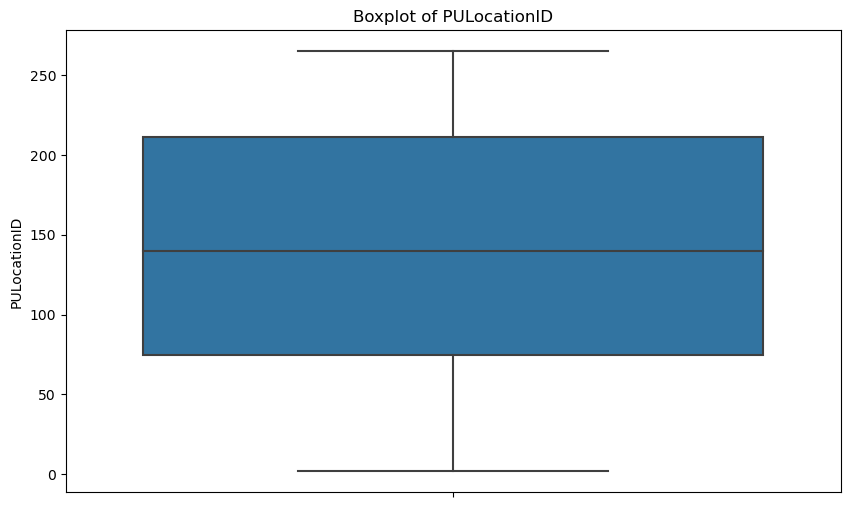

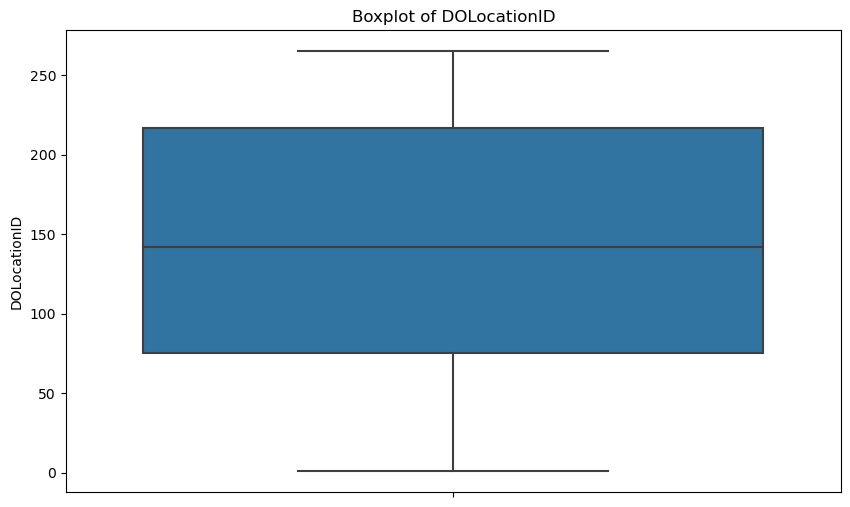

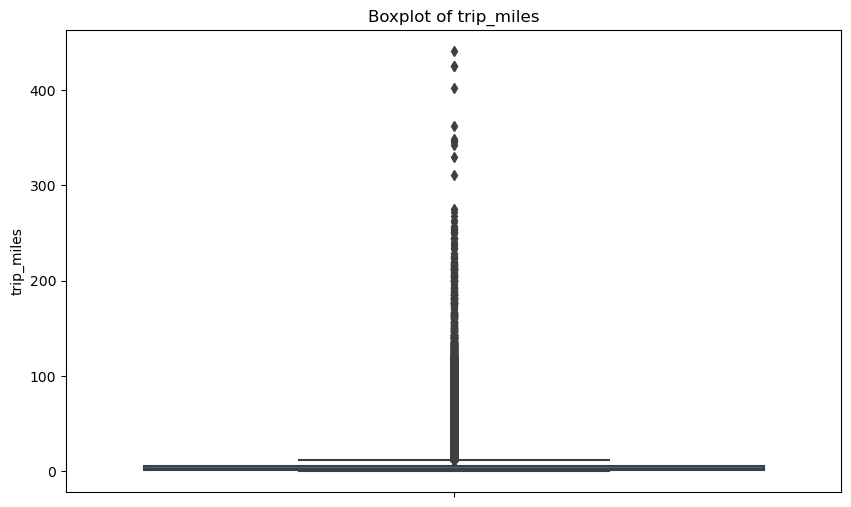

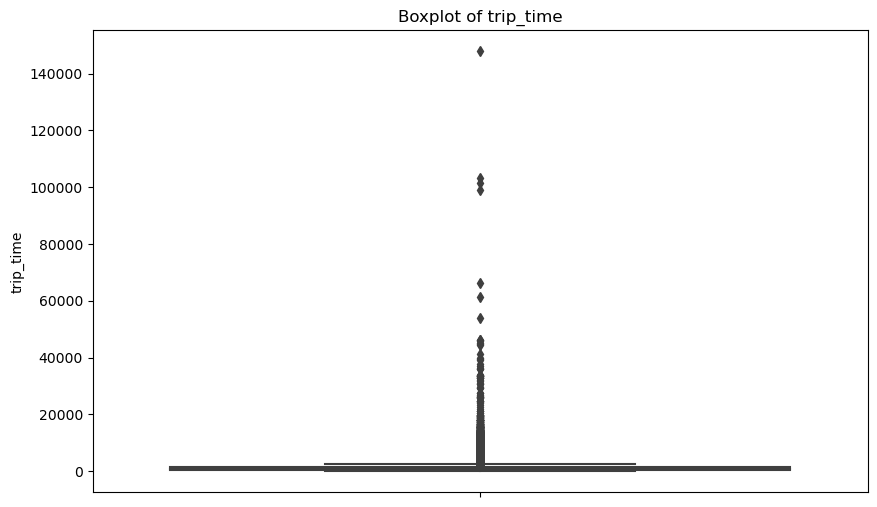

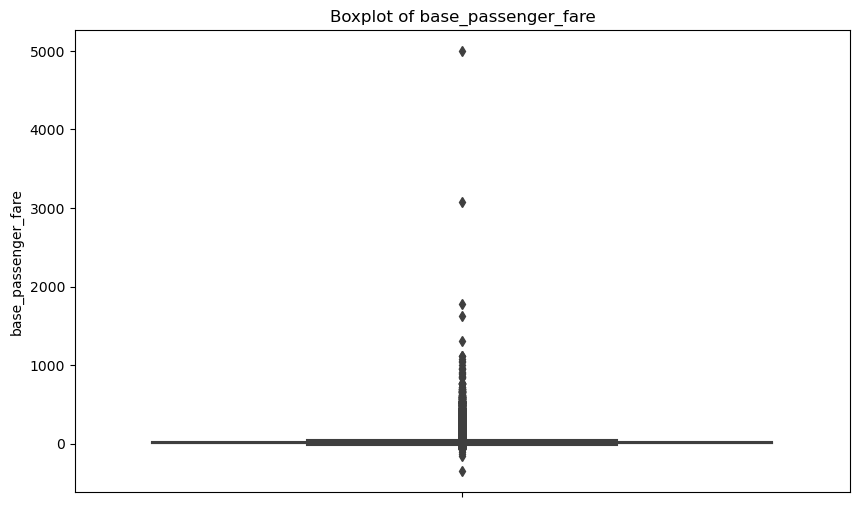

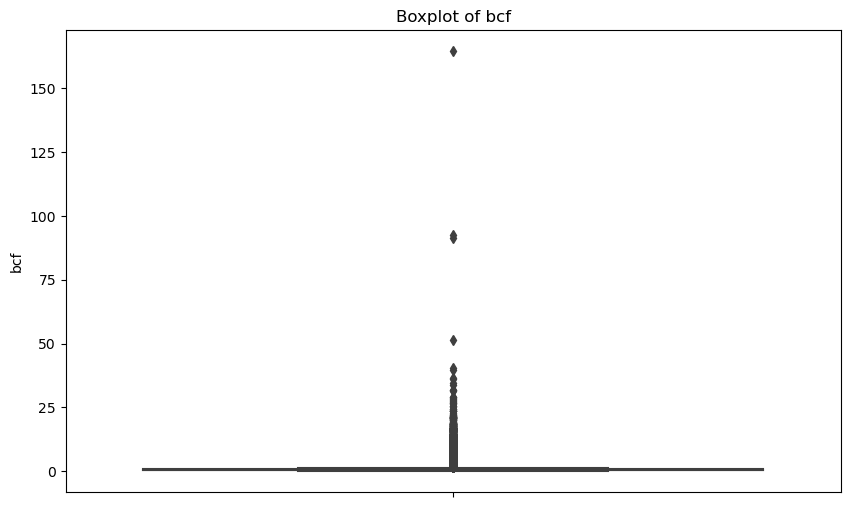

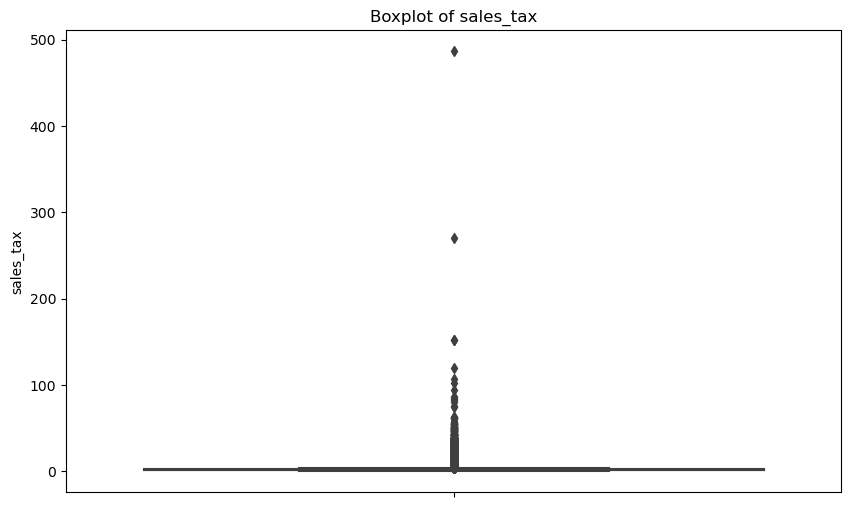

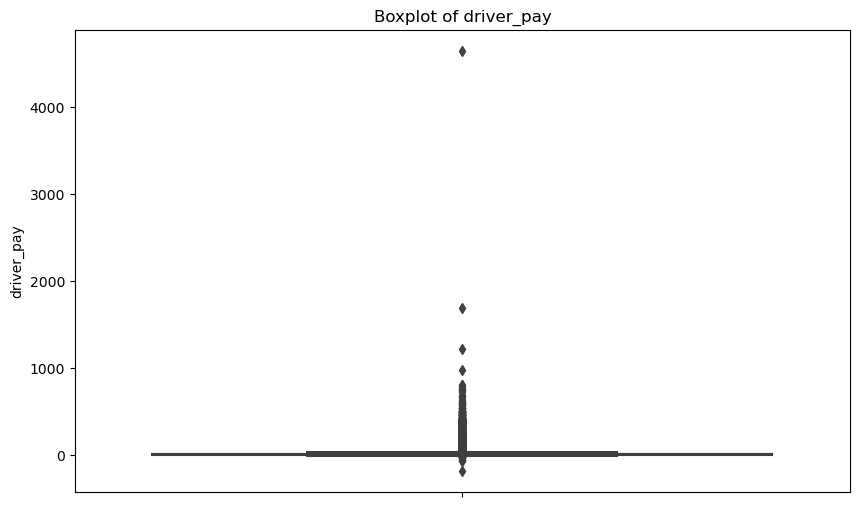

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


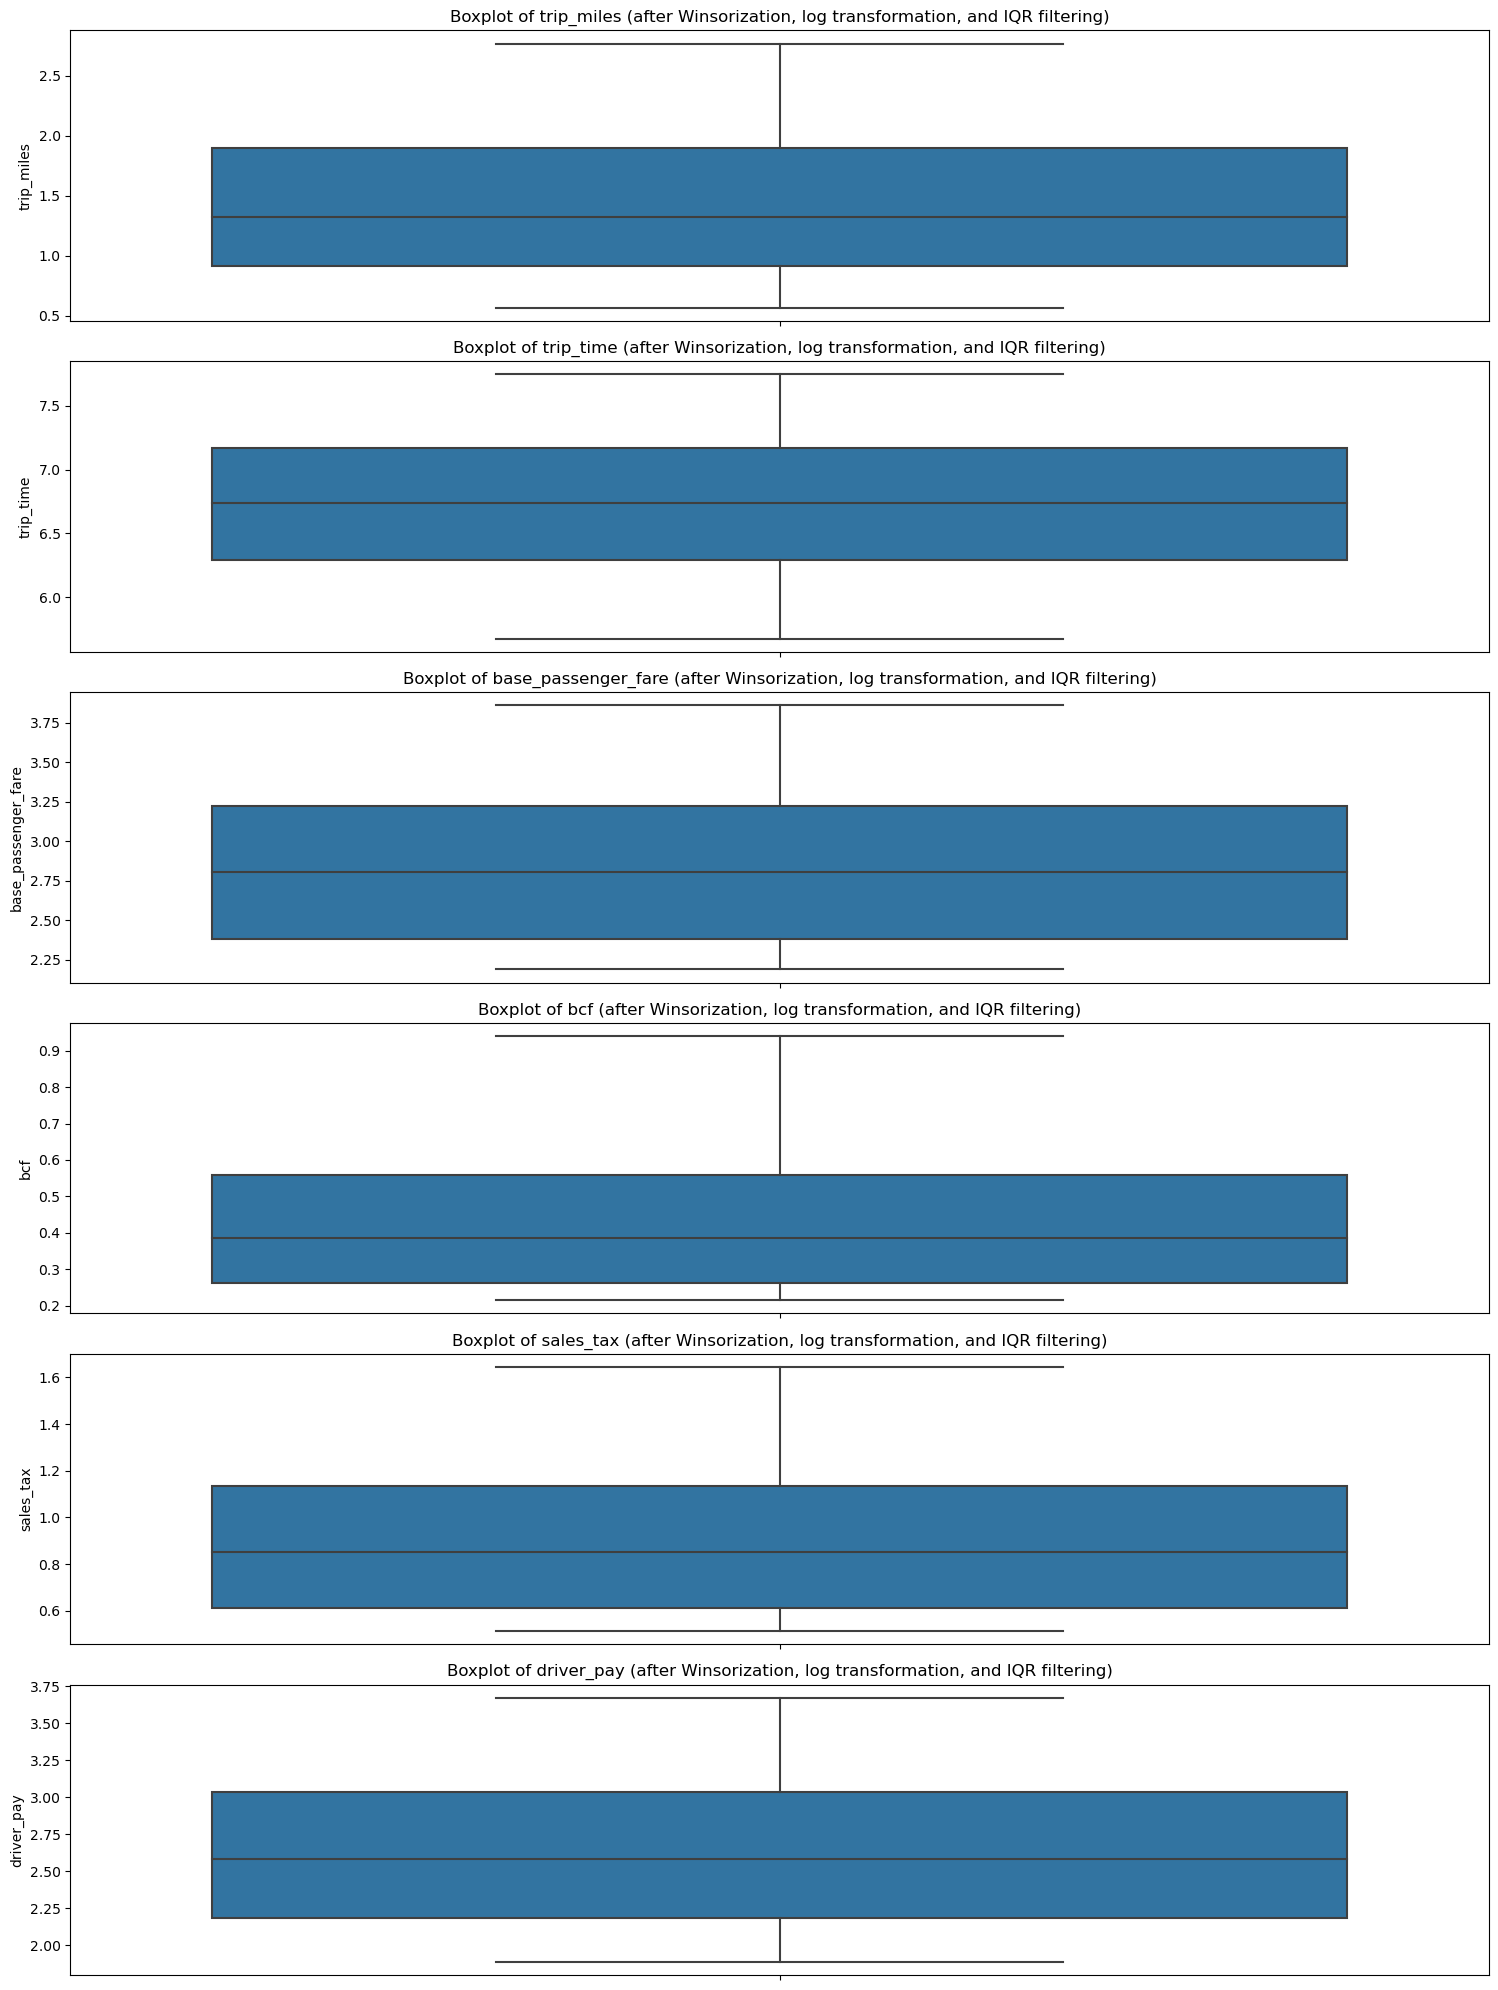

   trip_miles  estimated_emissions  emission_levels
0    0.779325           314.847250                0
1    0.598837           241.929946                0
2    0.779325           314.847250                0
3    0.974560           393.722095                0
4    0.974560           393.722095                0


/tmp/ipykernel_1216/581712680.py:136: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = jan_new.corr()


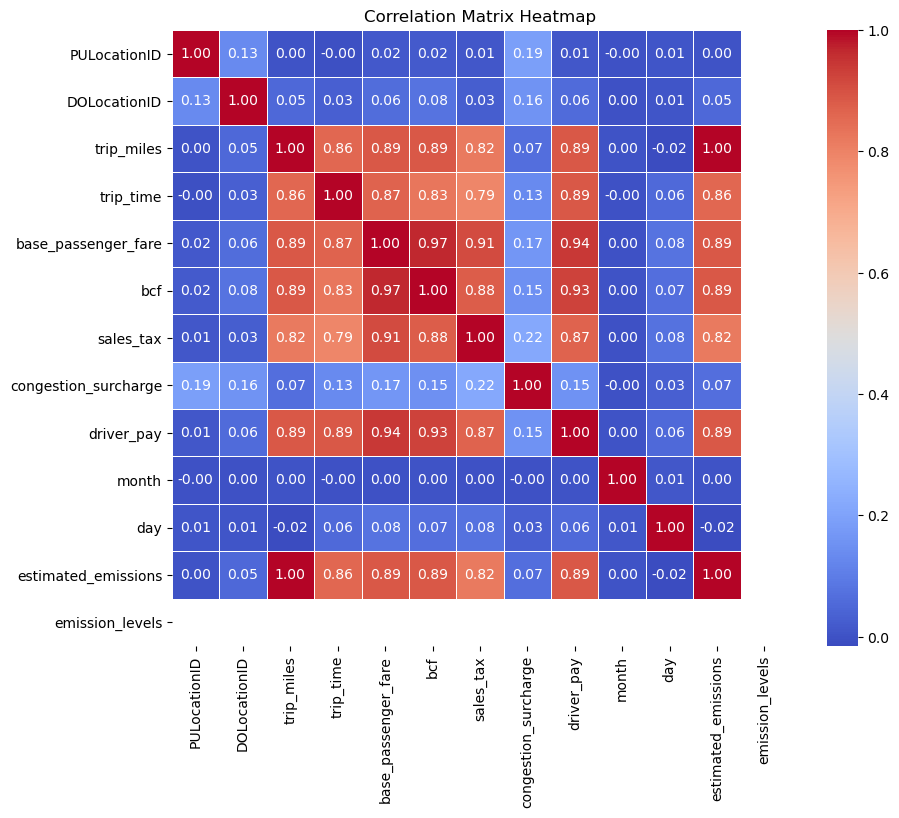

Shape of jan_df: (10823396, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:05:31   
1               B03404               B03404         00:19:27   
2               B03404               B03404         00:43:53   
3               B03404               B03404         00:15:36   
4               B03404               B03404         00:25:45   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:05:40        00:07:24         00:18:28           170   
1          00:22:08        00:22:32         00:30:12           237   
2          00:57:37        00:57:37         01:07:32           237   
3          00:17:08        00:18:02         00:23:05           262   
4          00:26:01        00:28:01         00:35:42           229   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           161    0.779325   6.499787             3.254243  0.559616   
1           161 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

jan = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-01.parquet")
jan.head()
null_counts = jan.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = jan['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

jan_filtered = jan[~jan['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
jan_filtered = jan_filtered.drop(columns=['airport_fee'])
null_counts = jan_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
jan_filtered.shape
jan_filtered.info()
jan_filtered = jan_filtered.drop(columns=['hvfhs_license_num'])
jan_filtered['date'] = jan_filtered['request_datetime'].dt.date
jan_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
jan_filtered['date'] = pd.to_datetime(jan_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
jan_filtered['request_datetime'] = pd.to_datetime(jan_filtered['request_datetime']).dt.time
jan_filtered['on_scene_datetime'] = pd.to_datetime(jan_filtered['on_scene_datetime']).dt.time
jan_filtered['pickup_datetime'] = pd.to_datetime(jan_filtered['pickup_datetime']).dt.time
jan_filtered['dropoff_datetime'] = pd.to_datetime(jan_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
jan_filtered['month'] = pd.to_datetime(jan_filtered['date']).dt.month
jan_filtered['day'] = pd.to_datetime(jan_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(jan_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(jan_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = jan_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", jan_filtered['month'].unique())

jan_filtered = jan_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips', 'tolls'])
duplicate_count = jan_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
jan_filtered = jan_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = jan_filtered[jan_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

jan_filtered = jan_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(jan_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = jan_filtered[jan_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

jan_filtered = jan_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(jan_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=jan_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
jan_new = jan_filtered.copy()

for column in columns_to_process:
    jan_new[column] = winsorize(jan_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    jan_new[column] = np.log1p(jan_new[column])

for column in columns_to_process:
    Q1 = jan_new[column].quantile(0.25)
    Q3 = jan_new[column].quantile(0.75)
    IQR = Q3 - Q1
    jan_new = jan_new[(jan_new[column] >= (Q1 - 1.5 * IQR)) & (jan_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=jan_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
jan_new['estimated_emissions'] = jan_new['trip_miles'] * emission_factor
emission_threshold = 3000
jan_new['emission_levels'] = jan_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(jan_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = jan_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = jan_new['dispatching_base_num'].value_counts()
top_10_bases = jan_new['dispatching_base_num'].value_counts().head(10).index
jan_new = jan_new[jan_new['dispatching_base_num'].isin(top_10_bases)]
jan_new.shape
jan_new.head()

# Save jan_new to a new DataFrame called jan_df
jan_df = jan_new.copy()

# Display the shape and first few rows of jan_df to verify
print("Shape of jan_df:", jan_df.shape)
print(jan_df.head())


# FEB EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 143, 7, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4573889
request_datetime              0
on_scene_datetime       4573836
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num        0
dispatching_base_num     0
originating_base_num    54
request_datetime        

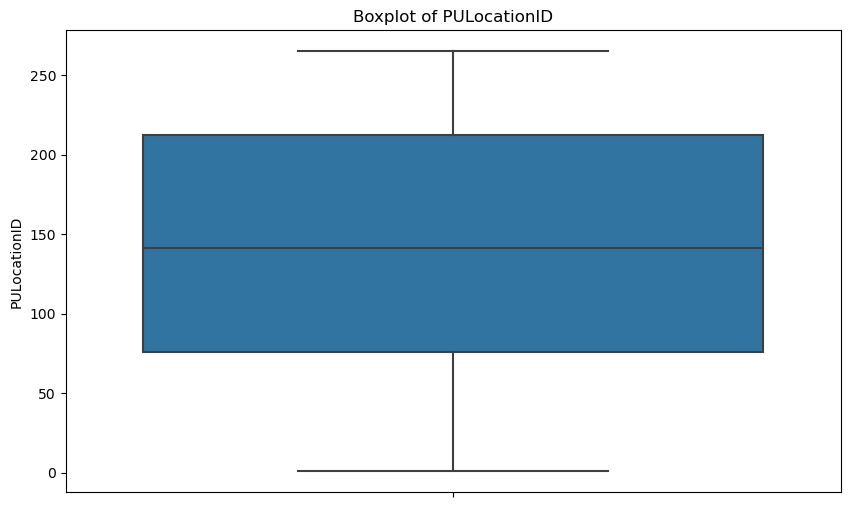

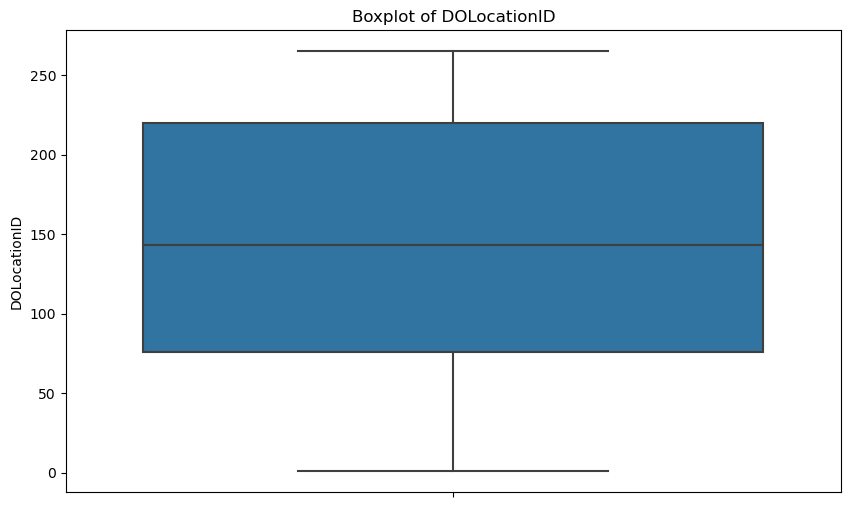

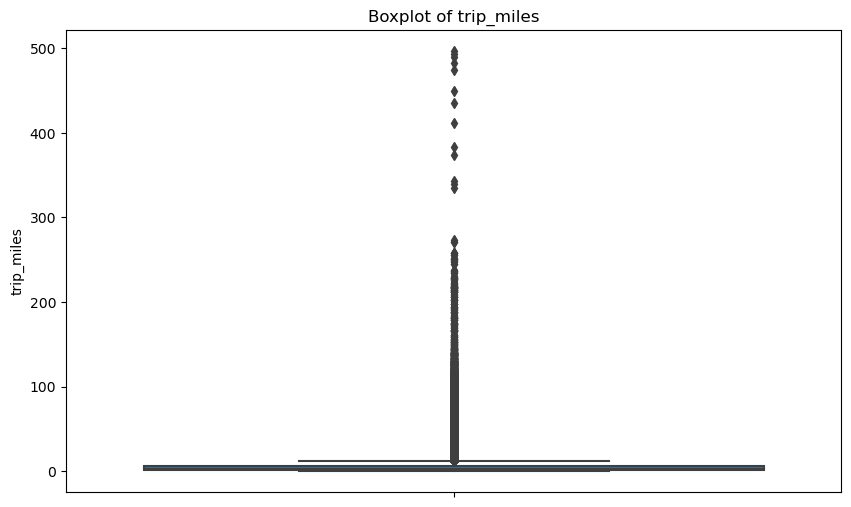

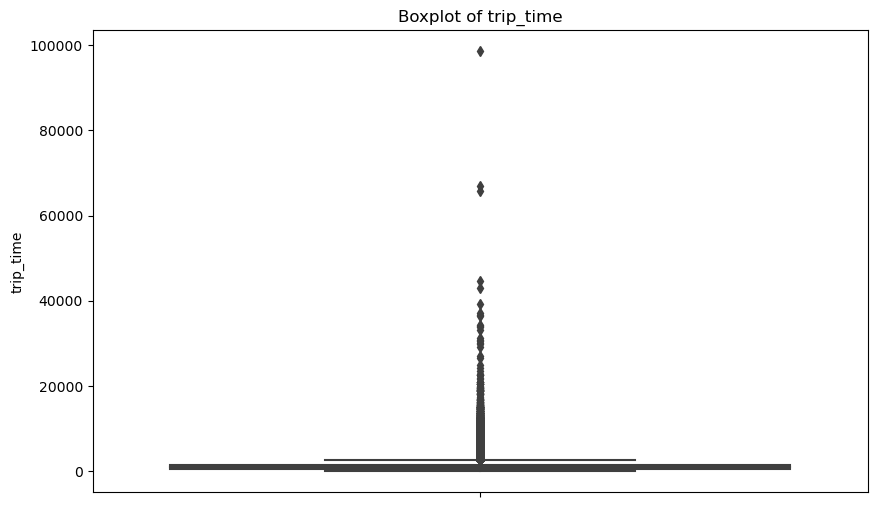

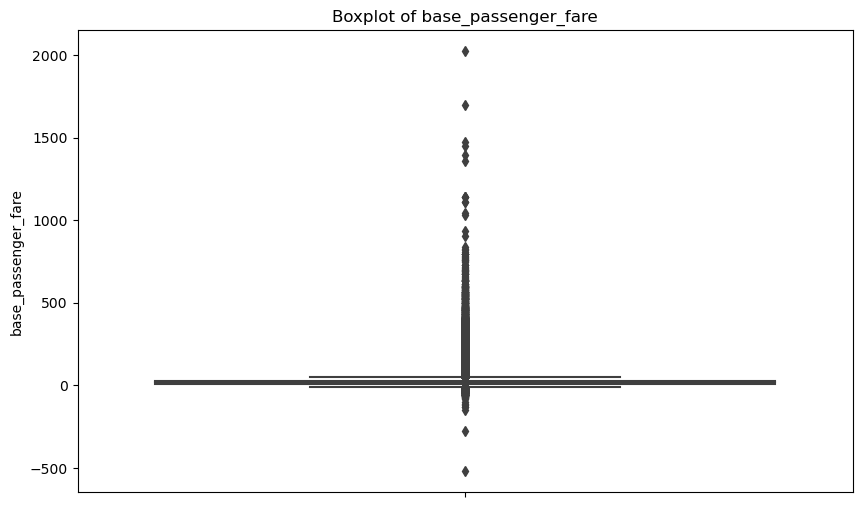

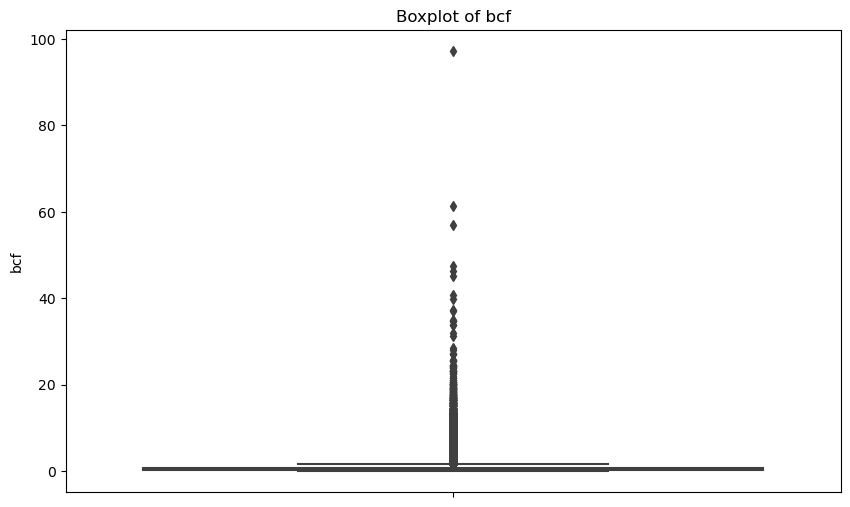

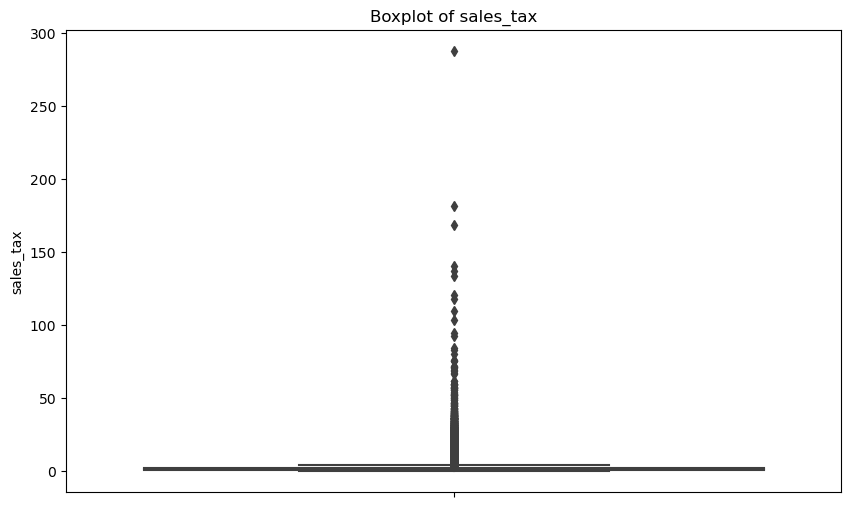

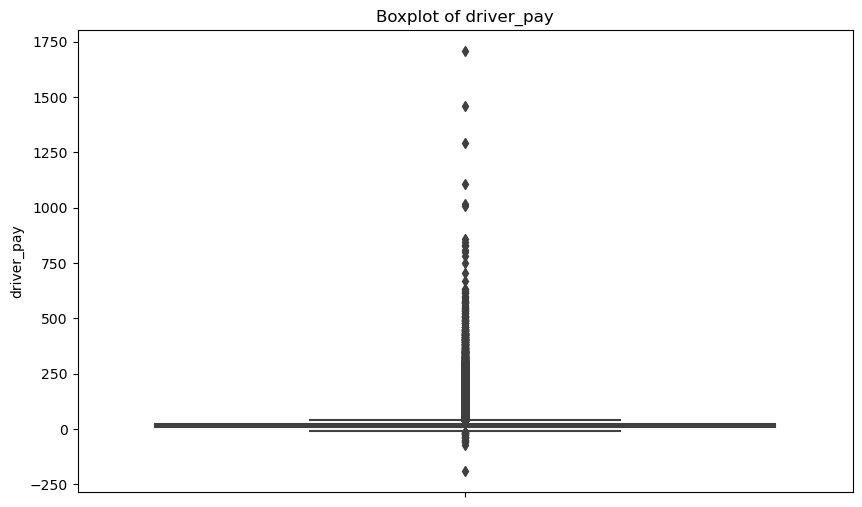

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


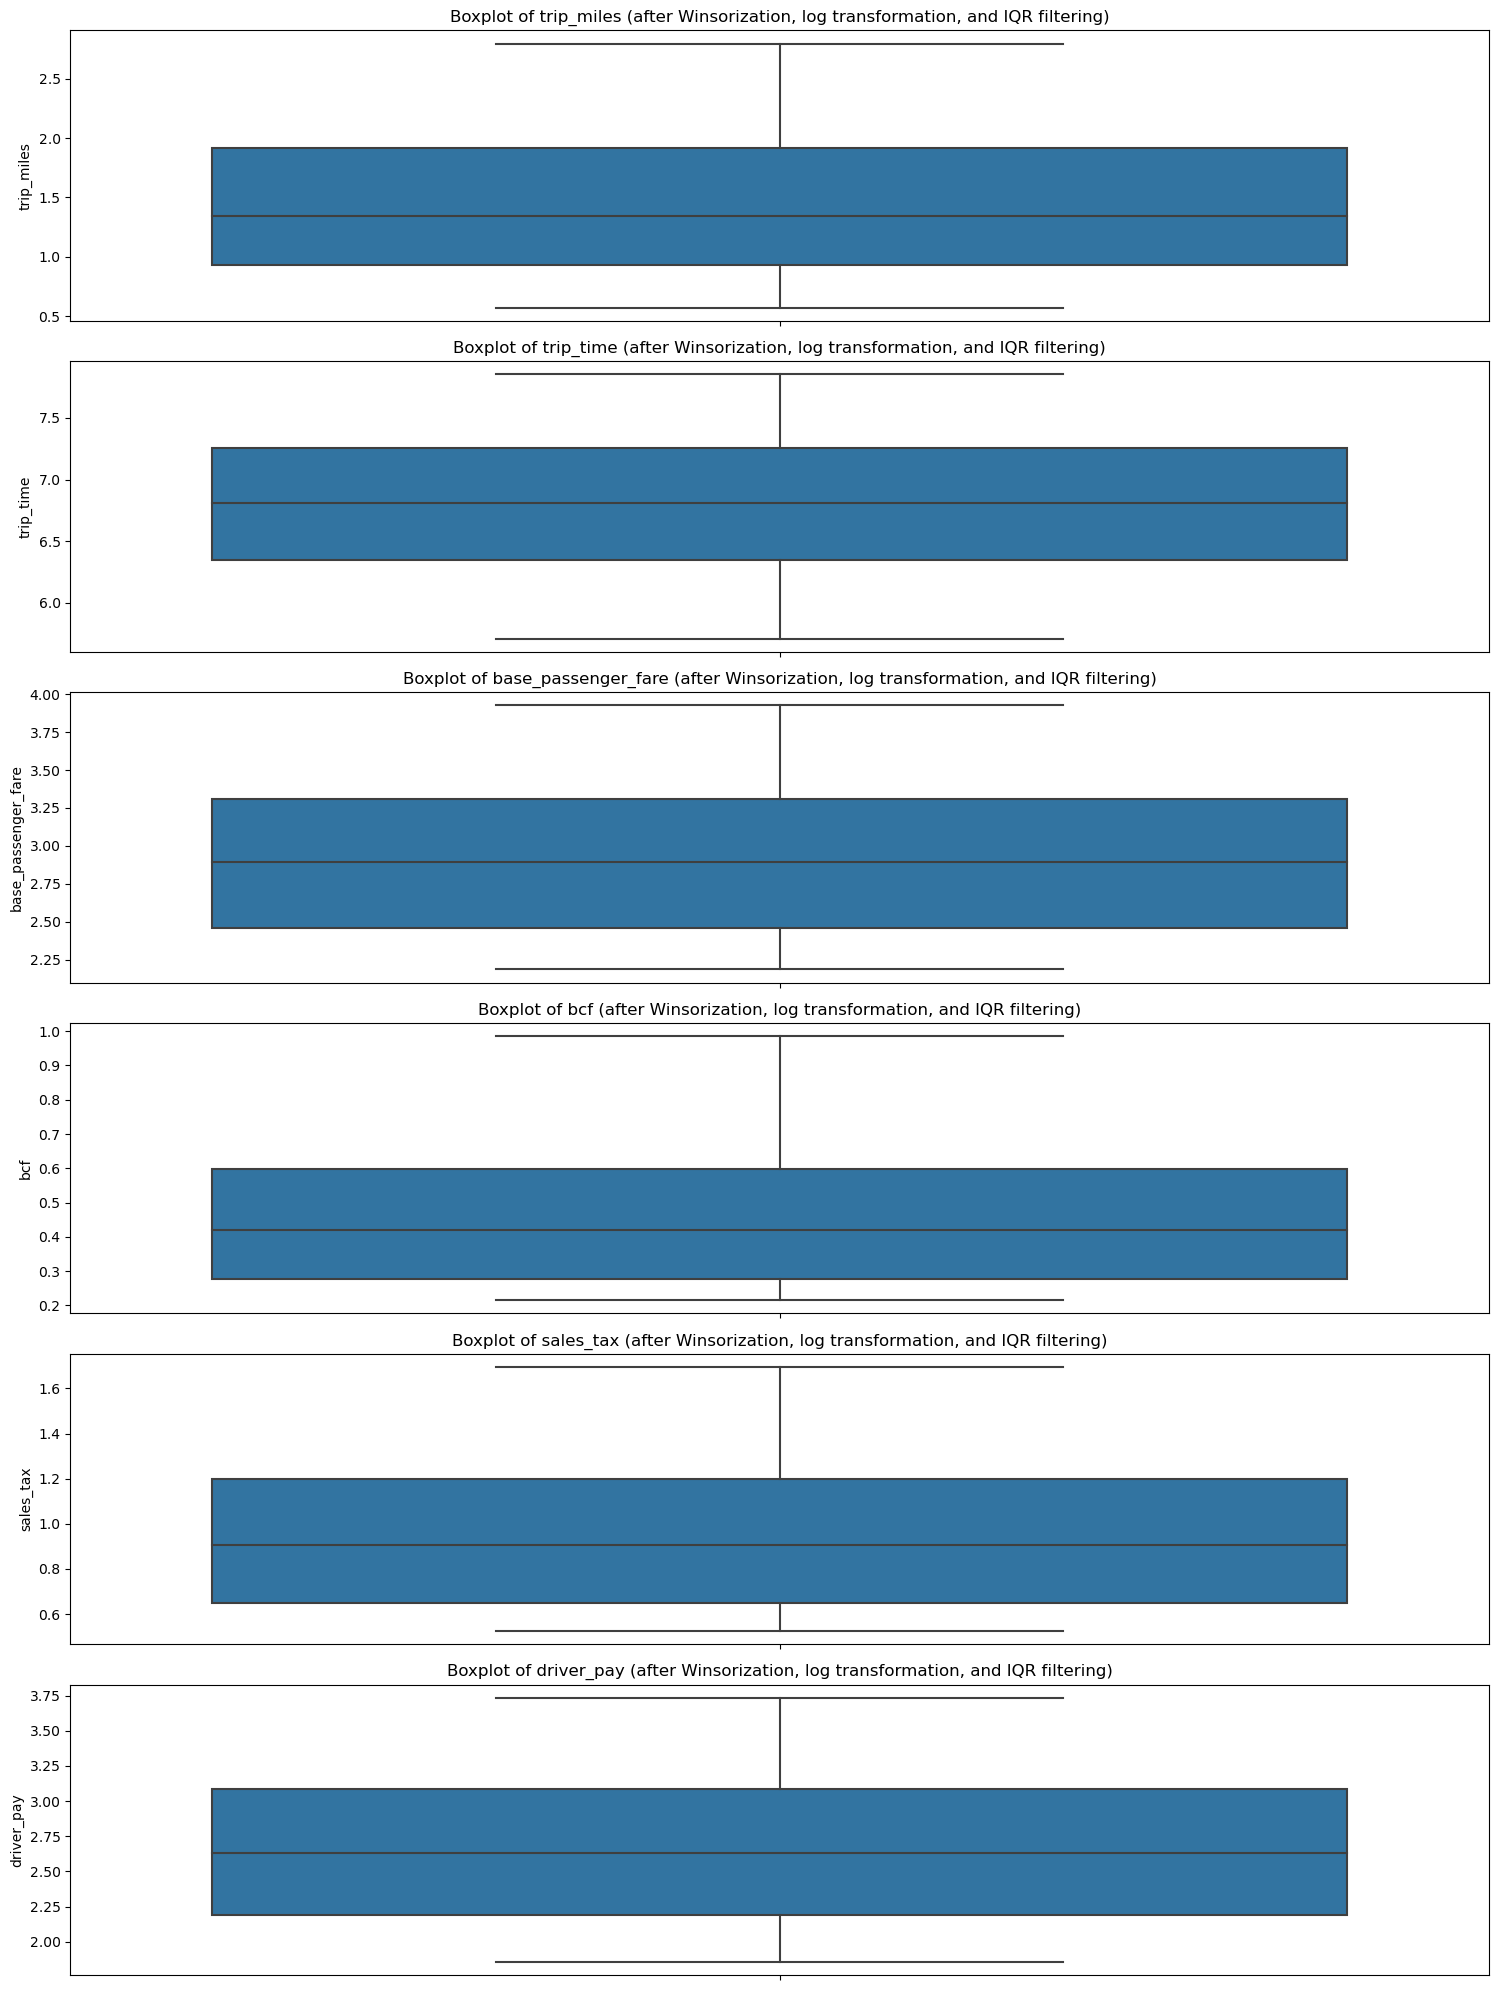

   trip_miles  estimated_emissions  emission_levels
0    1.061257           428.747627                0
1    0.924259           373.400596                0
2    0.916291           370.181456                0
3    2.539237          1025.851746                0
4    1.289233           520.849990                0


/tmp/ipykernel_1216/2470869048.py:128: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = feb_new.corr()


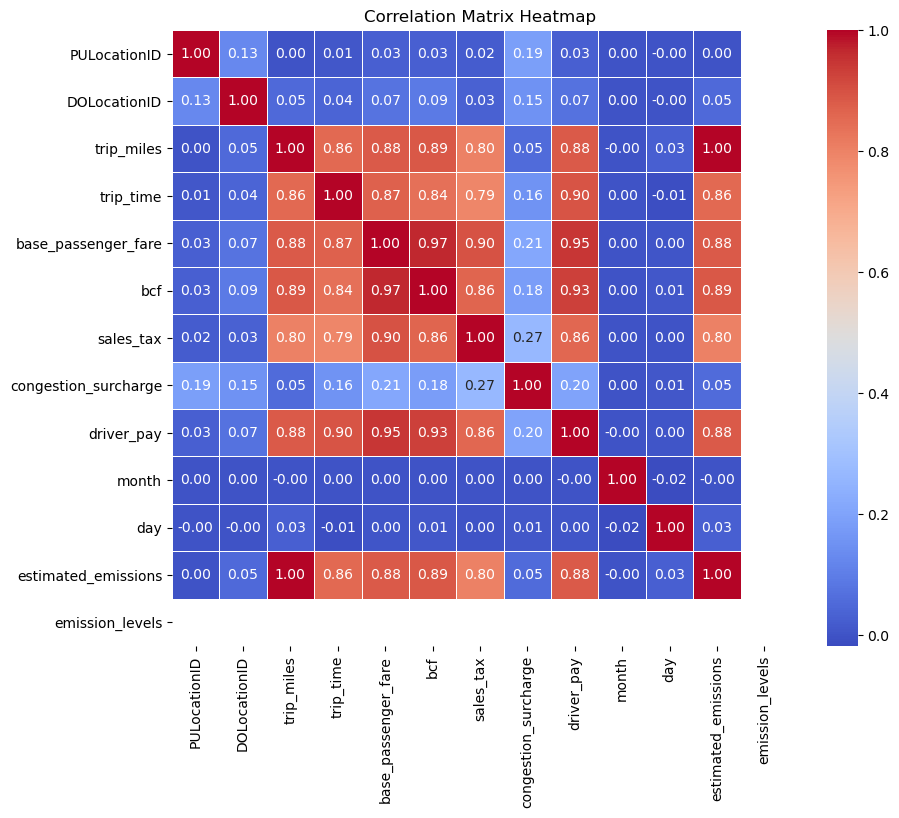

Shape of feb_df: (11437669, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         23:58:19   
1               B03404               B03404         00:16:14   
2               B03404               B03404         00:36:20   
3               B03404               B03404         00:50:49   
4               B03404               B03404         23:57:03   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:02:37        00:02:50         00:13:01            17   
1          00:19:21        00:20:18         00:28:31            37   
2          00:38:45        00:39:18         00:46:54            37   
3          00:55:01        00:57:01         01:28:27           225   
4          00:01:46        00:02:38         00:14:18            25   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           225    1.061257   6.416732             2.384165  0.262364   
1            37 

In [2]:
feb = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-02.parquet")
feb.head()
null_counts = feb.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = feb['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

feb_filtered = feb[~feb['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
feb_filtered = feb_filtered.drop(columns=['airport_fee'])
null_counts = feb_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
feb_filtered.shape
feb_filtered.info()
feb_filtered = feb_filtered.drop(columns=['hvfhs_license_num'])
feb_filtered['date'] = feb_filtered['request_datetime'].dt.date
feb_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
feb_filtered['date'] = pd.to_datetime(feb_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
feb_filtered['request_datetime'] = pd.to_datetime(feb_filtered['request_datetime']).dt.time
feb_filtered['on_scene_datetime'] = pd.to_datetime(feb_filtered['on_scene_datetime']).dt.time
feb_filtered['pickup_datetime'] = pd.to_datetime(feb_filtered['pickup_datetime']).dt.time
feb_filtered['dropoff_datetime'] = pd.to_datetime(feb_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
feb_filtered['month'] = pd.to_datetime(feb_filtered['date']).dt.month
feb_filtered['day'] = pd.to_datetime(feb_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(feb_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(feb_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = feb_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", feb_filtered['month'].unique())

feb_filtered = feb_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips', 'tolls'])
duplicate_count = feb_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
feb_filtered = feb_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = feb_filtered[feb_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

feb_filtered = feb_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(feb_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = feb_filtered[feb_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

feb_filtered = feb_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(feb_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=feb_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
feb_new = feb_filtered.copy()

for column in columns_to_process:
    feb_new[column] = winsorize(feb_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    feb_new[column] = np.log1p(feb_new[column])

for column in columns_to_process:
    Q1 = feb_new[column].quantile(0.25)
    Q3 = feb_new[column].quantile(0.75)
    IQR = Q3 - Q1
    feb_new = feb_new[(feb_new[column] >= (Q1 - 1.5 * IQR)) & (feb_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=feb_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
feb_new['estimated_emissions'] = feb_new['trip_miles'] * emission_factor
emission_threshold = 3000
feb_new['emission_levels'] = feb_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(feb_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = feb_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = feb_new['dispatching_base_num'].value_counts()
top_10_bases = feb_new['dispatching_base_num'].value_counts().head(10).index
feb_new = feb_new[feb_new['dispatching_base_num'].isin(top_10_bases)]
feb_new.shape
feb_new.head()

# Save feb_new to a new DataFrame called feb_df
feb_df = feb_new.copy()

# Display the shape and first few rows of feb_df to verify
print("Shape of feb_df:", feb_df.shape)
print(feb_df.head())


In [3]:
merge_1 = pd.concat([jan_df, feb_df], ignore_index=True)
merge_1.head()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 143, 8, Finished, Available, Finished)

dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:05:31   
1               B03404               B03404         00:19:27   
2               B03404               B03404         00:43:53   
3               B03404               B03404         00:15:36   
4               B03404               B03404         00:25:45   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:05:40        00:07:24         00:18:28           170   
1          00:22:08        00:22:32         00:30:12           237   
2          00:57:37        00:57:37         01:07:32           237   
3          00:17:08        00:18:02         00:23:05           262   
4          00:26:01        00:28:01         00:35:42           229   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           161    0.779325   6.499787             3.254243  0.559616   
1           161    0.598837   6.133398             2.562639  0.307485   
2           161    0.779325   6.390241             3.428164  0.636577   
3           229    0.974560   5.717028             2.187174  0.215111   
4           141    0.974560   6.135565             2.345645  0.246860   

   sales_tax  congestion_surcharge  driver_pay        date  month  day  \
0   1.166271                  2.75    3.179303  01-01-2022      1    1   
1   0.722706                  2.75    2.589267  01-01-2022      1    1   
2   1.294727                  2.75    3.190476  01-01-2022      1    1   
3   0.530628                  2.75    1.987874  01-01-2022      1    1   
4   0.609766                  2.75    2.132982  01-01-2022      1    1   

   estimated_emissions  emission_levels  
0           314.847250                0  
1           241.929946                0  
2           314.847250                0  
3           393.722095                0  
4           393.722095                0

In [4]:
merge_1.to_parquet('merge_1_2022.parquet', index=False)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 143, 9, Finished, Available, Finished)

# MARCH EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 147, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5311859
request_datetime              0
on_scene_datetime       5311794
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num        0
dispatching_base_num     0
originating_base_num    65
request_datetime        

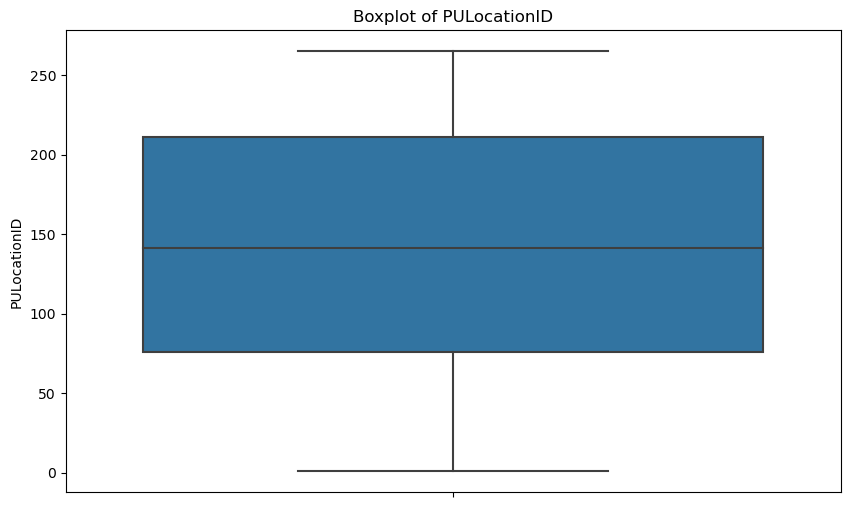

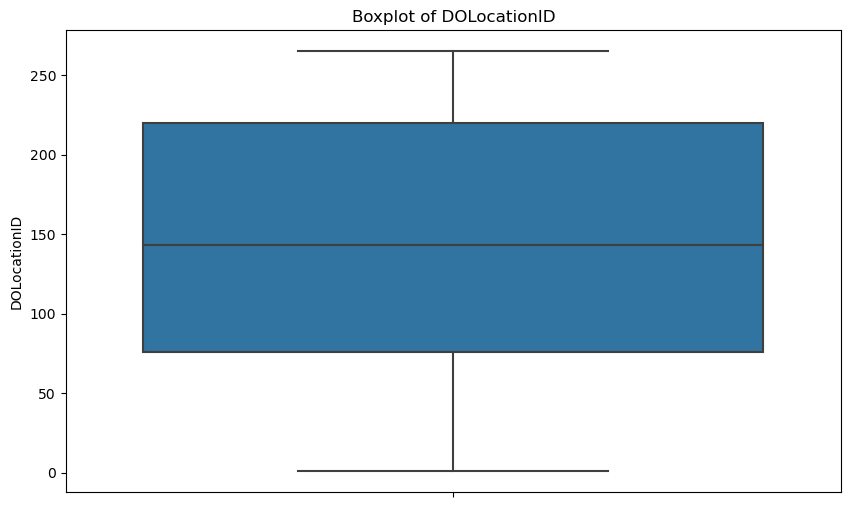

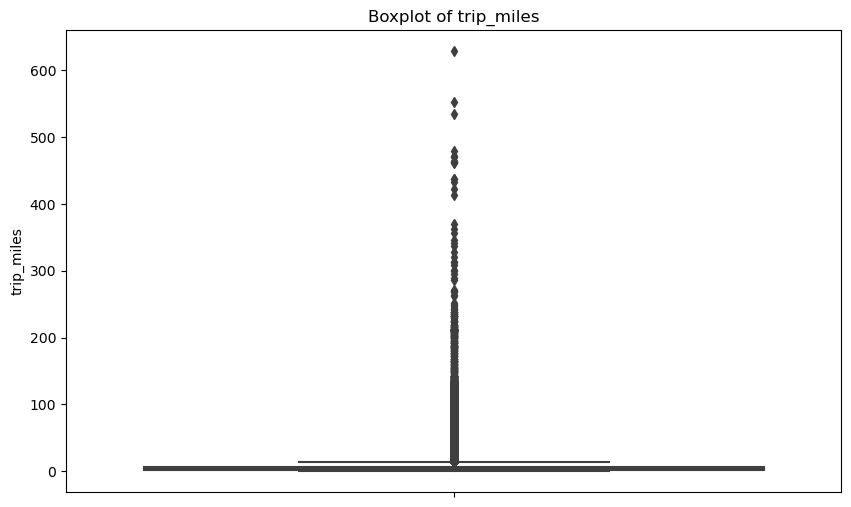

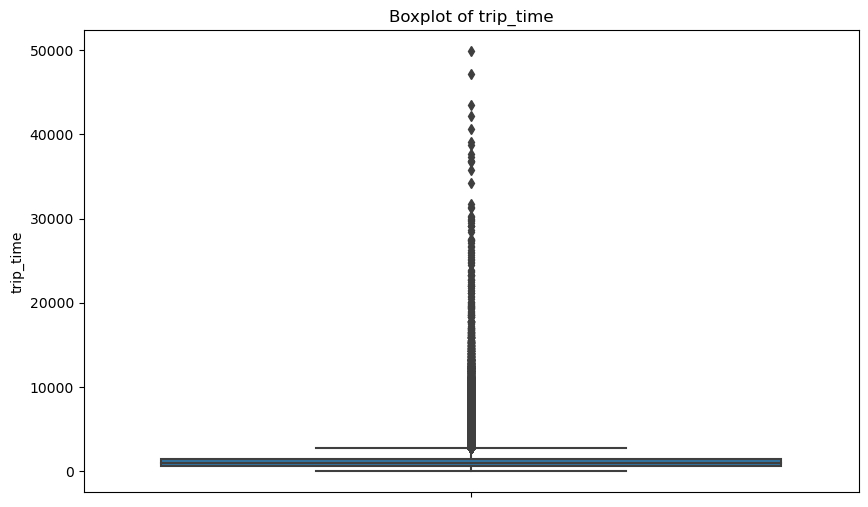

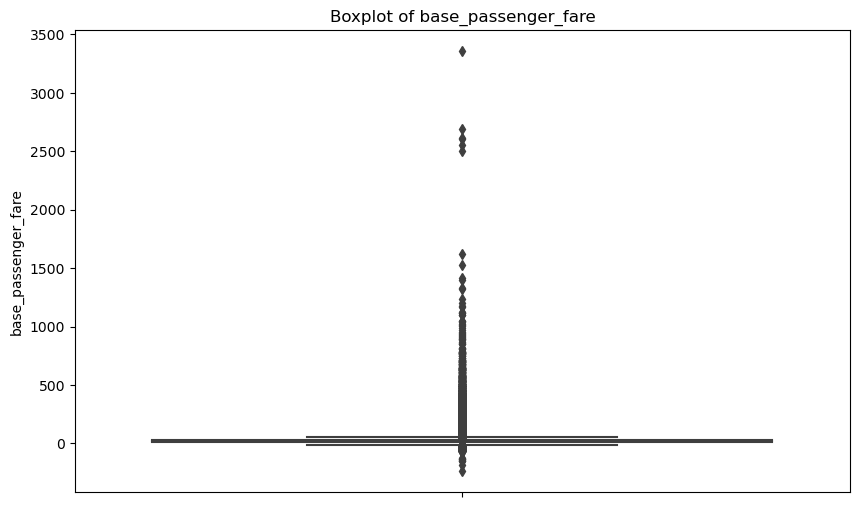

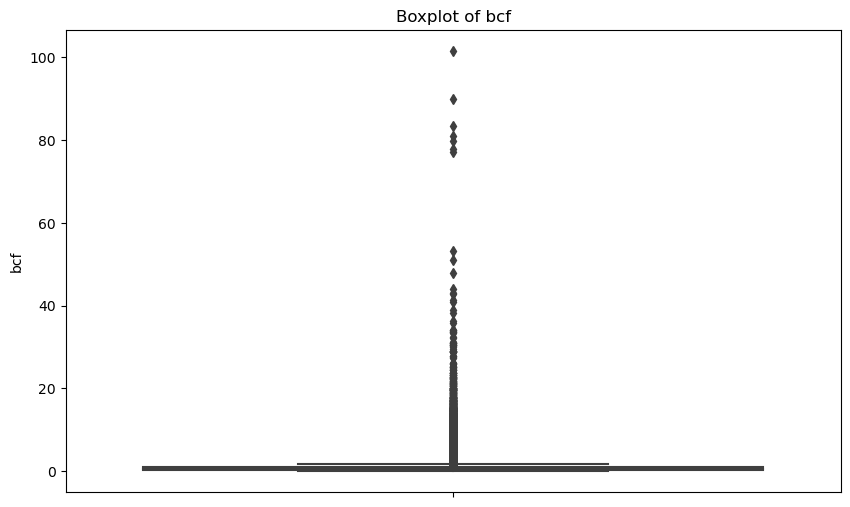

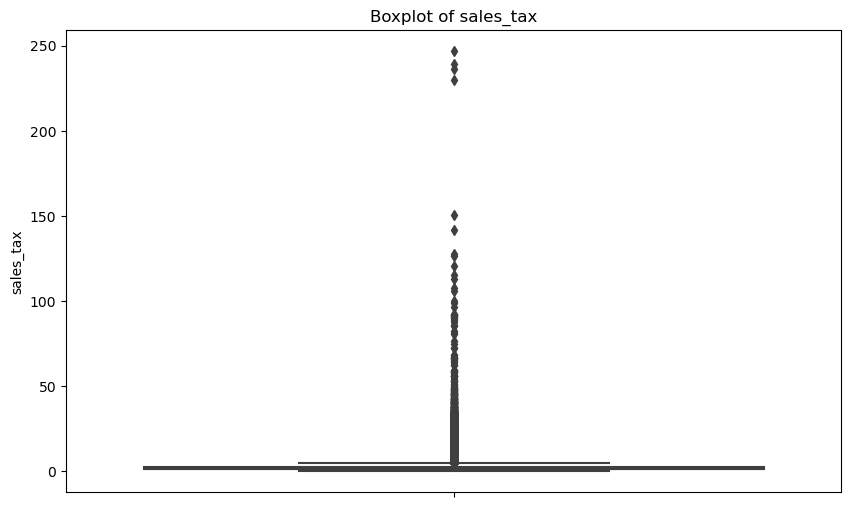

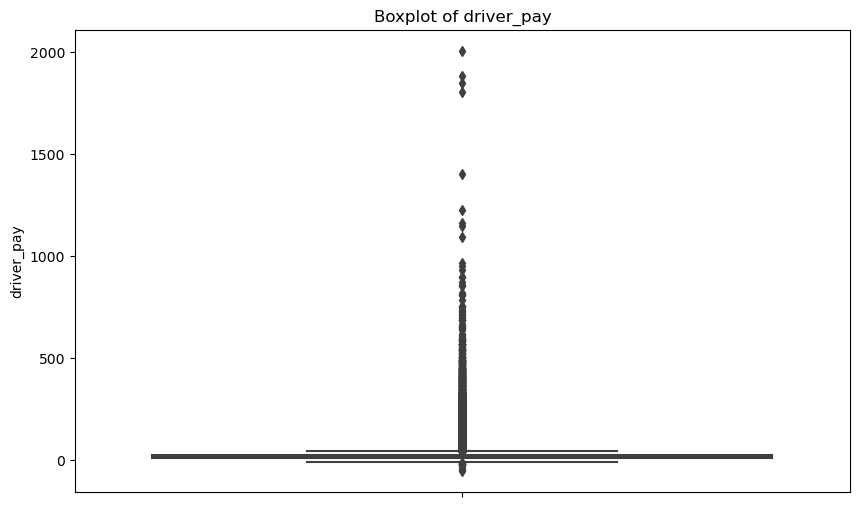

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


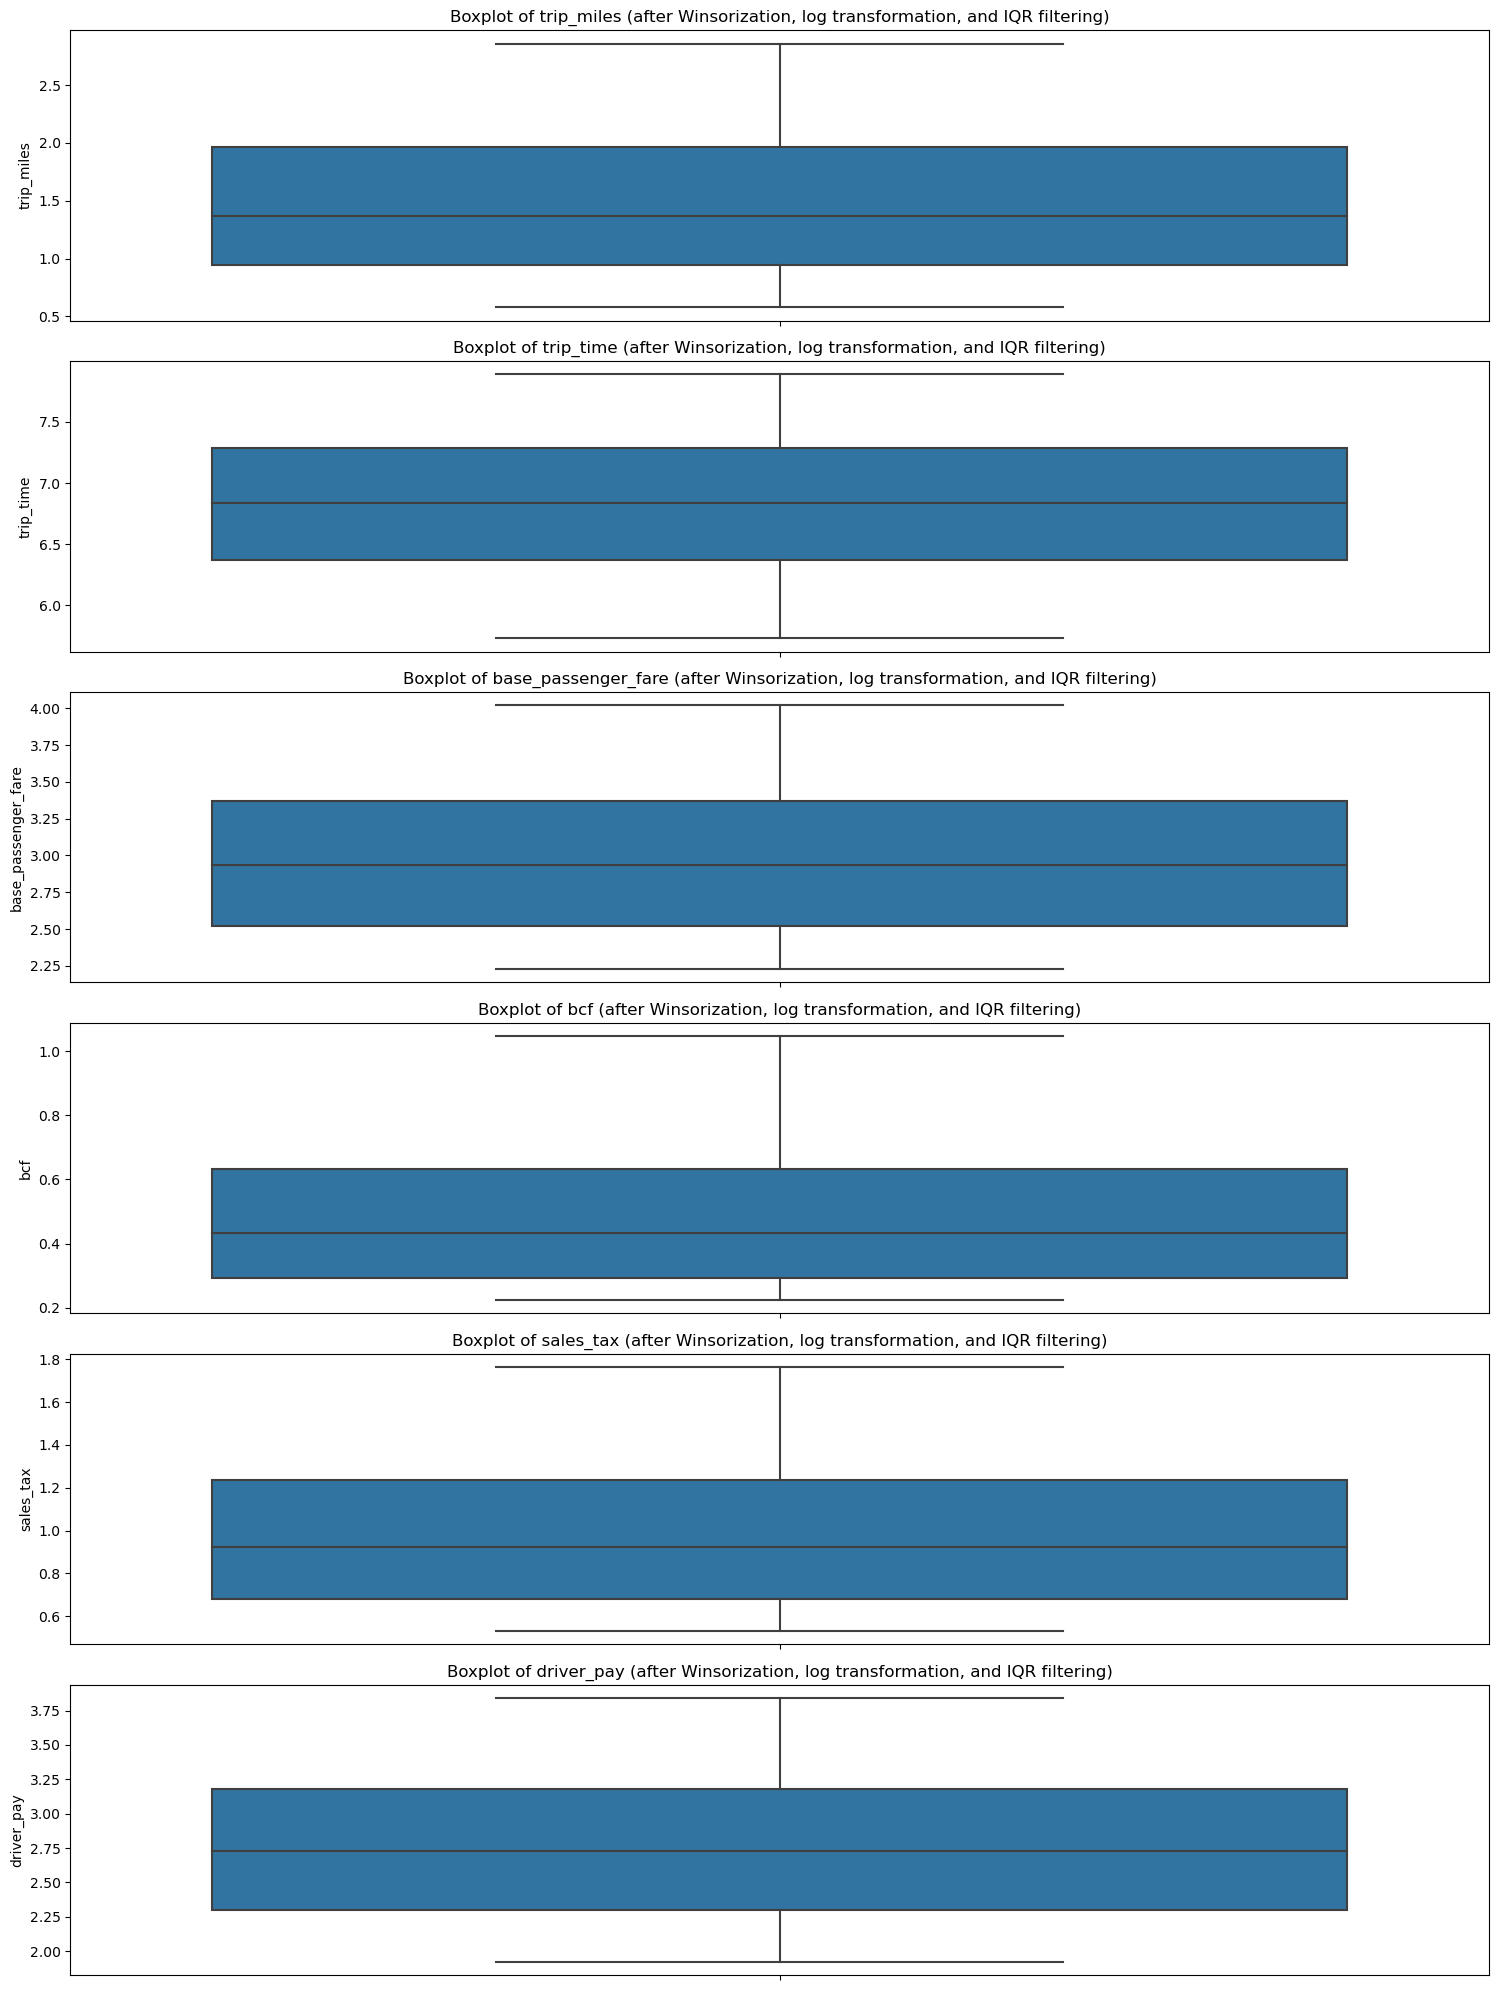

   trip_miles  estimated_emissions  emission_levels
0    1.000632           404.255280                0
1    1.451614           586.451986                0
3    2.473171           999.161243                0
4    0.920283           371.794232                0
7    2.859913          1155.404670                0


/tmp/ipykernel_1066/2201845201.py:137: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mar_new.corr()


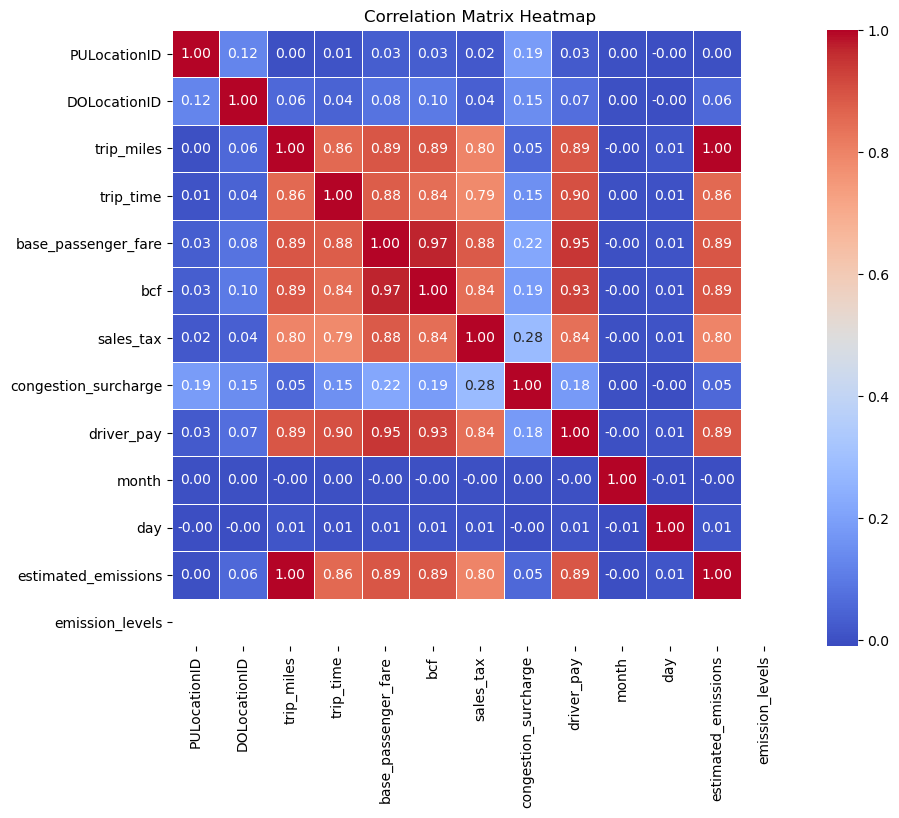

Shape of mar_df: (13133115, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:31:18   
1               B03404               B03404         00:25:25   
3               B03404               B03404         00:01:47   
4               B03404               B03404         00:31:55   
7               B03404               B03404         00:40:00   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:34:32        00:35:04         00:43:48           177   
1          00:27:29        00:28:42         00:41:40           114   
3          00:03:18        00:04:35         00:22:57            74   
4          00:32:42        00:33:16         00:40:13            95   
7          00:33:26        00:34:33         01:18:28           170   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            61    1.000632   6.263398             2.226783  0.223144   
1            65 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

mar = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-03.parquet")
mar.head()
null_counts = mar.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = mar['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

mar_filtered = mar[~mar['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
mar_filtered = mar_filtered.drop(columns=['airport_fee'])
null_counts = mar_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
mar_filtered.shape
mar_filtered.info()
mar_filtered = mar_filtered.drop(columns=['hvfhs_license_num'])
mar_filtered['date'] = mar_filtered['request_datetime'].dt.date
mar_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
mar_filtered['date'] = pd.to_datetime(mar_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
mar_filtered['request_datetime'] = pd.to_datetime(mar_filtered['request_datetime']).dt.time
mar_filtered['on_scene_datetime'] = pd.to_datetime(mar_filtered['on_scene_datetime']).dt.time
mar_filtered['pickup_datetime'] = pd.to_datetime(mar_filtered['pickup_datetime']).dt.time
mar_filtered['dropoff_datetime'] = pd.to_datetime(mar_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
mar_filtered['month'] = pd.to_datetime(mar_filtered['date']).dt.month
mar_filtered['day'] = pd.to_datetime(mar_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(mar_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(mar_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = mar_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", mar_filtered['month'].unique())

mar_filtered = mar_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips', 'tolls'])
duplicate_count = mar_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
mar_filtered = mar_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = mar_filtered[mar_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

mar_filtered = mar_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(mar_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = mar_filtered[mar_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

mar_filtered = mar_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(mar_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=mar_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
mar_new = mar_filtered.copy()

for column in columns_to_process:
    mar_new[column] = winsorize(mar_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    mar_new[column] = np.log1p(mar_new[column])

for column in columns_to_process:
    Q1 = mar_new[column].quantile(0.25)
    Q3 = mar_new[column].quantile(0.75)
    IQR = Q3 - Q1
    mar_new = mar_new[(mar_new[column] >= (Q1 - 1.5 * IQR)) & (mar_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=mar_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
mar_new['estimated_emissions'] = mar_new['trip_miles'] * emission_factor
emission_threshold = 3000
mar_new['emission_levels'] = mar_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(mar_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = mar_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = mar_new['dispatching_base_num'].value_counts()
top_10_bases = mar_new['dispatching_base_num'].value_counts().head(10).index
mar_new = mar_new[mar_new['dispatching_base_num'].isin(top_10_bases)]
mar_new.shape
mar_new.head()

# Save mar_new to a new DataFrame called mar_df
mar_df = mar_new.copy()

# Display the shape and first few rows of mar_df to verify
print("Shape of mar_df:", mar_df.shape)
print(mar_df.head())


In [2]:
mar_df.to_parquet("mar2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 147, 7, Finished, Available, Finished)

# APRIL EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 147, 8, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4736538
request_datetime              0
on_scene_datetime       4736337
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num         0
dispatching_base_num      0
originating_base_num    201
request_datetime     

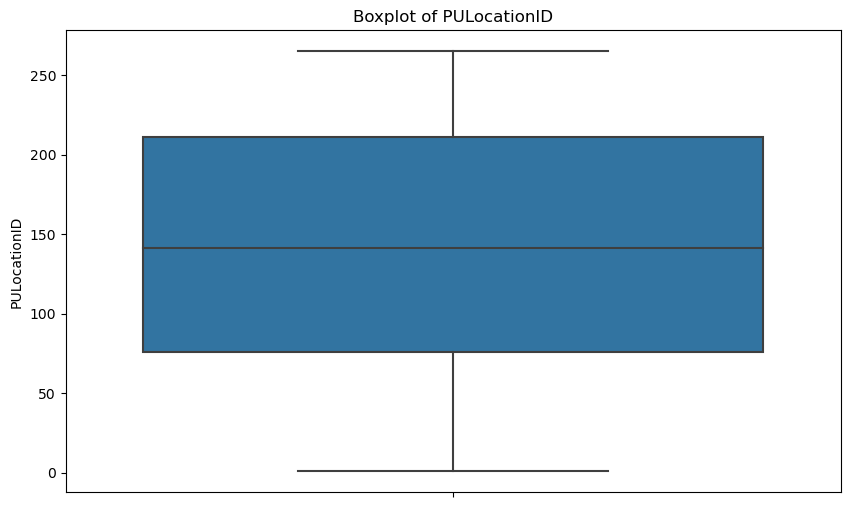

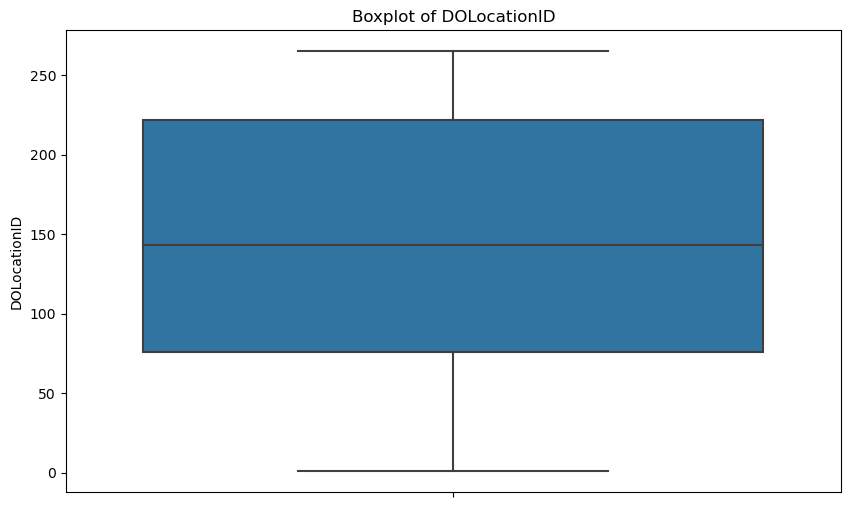

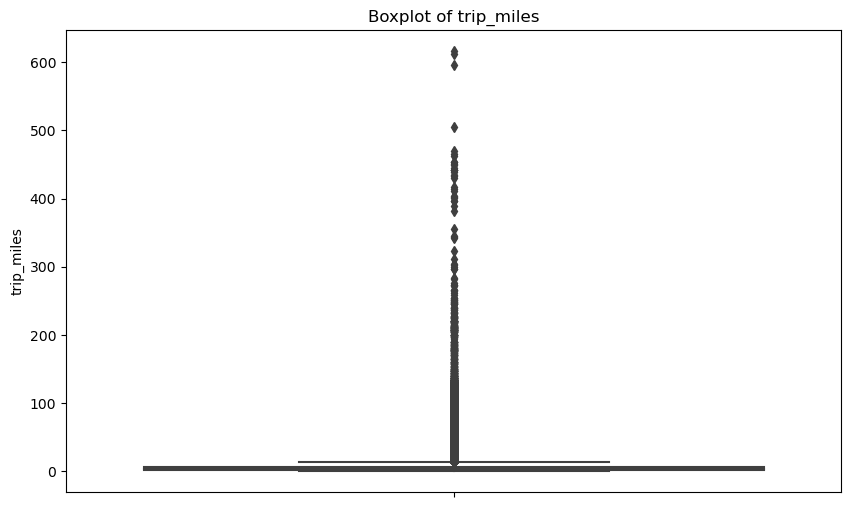

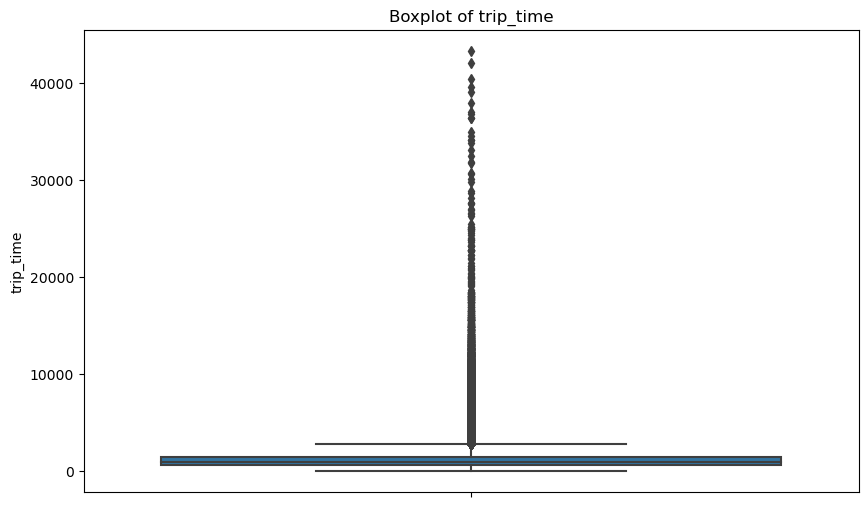

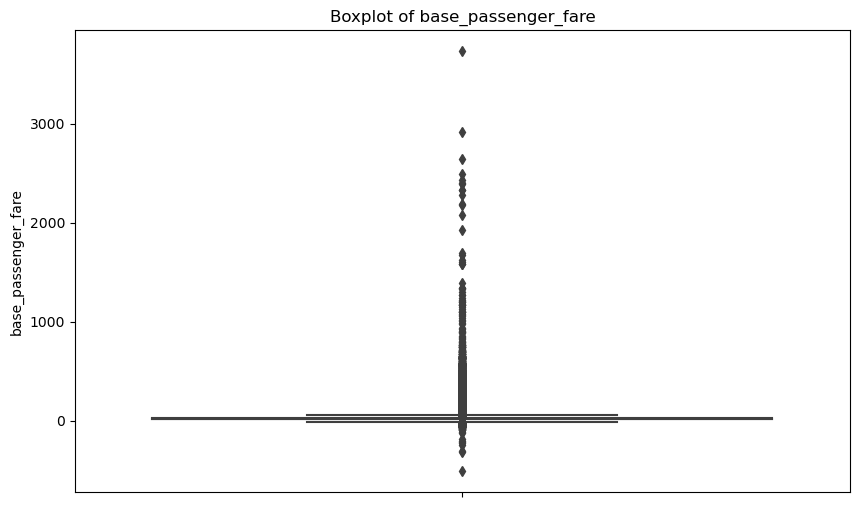

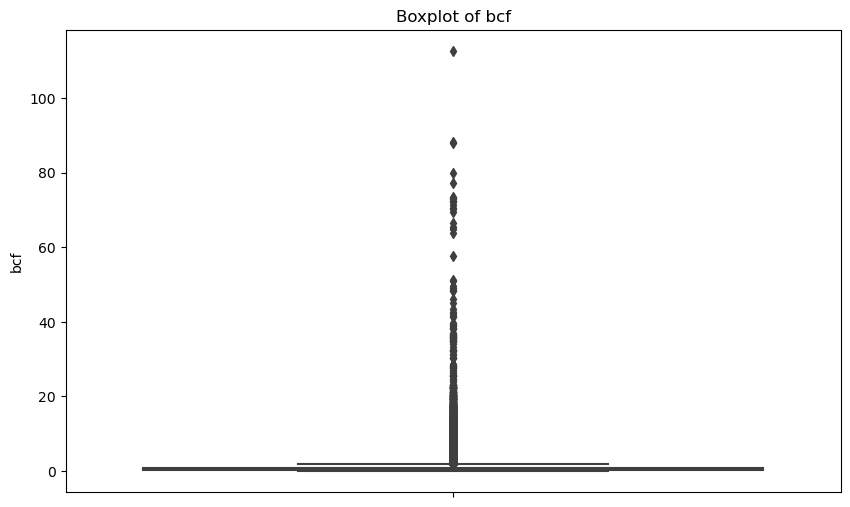

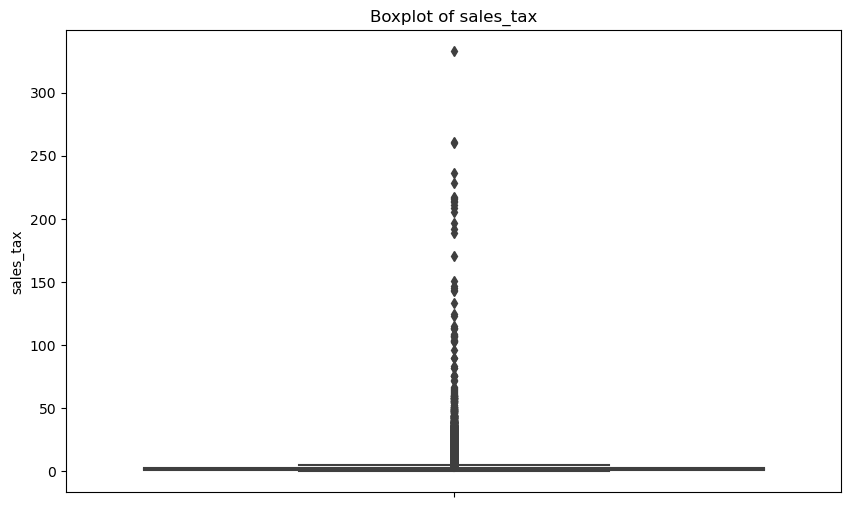

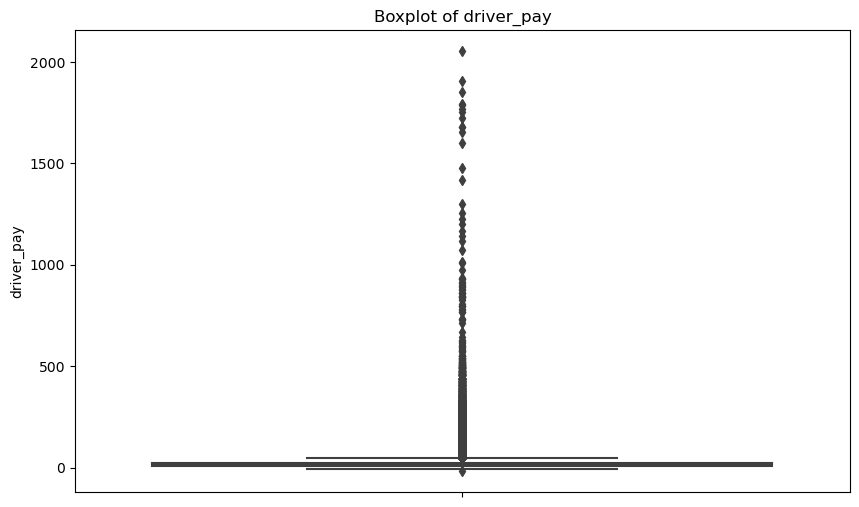

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


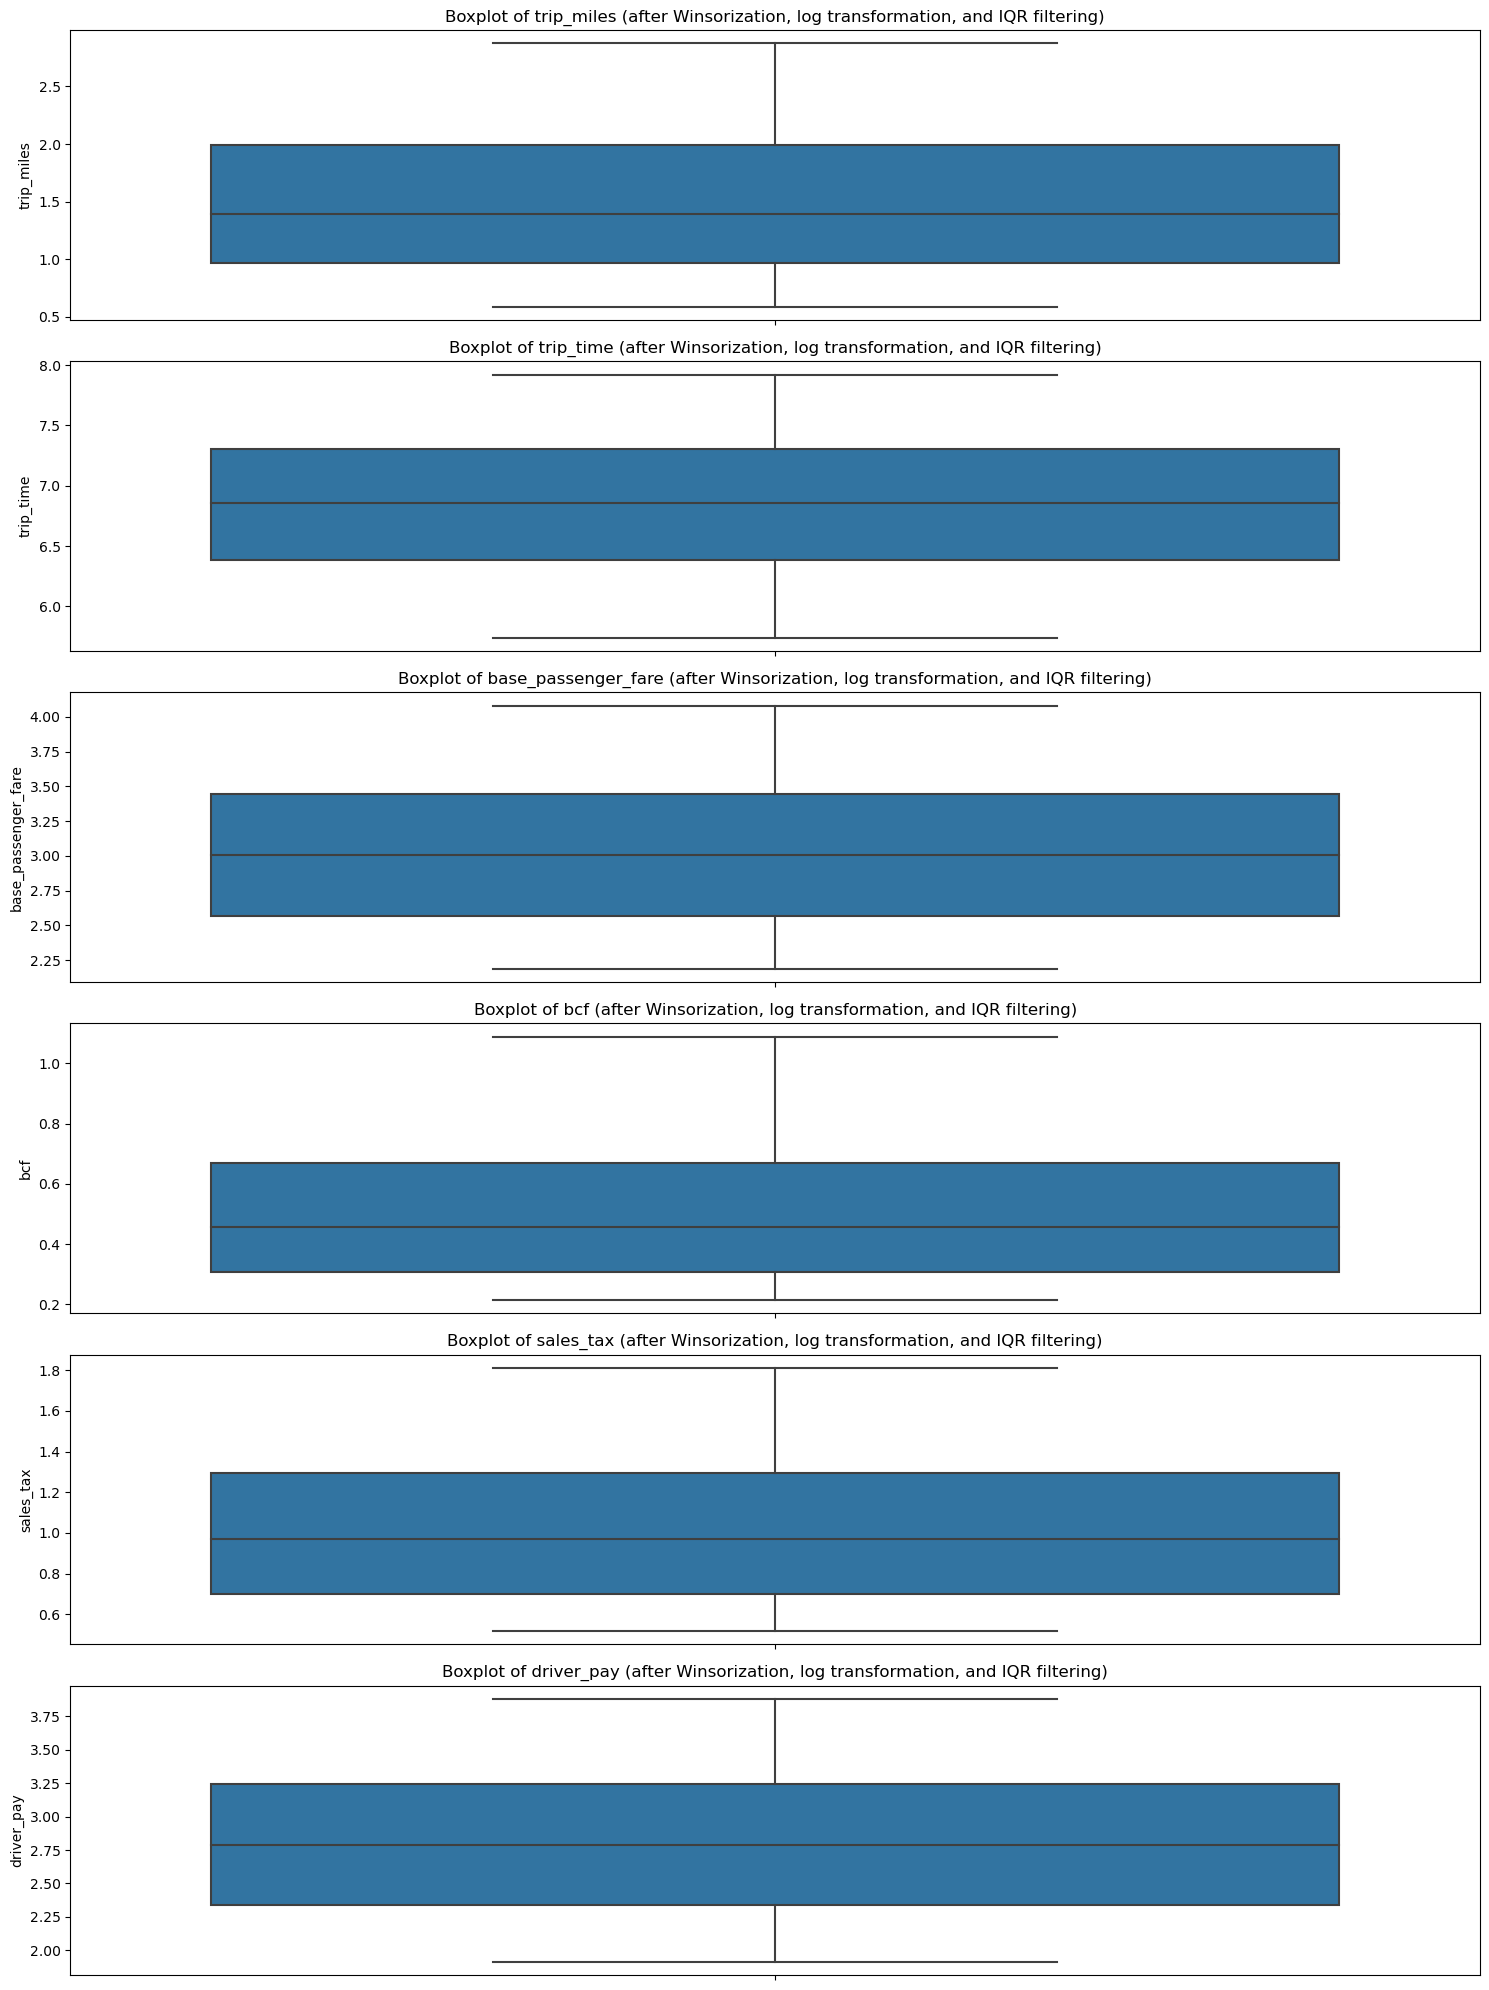

   trip_miles  estimated_emissions  emission_levels
0    1.289233           520.849990                0
1    1.105257           446.523760                0
2    0.587787           237.465813                0
3    0.741937           299.742687                0
4    0.936093           378.181717                0


/tmp/ipykernel_1066/1056792472.py:137: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = april_new.corr()


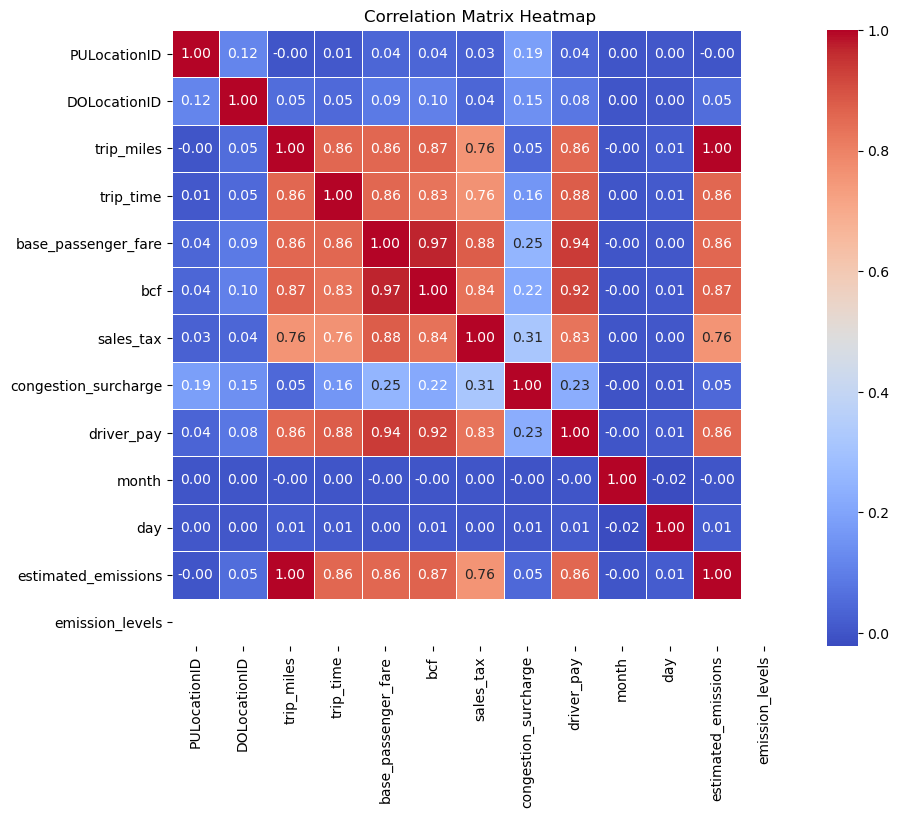

Shape of april_df: (13008723, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:18:10   
1               B03404               B03404         00:40:52   
2               B03404               B03404         00:53:46   
3               B03404               B03404         00:03:24   
4               B03404               B03404         00:13:38   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:23:57        00:24:06         00:38:16           230   
1          00:42:09        00:44:10         00:51:41           170   
2          00:56:21        00:56:31         01:01:55           237   
3          00:06:03        00:06:30         00:13:39           198   
4          00:19:27        00:21:11         00:32:11            36   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           137    1.289233   6.746412             2.799717  0.378436   
1           23

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

april = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-04.parquet")
april.head()
null_counts = april.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = april['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

april_filtered = april[~april['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
april_filtered = april_filtered.drop(columns=['airport_fee'])
null_counts = april_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
april_filtered.shape
april_filtered.info()
april_filtered = april_filtered.drop(columns=['hvfhs_license_num'])
april_filtered['date'] = april_filtered['request_datetime'].dt.date
april_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
april_filtered['date'] = pd.to_datetime(april_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
april_filtered['request_datetime'] = pd.to_datetime(april_filtered['request_datetime']).dt.time
april_filtered['on_scene_datetime'] = pd.to_datetime(april_filtered['on_scene_datetime']).dt.time
april_filtered['pickup_datetime'] = pd.to_datetime(april_filtered['pickup_datetime']).dt.time
april_filtered['dropoff_datetime'] = pd.to_datetime(april_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
april_filtered['month'] = pd.to_datetime(april_filtered['date']).dt.month
april_filtered['day'] = pd.to_datetime(april_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(april_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(april_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = april_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", april_filtered['month'].unique())

april_filtered = april_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips', 'tolls'])
duplicate_count = april_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
april_filtered = april_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = april_filtered[april_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

april_filtered = april_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(april_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = april_filtered[april_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

april_filtered = april_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(april_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=april_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
april_new = april_filtered.copy()

for column in columns_to_process:
    april_new[column] = winsorize(april_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    april_new[column] = np.log1p(april_new[column])

for column in columns_to_process:
    Q1 = april_new[column].quantile(0.25)
    Q3 = april_new[column].quantile(0.75)
    IQR = Q3 - Q1
    april_new = april_new[(april_new[column] >= (Q1 - 1.5 * IQR)) & (april_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=april_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
april_new['estimated_emissions'] = april_new['trip_miles'] * emission_factor
emission_threshold = 3000
april_new['emission_levels'] = april_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(april_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = april_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = april_new['dispatching_base_num'].value_counts()
top_10_bases = april_new['dispatching_base_num'].value_counts().head(10).index
april_new = april_new[april_new['dispatching_base_num'].isin(top_10_bases)]
april_new.shape
april_new.head()

# Save april_new to a new DataFrame called april_df
april_df = april_new.copy()

# Display the shape and first few rows of april_df to verify
print("Shape of april_df:", april_df.shape)
print(april_df.head())


In [4]:
april_df.to_parquet("april2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 147, 9, Finished, Available, Finished)

# **May EDA**

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 151, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4825699
request_datetime              0
on_scene_datetime       4825699
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

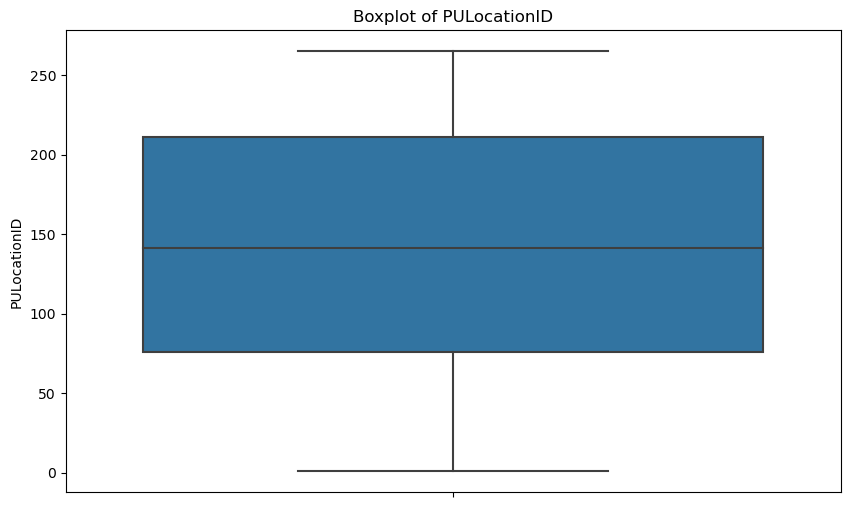

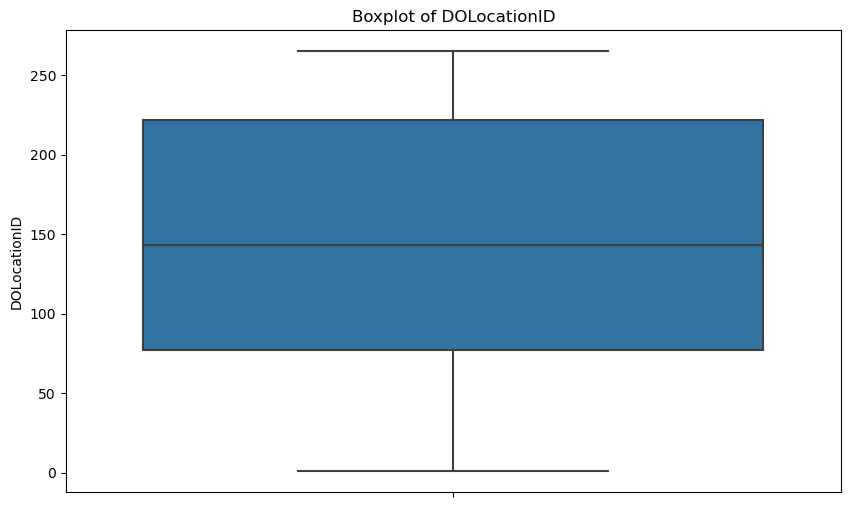

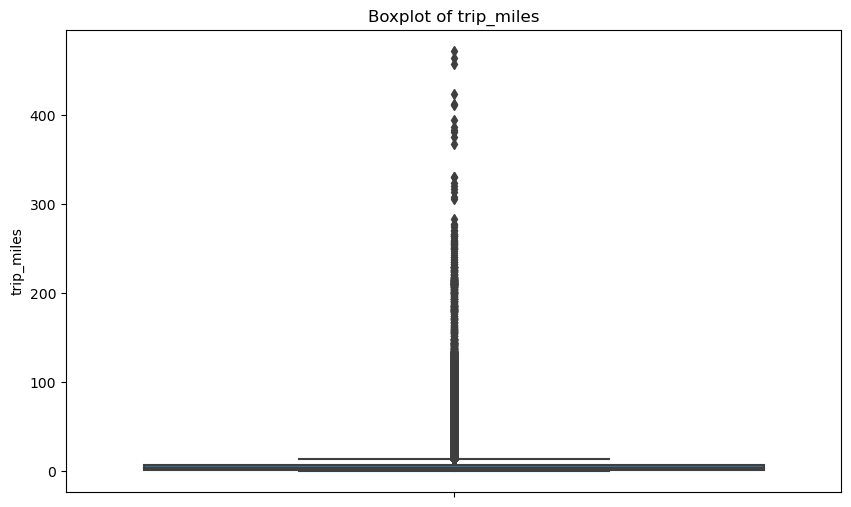

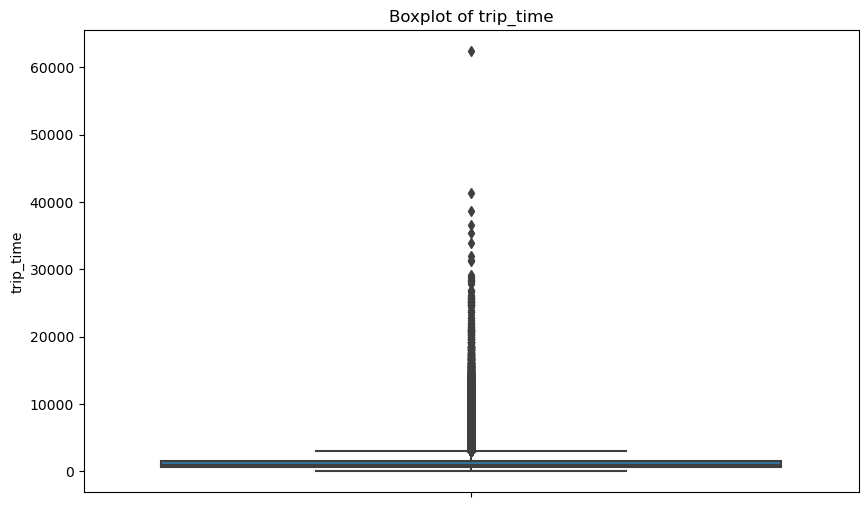

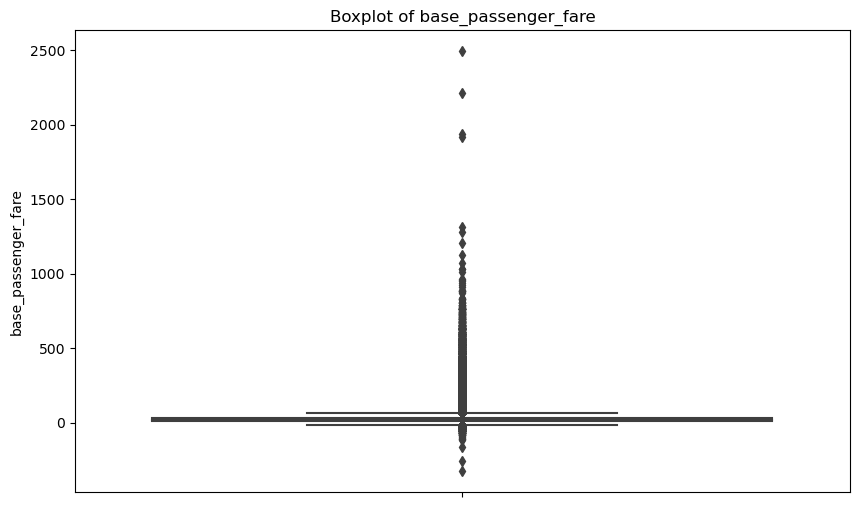

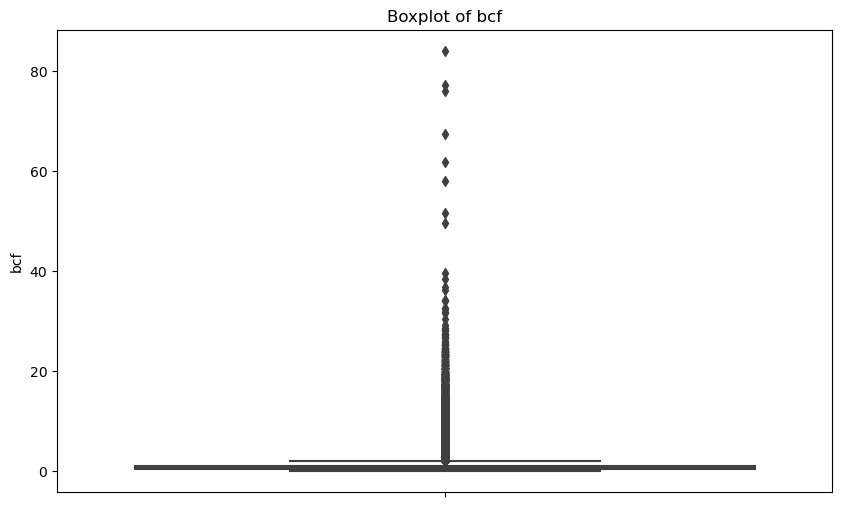

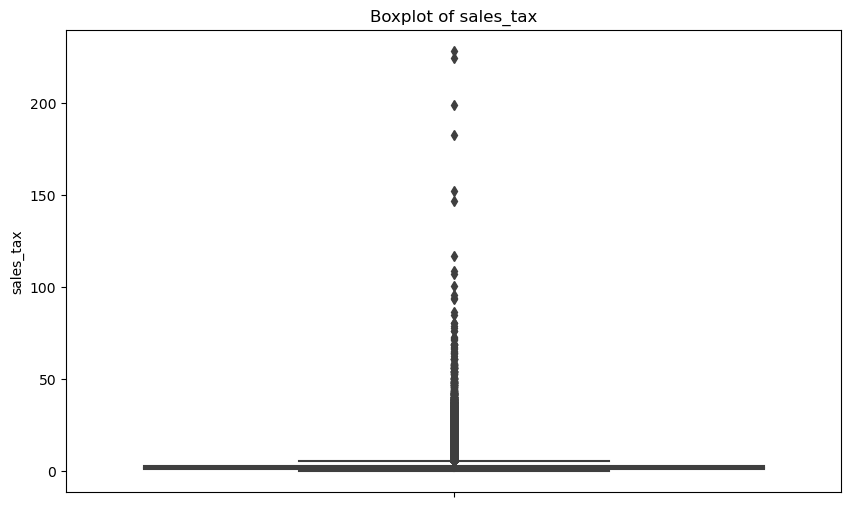

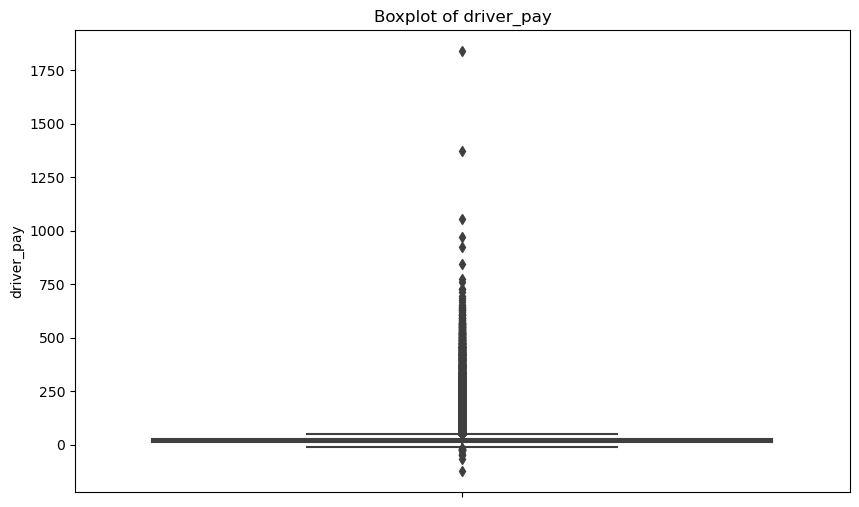

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


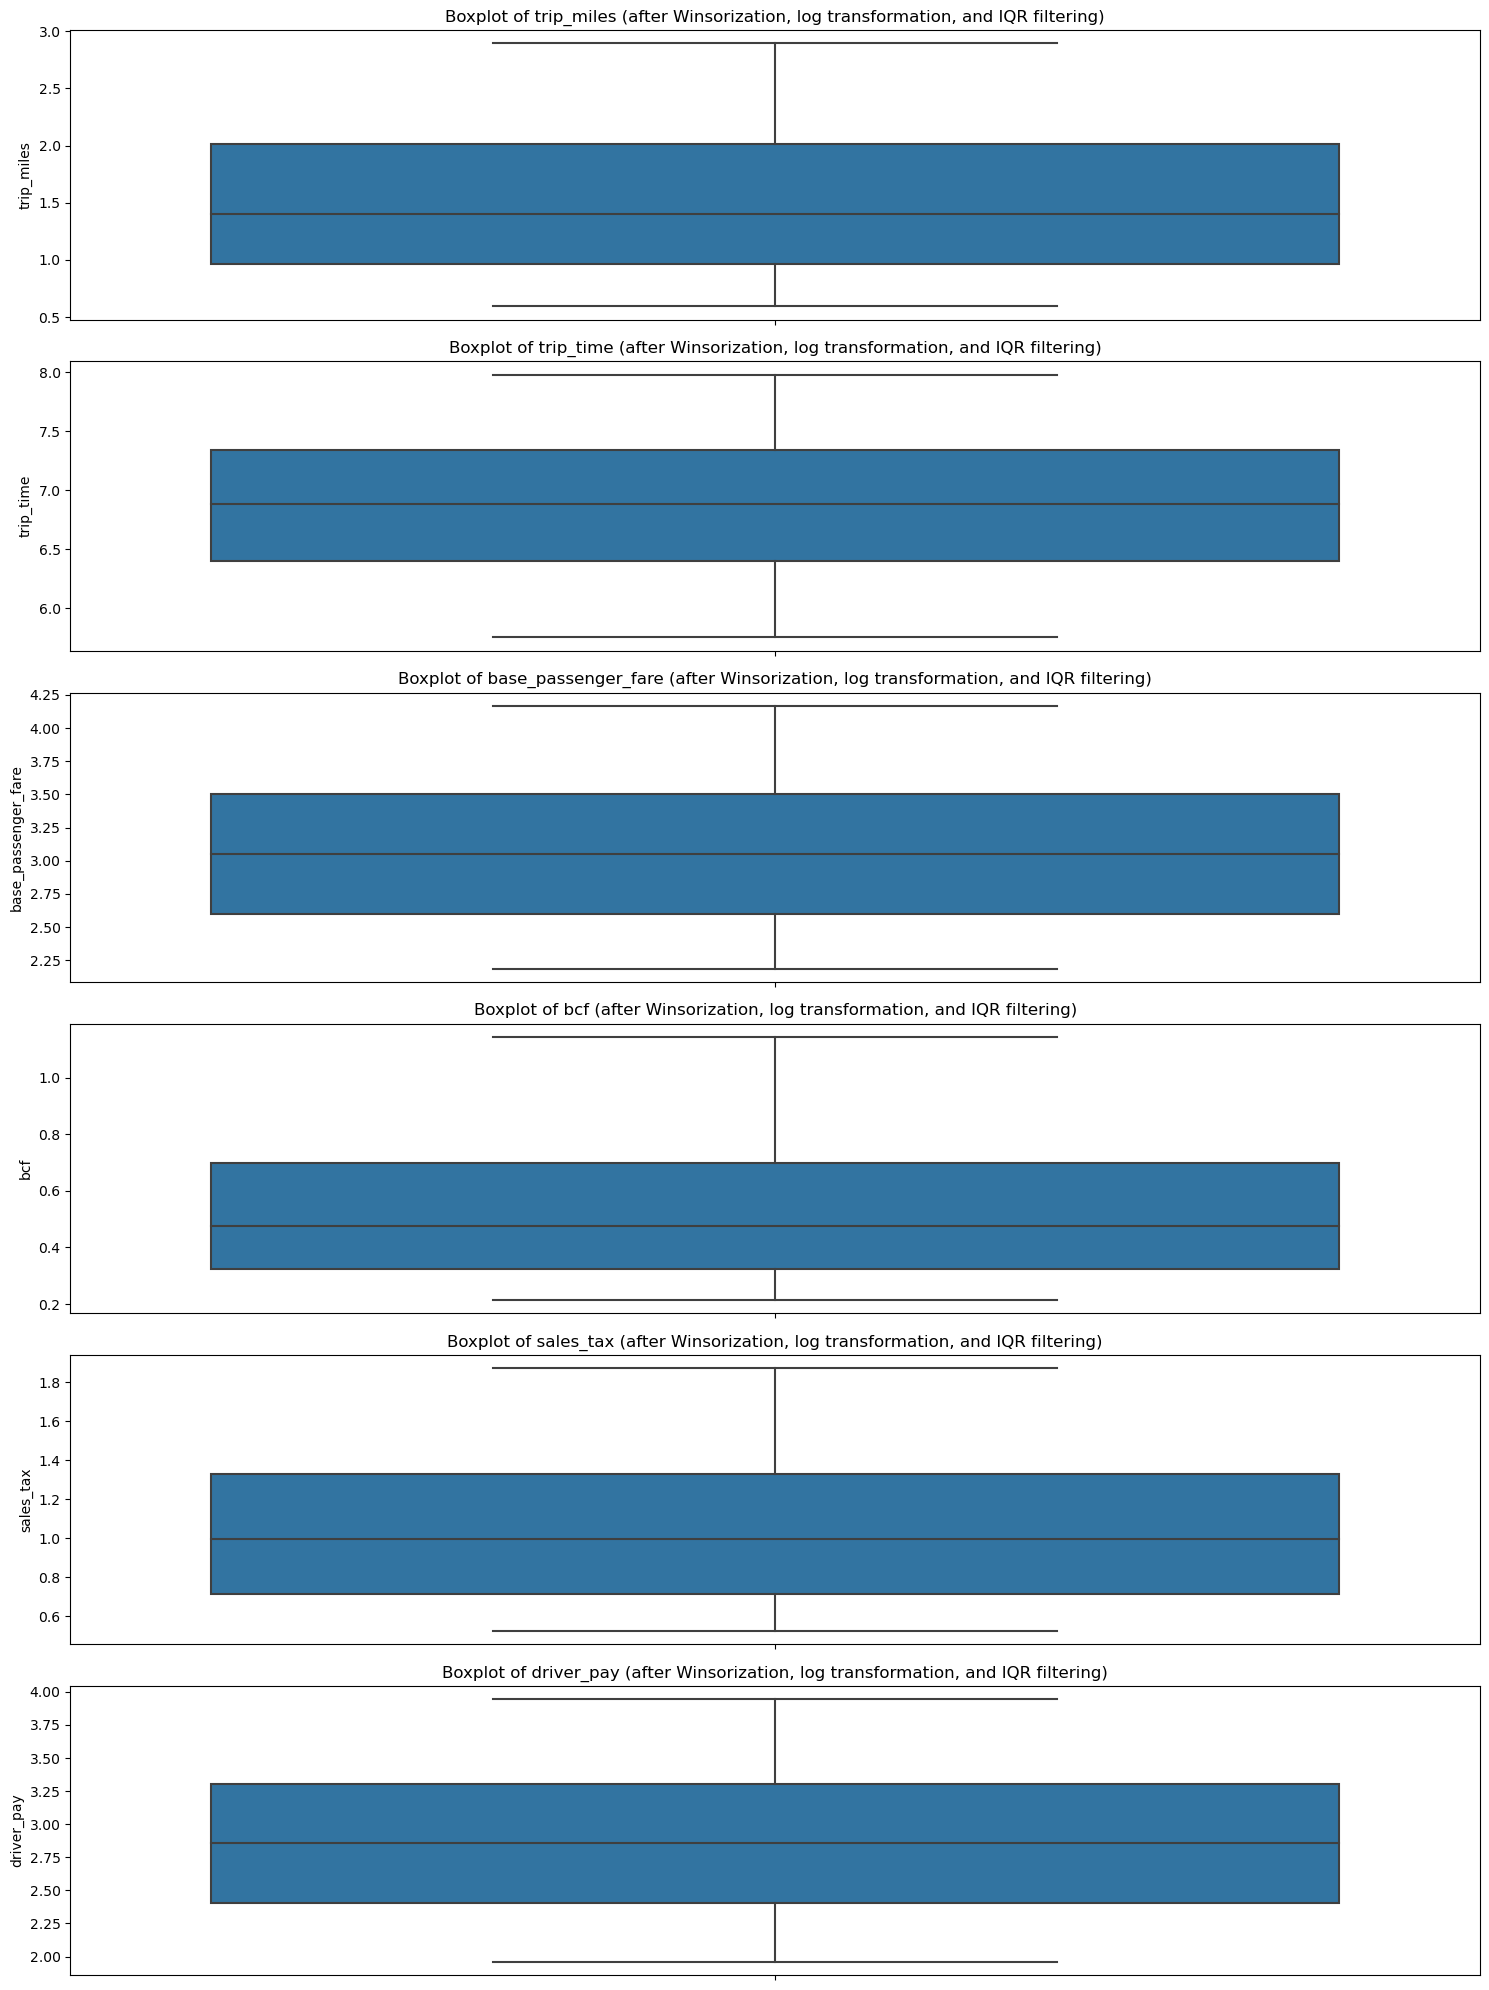

   trip_miles  estimated_emissions  emission_levels
0    1.095273           442.490449                0
1    2.480731          1002.215436                0
2    1.837370           742.297472                0
3    0.887891           358.708068                0
4    0.593327           239.704045                0


/tmp/ipykernel_9909/2176749926.py:137: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = may_new.corr()


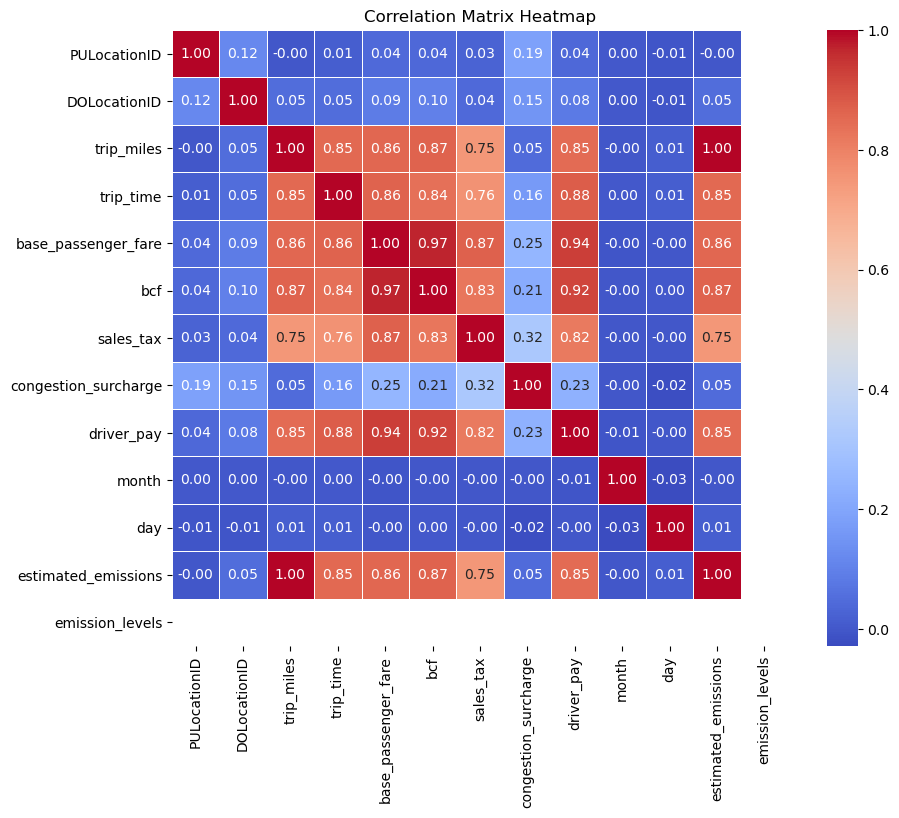

Shape of may_df: (13321738, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:15:31   
1               B03404               B03404         00:03:27   
2               B03404               B03404         23:55:03   
3               B03404               B03404         00:26:43   
4               B03404               B03404         00:40:23   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:28:12        00:33:13         00:51:49           263   
1          00:08:49        00:09:11         00:32:38           140   
2          23:59:04        00:00:56         00:18:45           205   
3          00:31:00        00:31:56         00:40:12           180   
4          00:43:00        00:43:23         00:46:21           197   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           163    1.095273   7.018402             3.084201  0.488580   
1            32 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

may = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-05.parquet")
may.head()
null_counts = may.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = may['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

may_filtered = may[~may['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
may_filtered = may_filtered.drop(columns=['airport_fee'])
null_counts = may_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
may_filtered.shape
may_filtered.info()
may_filtered = may_filtered.drop(columns=['hvfhs_license_num'])
may_filtered['date'] = may_filtered['request_datetime'].dt.date
may_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
may_filtered['date'] = pd.to_datetime(may_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
may_filtered['request_datetime'] = pd.to_datetime(may_filtered['request_datetime']).dt.time
may_filtered['on_scene_datetime'] = pd.to_datetime(may_filtered['on_scene_datetime']).dt.time
may_filtered['pickup_datetime'] = pd.to_datetime(may_filtered['pickup_datetime']).dt.time
may_filtered['dropoff_datetime'] = pd.to_datetime(may_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
may_filtered['month'] = pd.to_datetime(may_filtered['date']).dt.month
may_filtered['day'] = pd.to_datetime(may_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(may_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(may_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = may_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", may_filtered['month'].unique())

may_filtered = may_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = may_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
may_filtered = may_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = may_filtered[may_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

may_filtered = may_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(may_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = may_filtered[may_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

may_filtered = may_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(may_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=may_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
may_new = may_filtered.copy()

for column in columns_to_process:
    may_new[column] = winsorize(may_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    may_new[column] = np.log1p(may_new[column])

for column in columns_to_process:
    Q1 = may_new[column].quantile(0.25)
    Q3 = may_new[column].quantile(0.75)
    IQR = Q3 - Q1
    may_new = may_new[(may_new[column] >= (Q1 - 1.5 * IQR)) & (may_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=may_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
may_new['estimated_emissions'] = may_new['trip_miles'] * emission_factor
emission_threshold = 3000
may_new['emission_levels'] = may_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(may_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = may_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = may_new['dispatching_base_num'].value_counts()
top_10_bases = may_new['dispatching_base_num'].value_counts().head(10).index
may_new = may_new[may_new['dispatching_base_num'].isin(top_10_bases)]
may_new.shape
may_new.head()

# Save may_new to a new DataFrame called may_df
may_df = may_new.copy()

# Display the shape and first few rows of may_df to verify
print("Shape of may_df:", may_df.shape)
print(may_df.head())


In [2]:
may_df.to_parquet("may2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 151, 7, Finished, Available, Finished)

# JUNE EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 151, 8, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4723562
request_datetime              0
on_scene_datetime       4723559
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

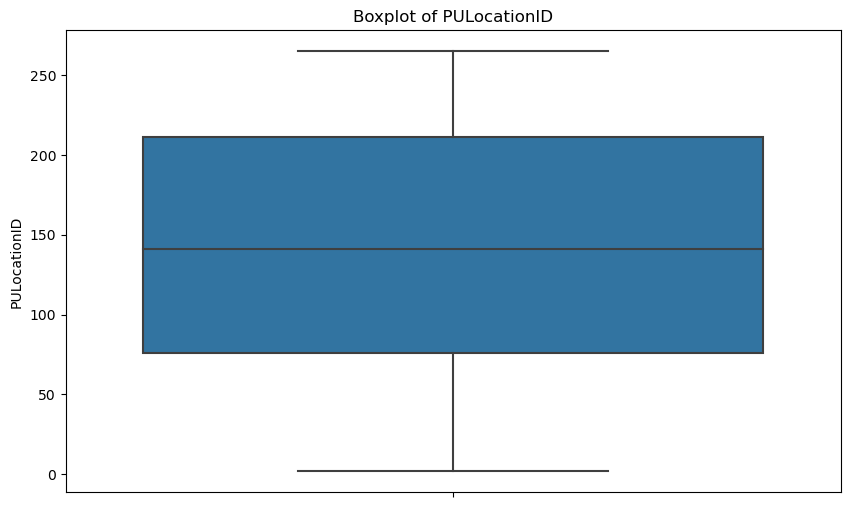

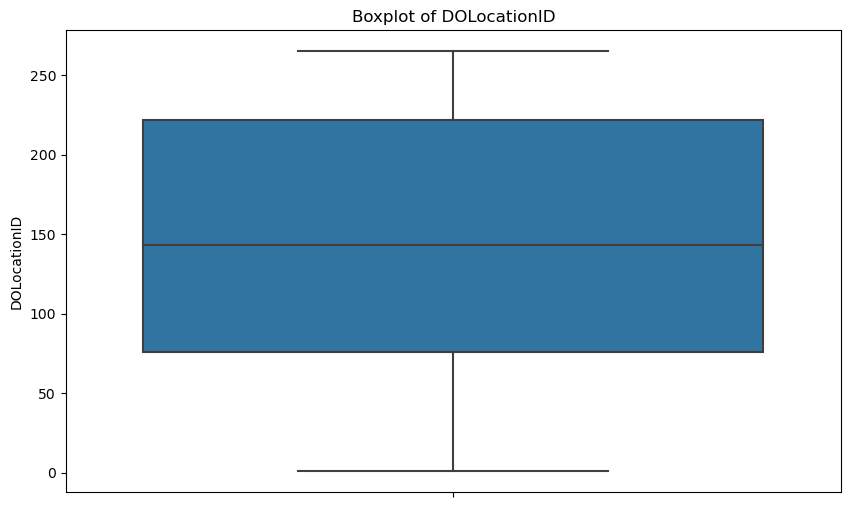

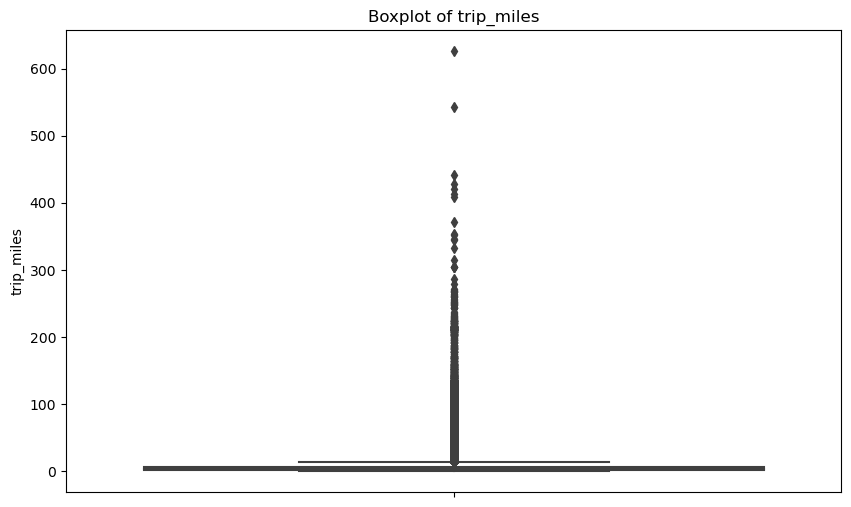

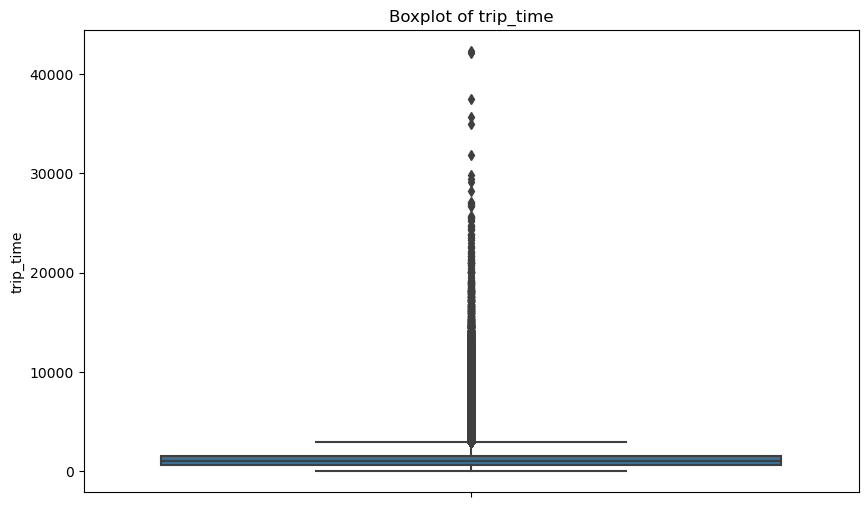

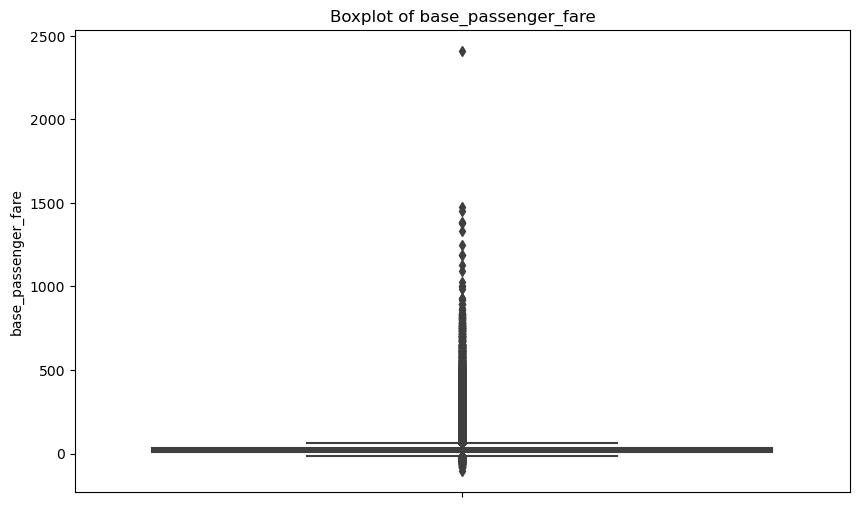

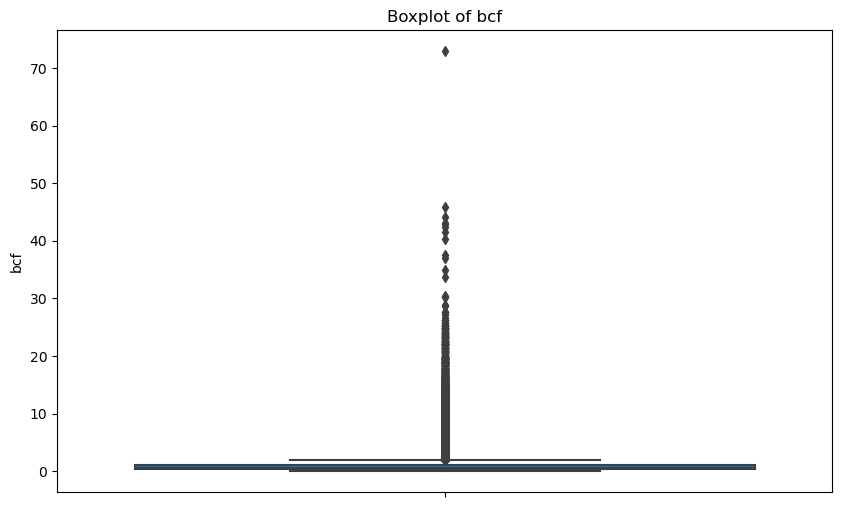

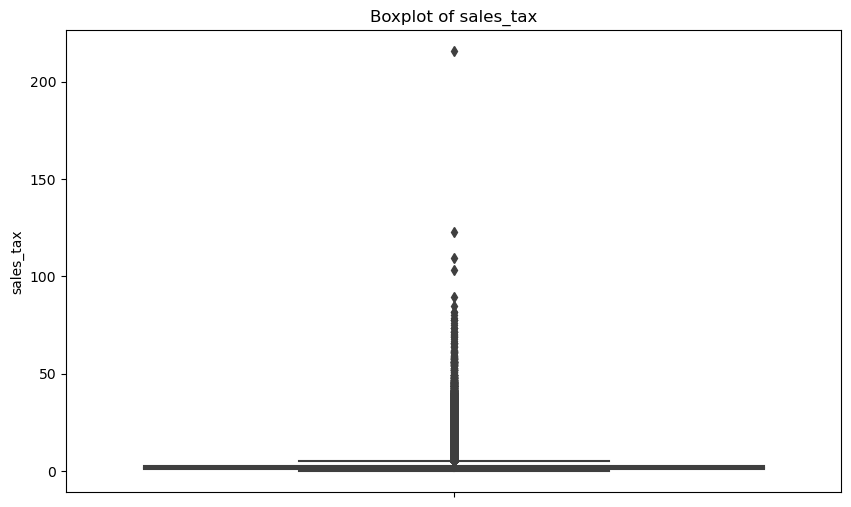

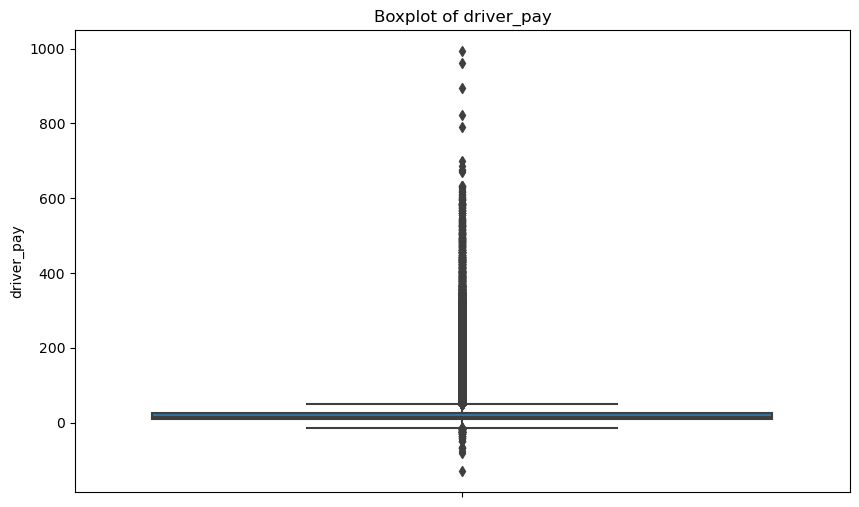

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


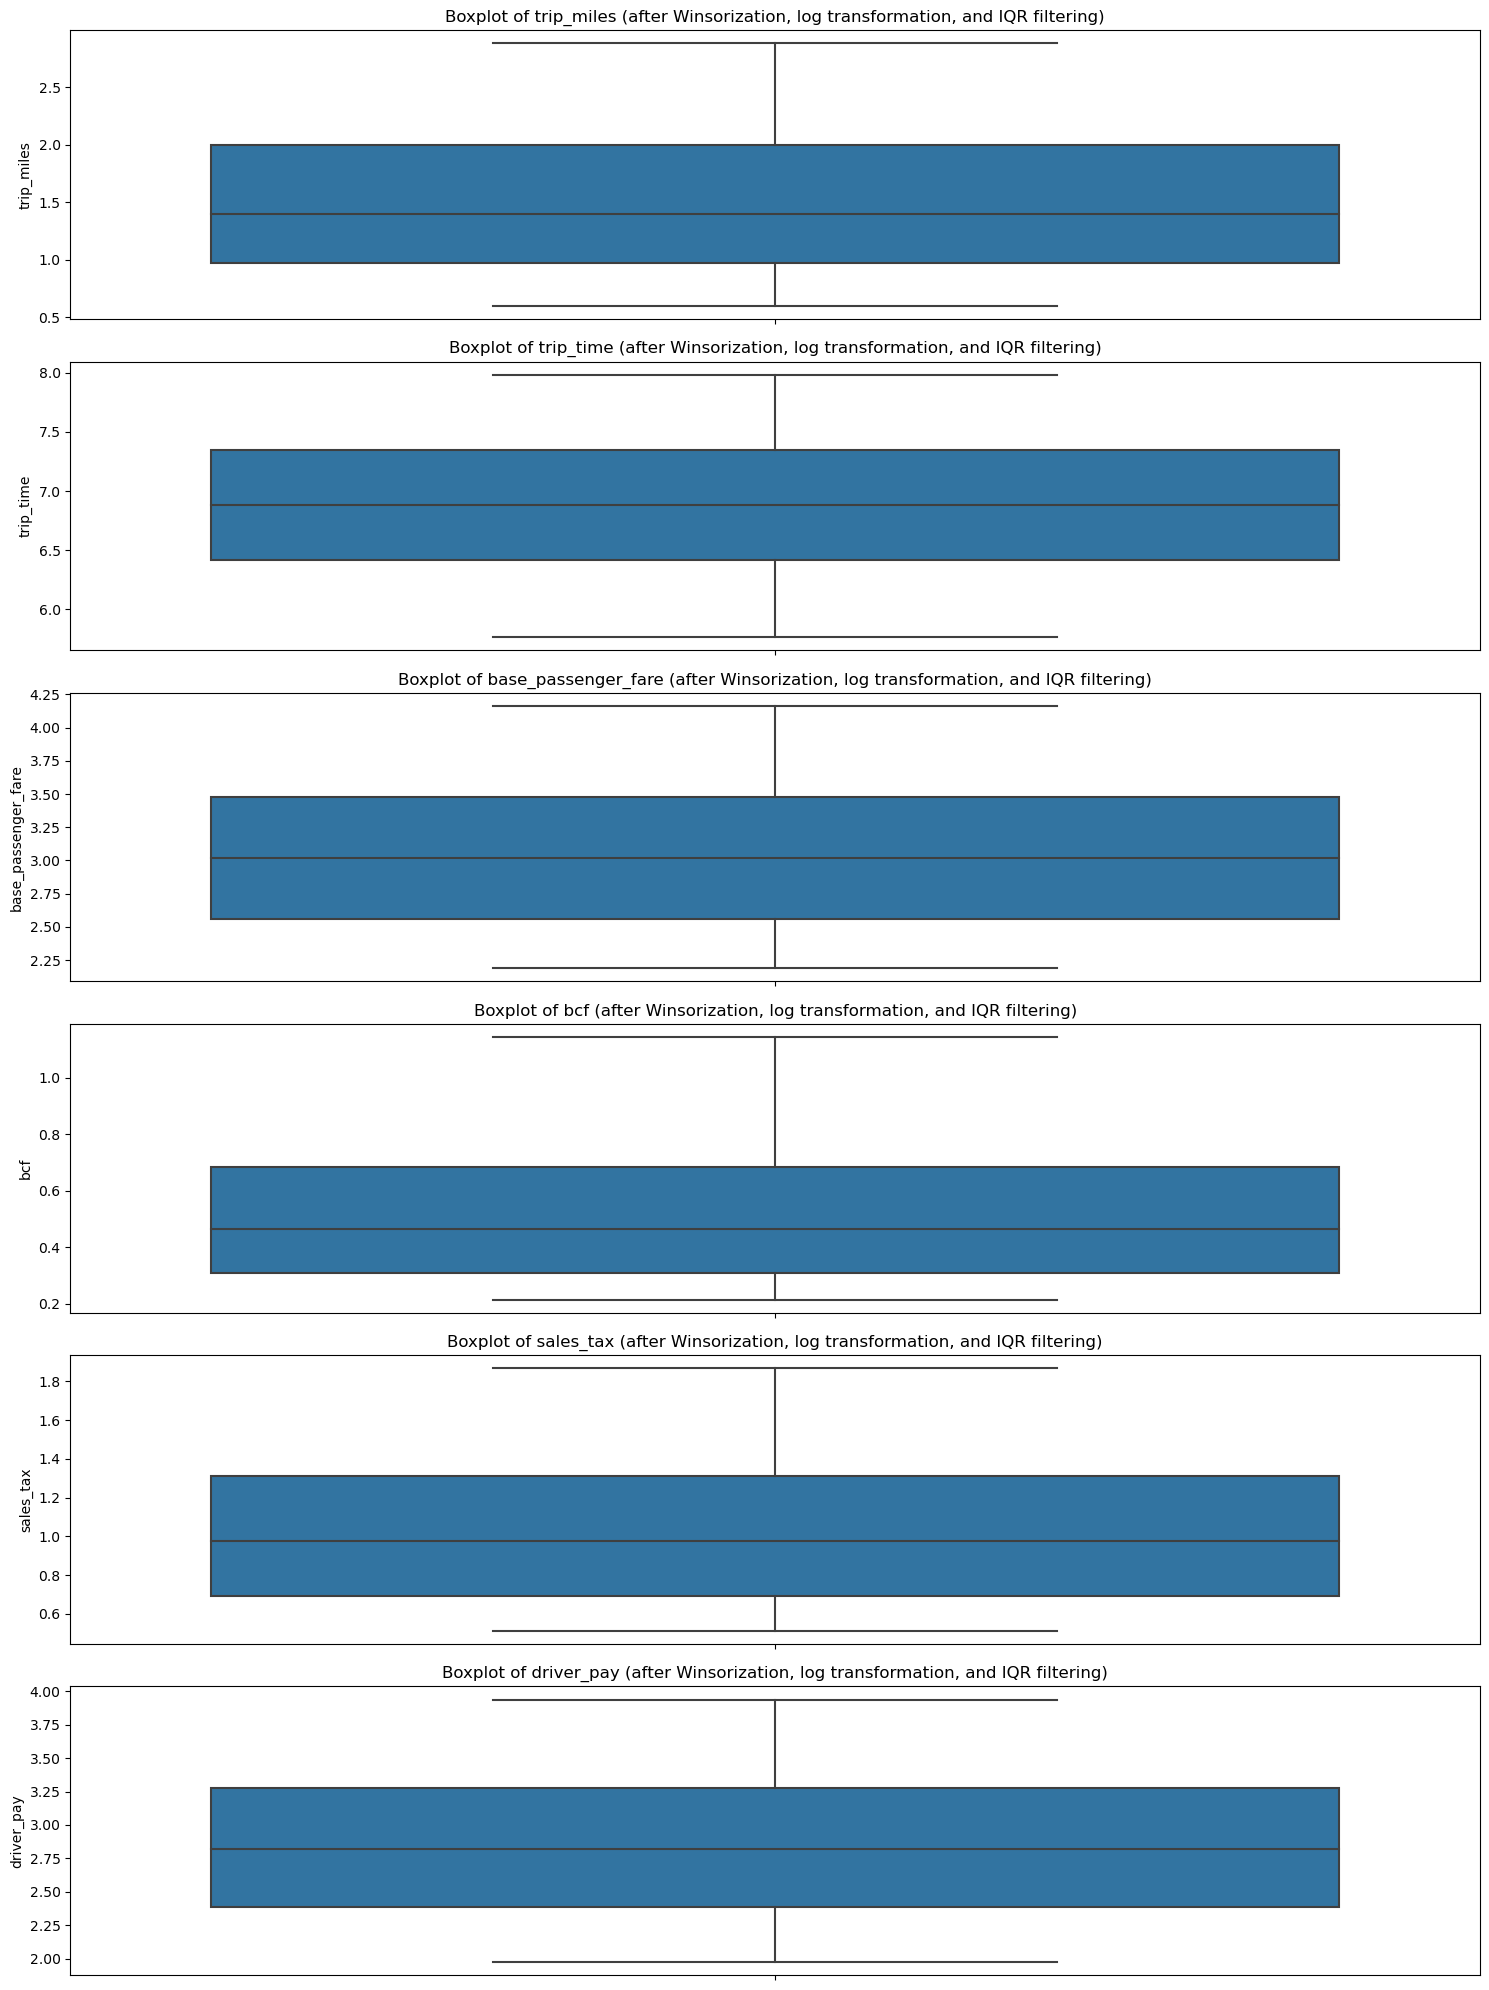

   trip_miles  estimated_emissions  emission_levels
0    0.916291           370.181456                0
1    1.644805           664.501243                0
2    1.363537           550.869099                0
3    1.864080           753.088373                0
6    2.883123          1164.781825                0


/tmp/ipykernel_9909/3078962720.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = june_new.corr()


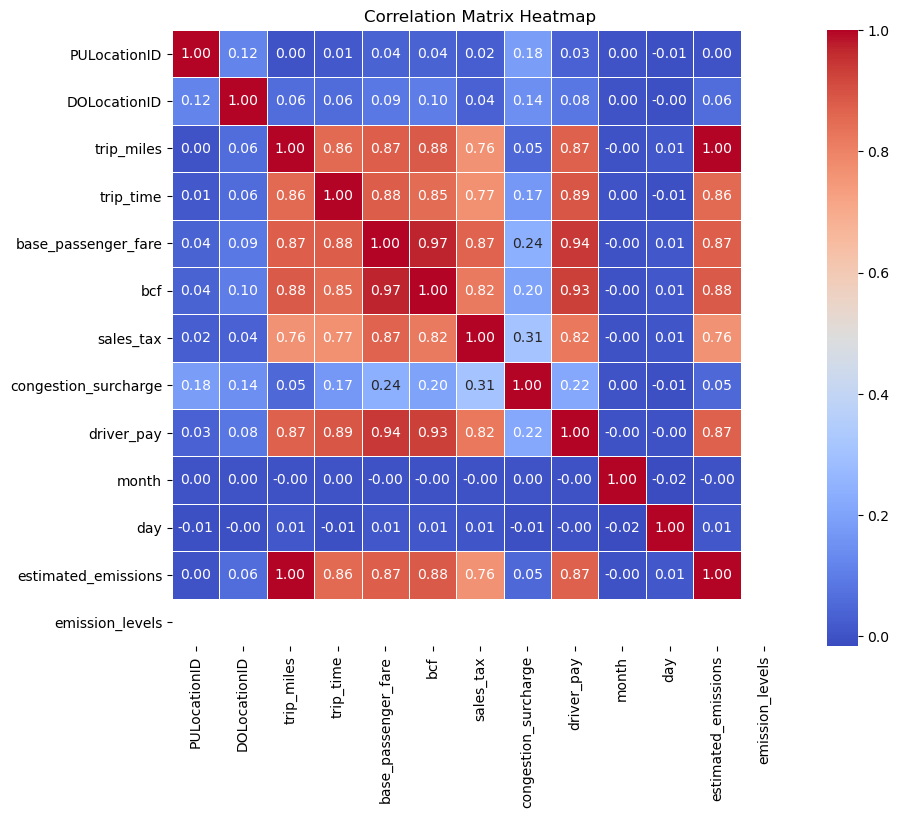

Shape of june_df: (13048257, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:15:35   
1               B03404               B03404         00:39:04   
2               B03404               B03404         00:27:53   
3               B03404               B03404         00:48:15   
6               B03404               B03404         00:40:17   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:17:20        00:17:41         00:25:41           234   
1          00:40:36        00:42:37         00:56:32           161   
2          00:31:34        00:36:22         00:45:31           231   
3          00:49:38        00:51:18         01:11:15            87   
6          00:46:25        00:47:32         01:34:28           132   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           114    0.916291   6.175867             2.187174  0.215111   
1           151

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

june = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-06.parquet")
june.head()
null_counts = june.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = june['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

june_filtered = june[~june['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
june_filtered = june_filtered.drop(columns=['airport_fee'])
june_filtered = june_filtered.dropna(subset=['originating_base_num'])
null_counts = june_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
june_filtered.shape
june_filtered.info()
june_filtered = june_filtered.drop(columns=['hvfhs_license_num'])
june_filtered['date'] = june_filtered['request_datetime'].dt.date
june_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
june_filtered['date'] = pd.to_datetime(june_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
june_filtered['request_datetime'] = pd.to_datetime(june_filtered['request_datetime']).dt.time
june_filtered['on_scene_datetime'] = pd.to_datetime(june_filtered['on_scene_datetime']).dt.time
june_filtered['pickup_datetime'] = pd.to_datetime(june_filtered['pickup_datetime']).dt.time
june_filtered['dropoff_datetime'] = pd.to_datetime(june_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
june_filtered['month'] = pd.to_datetime(june_filtered['date']).dt.month
june_filtered['day'] = pd.to_datetime(june_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(june_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(june_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = june_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", june_filtered['month'].unique())

june_filtered = june_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = june_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
june_filtered = june_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = june_filtered[june_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

june_filtered = june_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(june_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = june_filtered[june_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

june_filtered = june_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(june_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=june_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
june_new = june_filtered.copy()

for column in columns_to_process:
    june_new[column] = winsorize(june_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    june_new[column] = np.log1p(june_new[column])

for column in columns_to_process:
    Q1 = june_new[column].quantile(0.25)
    Q3 = june_new[column].quantile(0.75)
    IQR = Q3 - Q1
    june_new = june_new[(june_new[column] >= (Q1 - 1.5 * IQR)) & (june_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=june_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
june_new['estimated_emissions'] = june_new['trip_miles'] * emission_factor
emission_threshold = 3000
june_new['emission_levels'] = june_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(june_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = june_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = june_new['dispatching_base_num'].value_counts()
top_10_bases = june_new['dispatching_base_num'].value_counts().head(10).index
june_new = june_new[june_new['dispatching_base_num'].isin(top_10_bases)]
june_new.shape
june_new.head()

# Save june_new to a new DataFrame called june_df
june_df = june_new.copy()

# Display the shape and first few rows of june_df to verify
print("Shape of june_df:", june_df.shape)
print(june_df.head())


In [6]:
june_df.to_parquet("Users/bchheda/jun2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 151, 11, Finished, Available, Finished)

# JULY EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 155, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4883079
request_datetime              0
on_scene_datetime       4883071
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

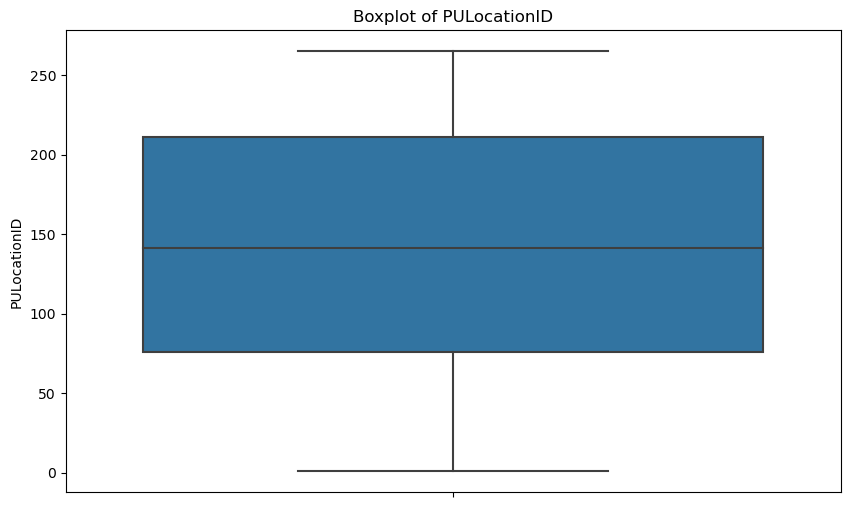

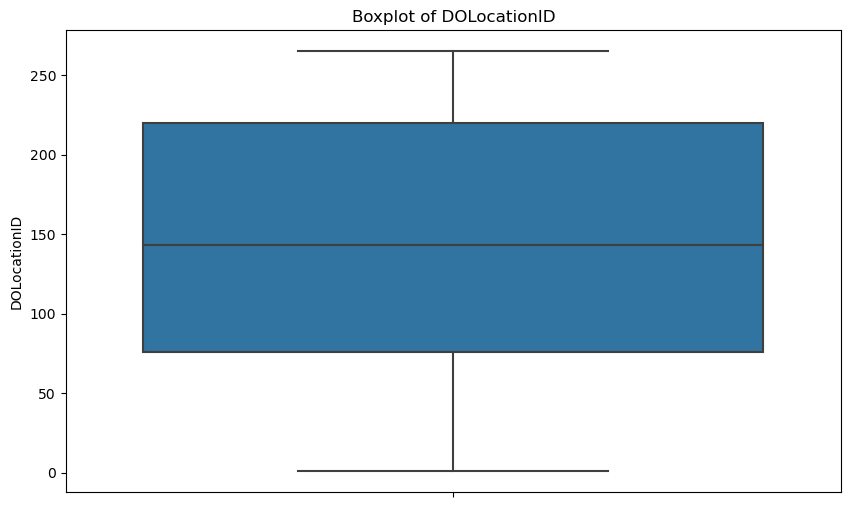

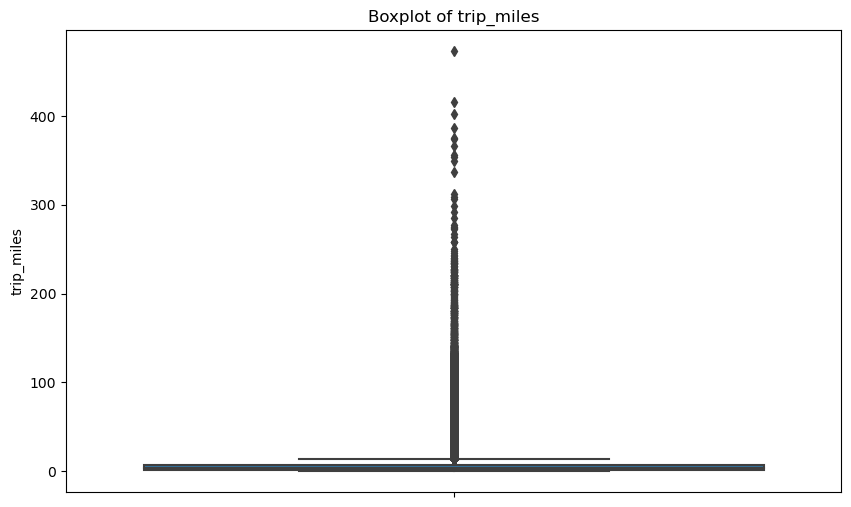

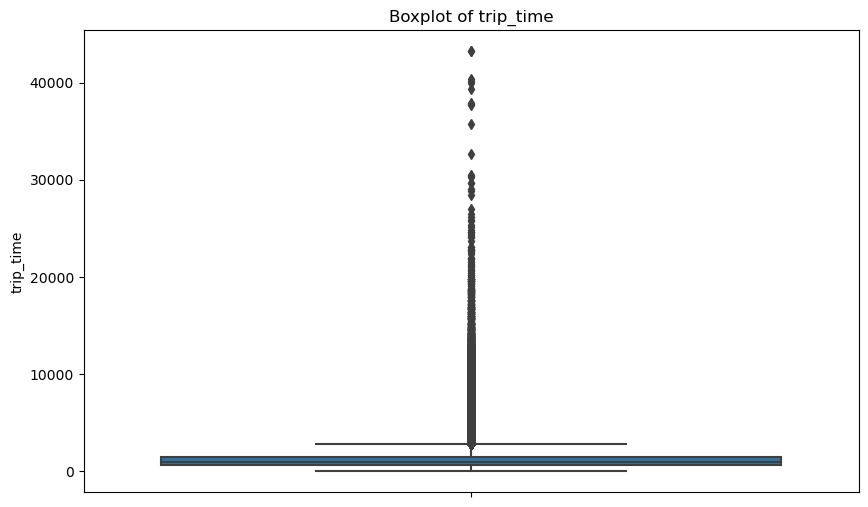

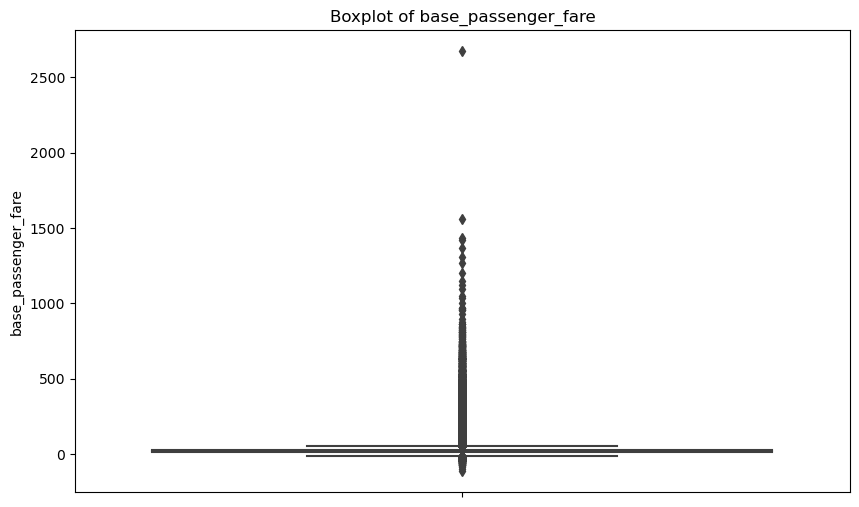

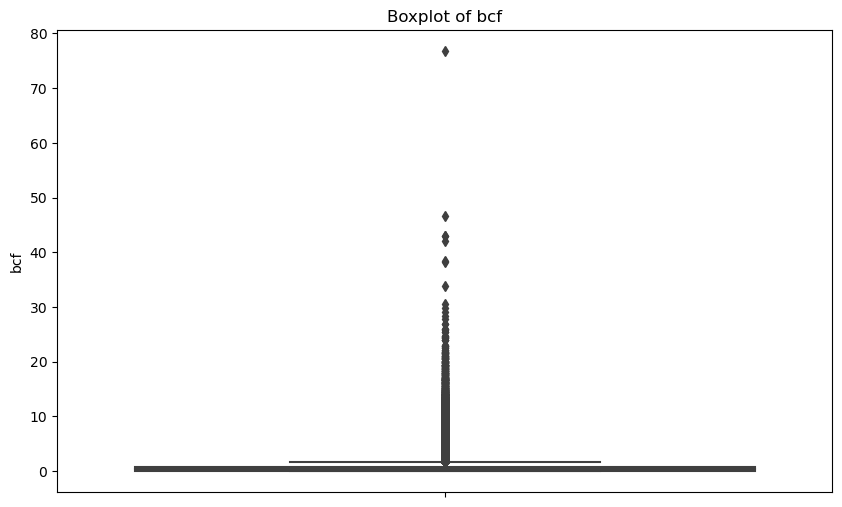

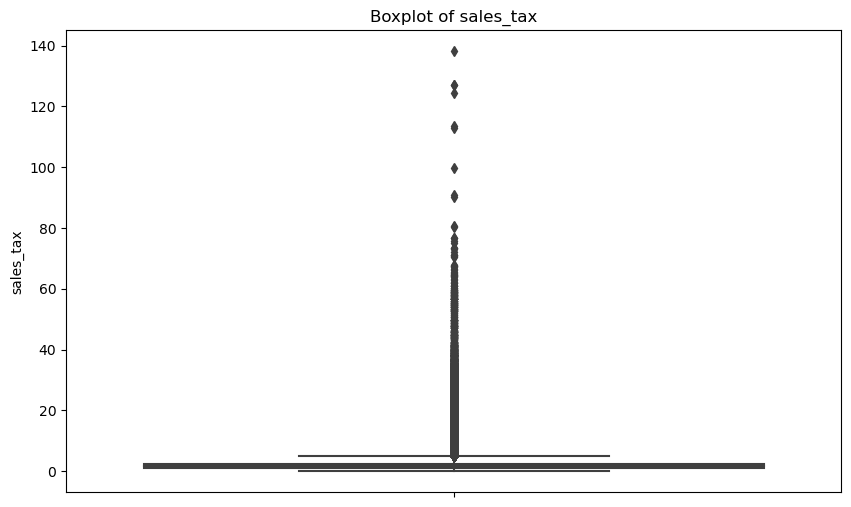

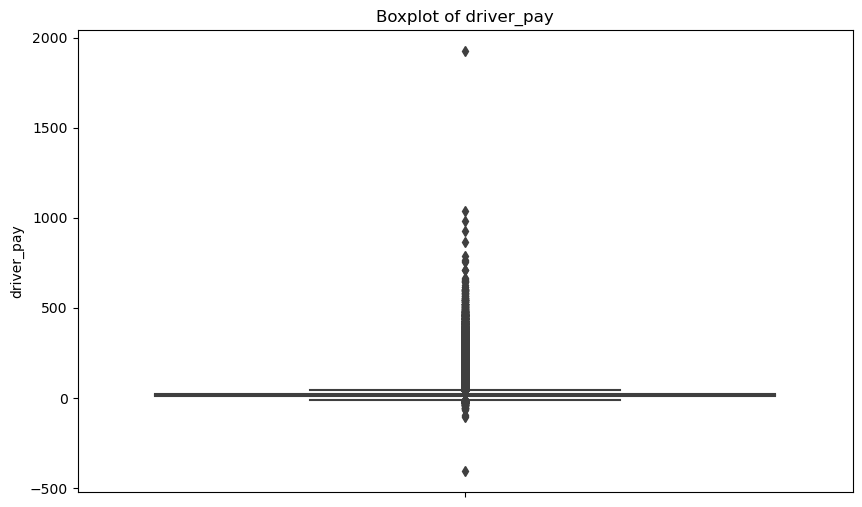

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


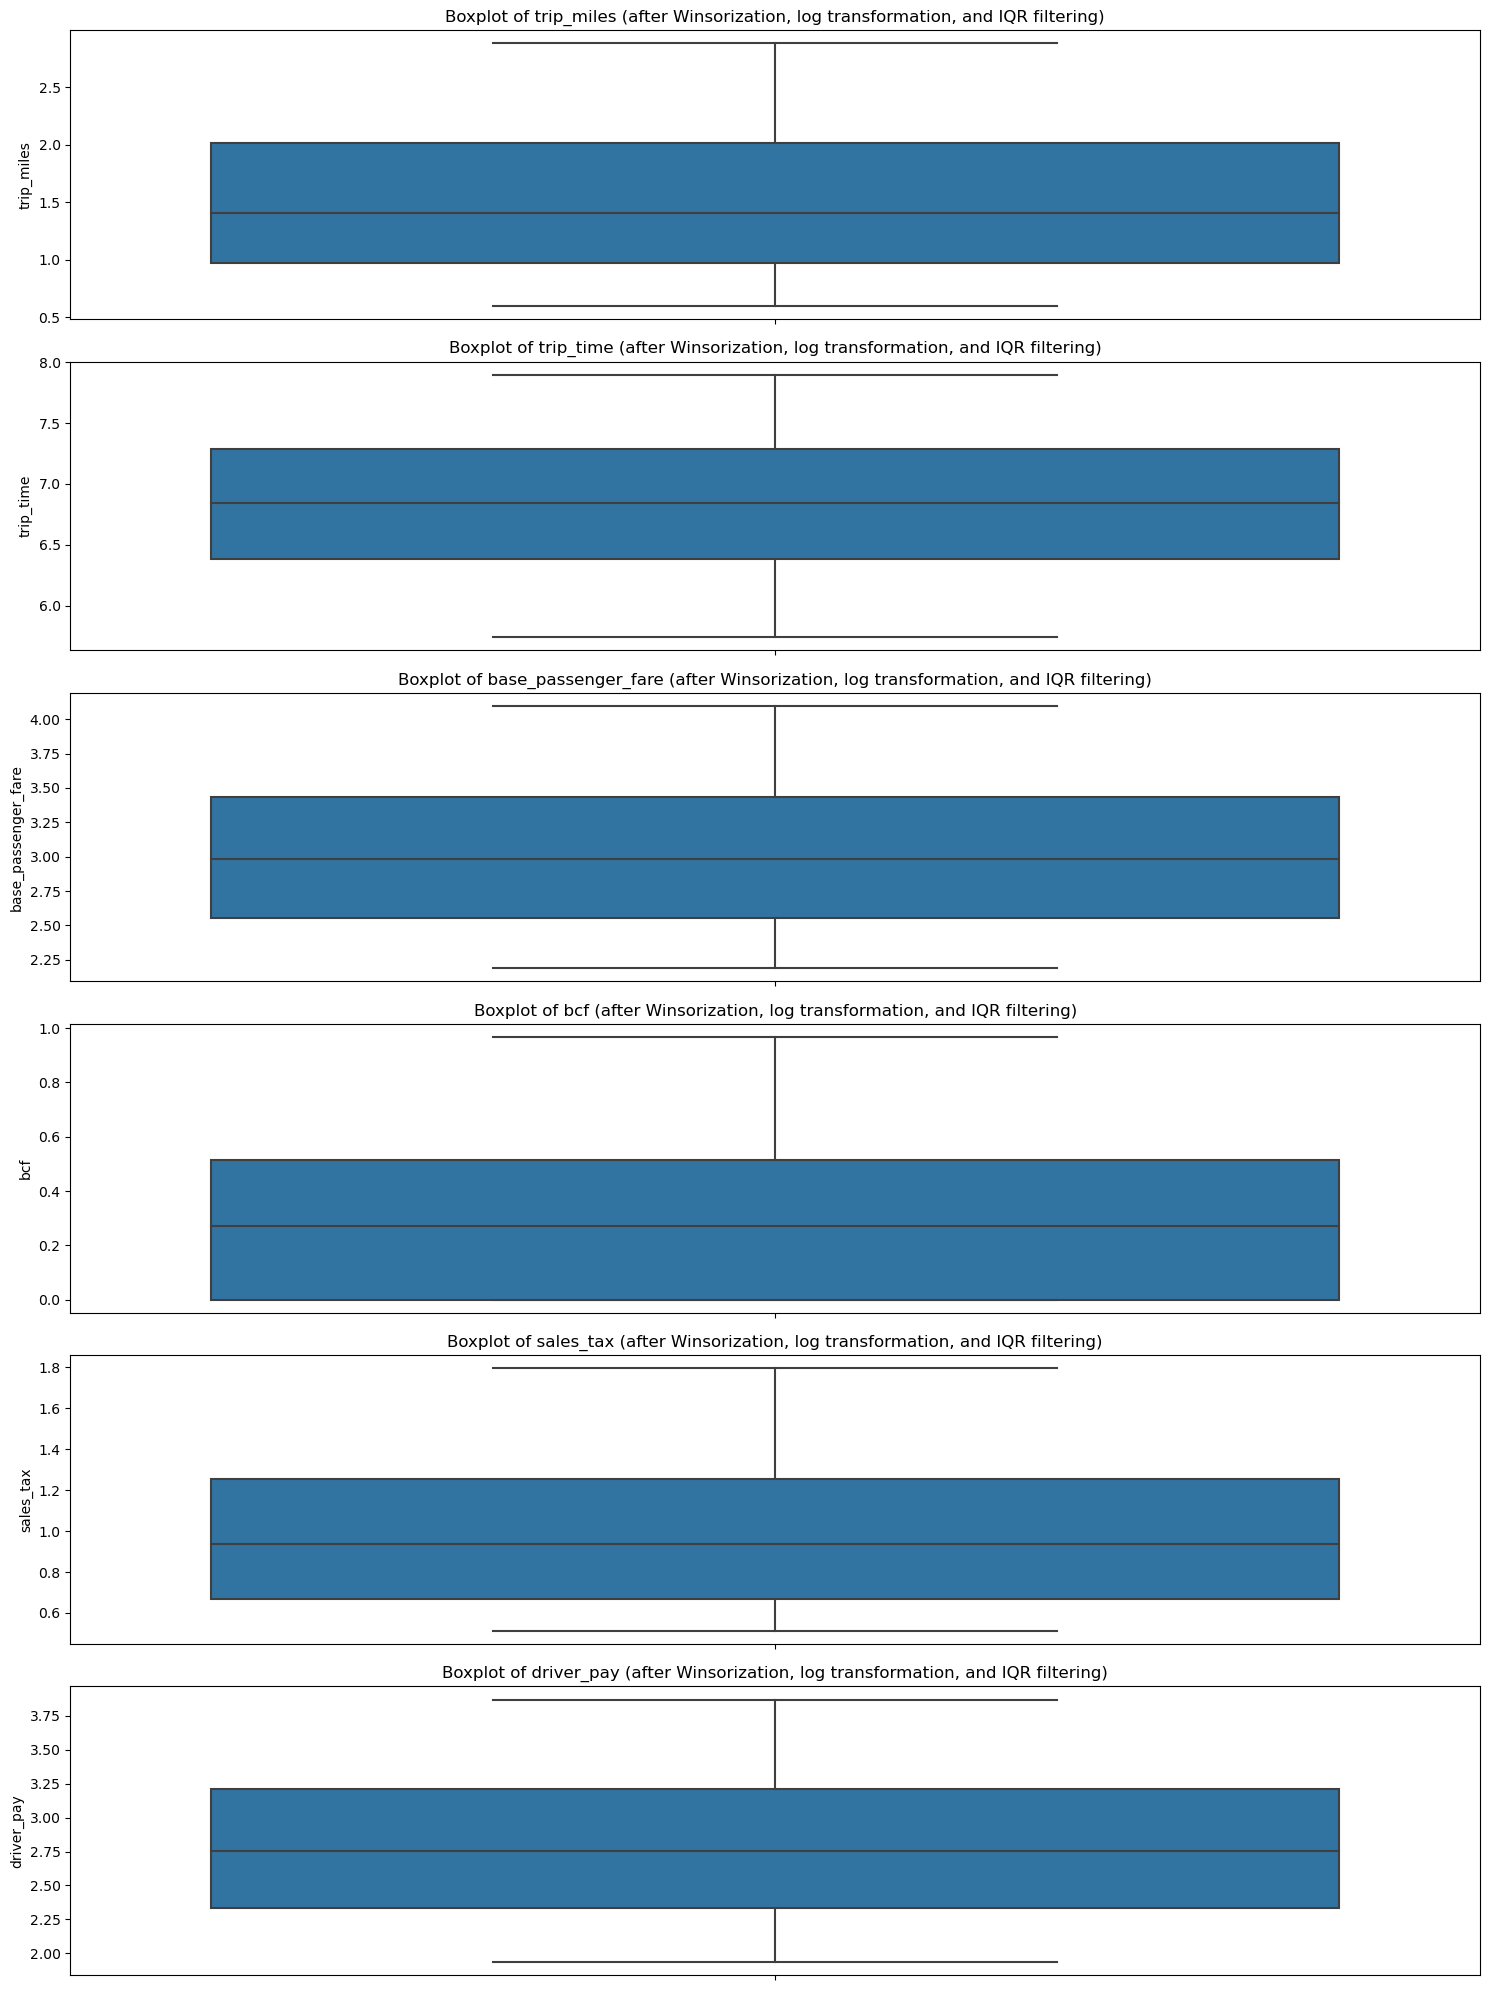

   trip_miles  estimated_emissions  emission_levels
0    2.050270           828.309146                0
1    2.883123          1164.781825                0
2    1.724551           696.718491                0
3    2.220290           896.997100                0
4    1.163151           469.912927                0


/tmp/ipykernel_14909/1849076743.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = july_new.corr()


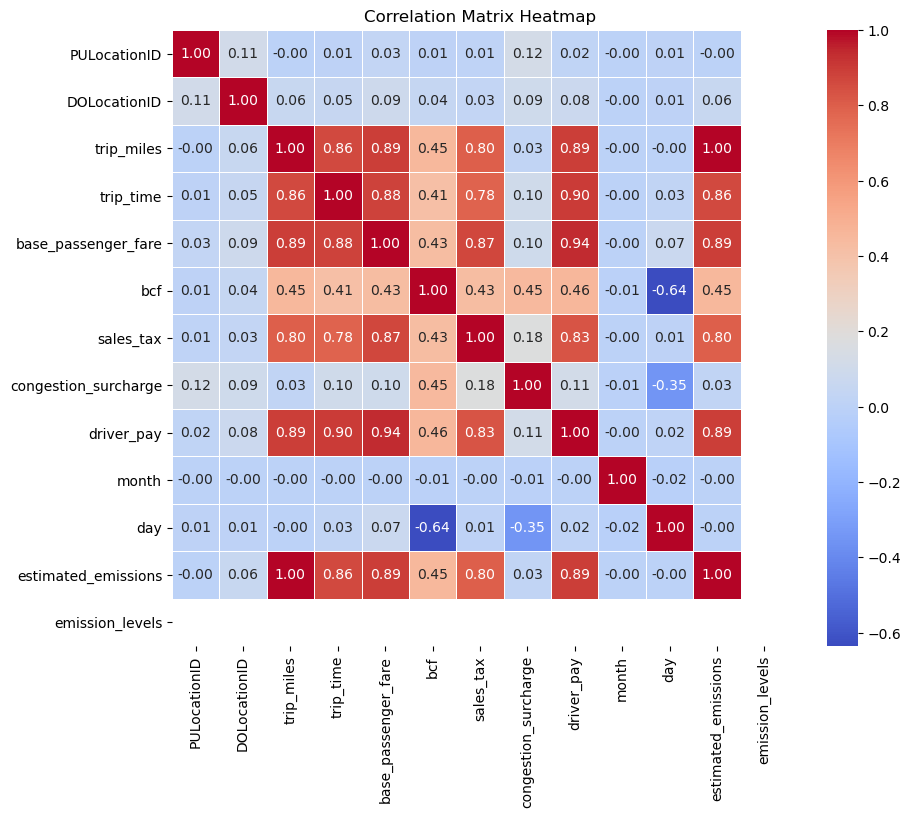

Shape of july_df: (12574430, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:36:26   
1               B03404               B03404         00:29:16   
2               B03404               B03404         23:54:05   
3               B03404               B03404         00:18:22   
4               B03404               B03404         00:44:45   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:40:56        00:41:13         01:02:43            88   
1          00:32:07        00:32:53         01:10:19           131   
2          00:00:12        00:00:38         00:16:45           211   
3          00:19:04        00:21:05         00:47:29           141   
4          00:49:04        00:49:16         00:55:47            80   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           163    2.050270   7.163172             4.097008  0.966984   
1           265

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

july = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-07.parquet")
july.head()
null_counts = july.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = july['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

july_filtered = july[~july['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
july_filtered = july_filtered.drop(columns=['airport_fee'])
july_filtered = july_filtered.dropna(subset=['originating_base_num'])
null_counts = july_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
july_filtered.shape
july_filtered.info()
july_filtered = july_filtered.drop(columns=['hvfhs_license_num'])
july_filtered['date'] = july_filtered['request_datetime'].dt.date
july_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
july_filtered['date'] = pd.to_datetime(july_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
july_filtered['request_datetime'] = pd.to_datetime(july_filtered['request_datetime']).dt.time
july_filtered['on_scene_datetime'] = pd.to_datetime(july_filtered['on_scene_datetime']).dt.time
july_filtered['pickup_datetime'] = pd.to_datetime(july_filtered['pickup_datetime']).dt.time
july_filtered['dropoff_datetime'] = pd.to_datetime(july_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
july_filtered['month'] = pd.to_datetime(july_filtered['date']).dt.month
july_filtered['day'] = pd.to_datetime(july_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(july_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(july_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = july_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", july_filtered['month'].unique())

july_filtered = july_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = july_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
july_filtered = july_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = july_filtered[july_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

july_filtered = july_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(july_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = july_filtered[july_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

july_filtered = july_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(july_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=july_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
july_new = july_filtered.copy()

for column in columns_to_process:
    july_new[column] = winsorize(july_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    july_new[column] = np.log1p(july_new[column])

for column in columns_to_process:
    Q1 = july_new[column].quantile(0.25)
    Q3 = july_new[column].quantile(0.75)
    IQR = Q3 - Q1
    july_new = july_new[(july_new[column] >= (Q1 - 1.5 * IQR)) & (july_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=july_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
july_new['estimated_emissions'] = july_new['trip_miles'] * emission_factor
emission_threshold = 3000
july_new['emission_levels'] = july_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(july_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = july_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = july_new['dispatching_base_num'].value_counts()
top_10_bases = july_new['dispatching_base_num'].value_counts().head(10).index
july_new = july_new[july_new['dispatching_base_num'].isin(top_10_bases)]
july_new.shape
july_new.head()

# Save july_new to a new DataFrame called july_df
july_df = july_new.copy()

# Display the shape and first few rows of july_df to verify
print("Shape of july_df:", july_df.shape)
print(july_df.head())


In [2]:
july_df.to_parquet("Users/bchheda/july2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 155, 7, Finished, Available, Finished)

# August EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 155, 8, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4678840
request_datetime              0
on_scene_datetime       4678794
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

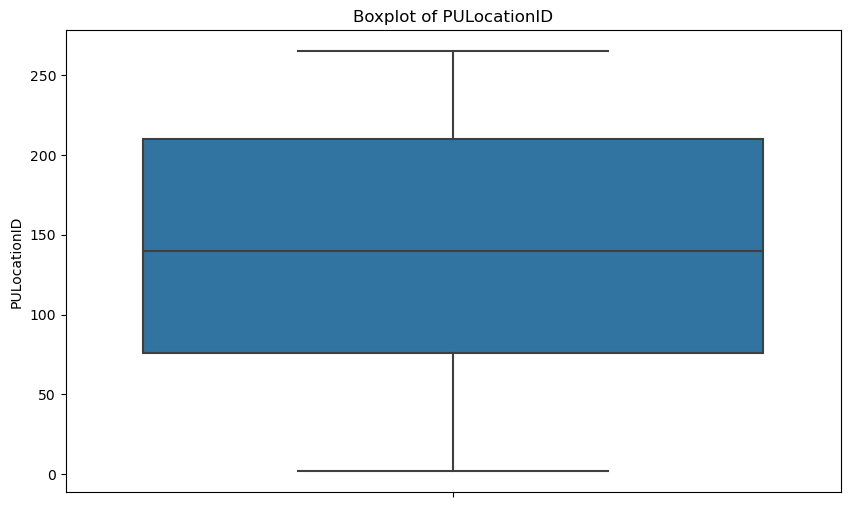

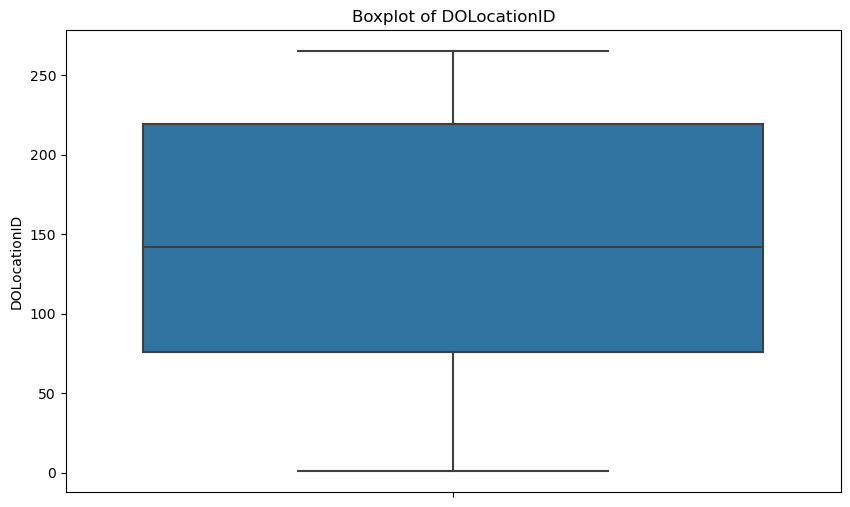

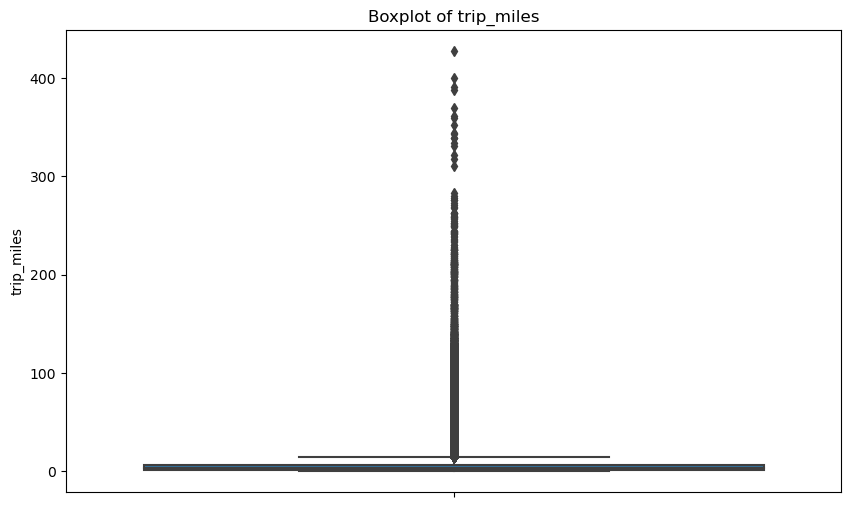

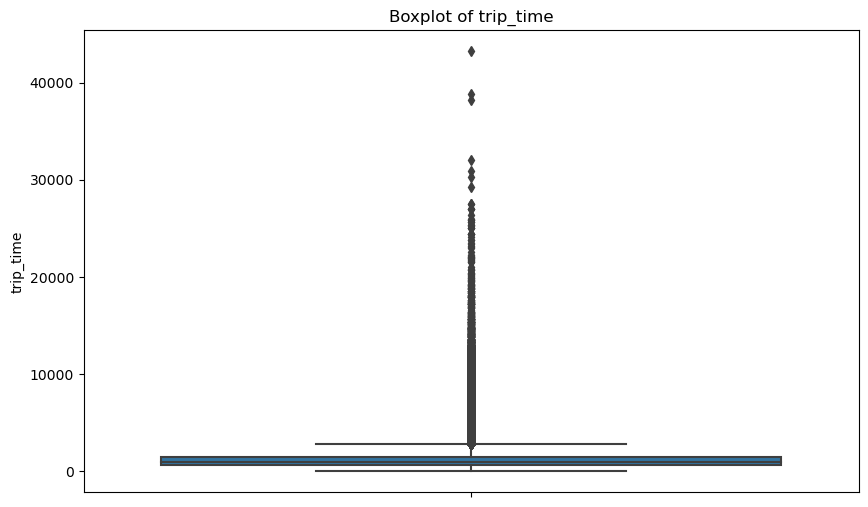

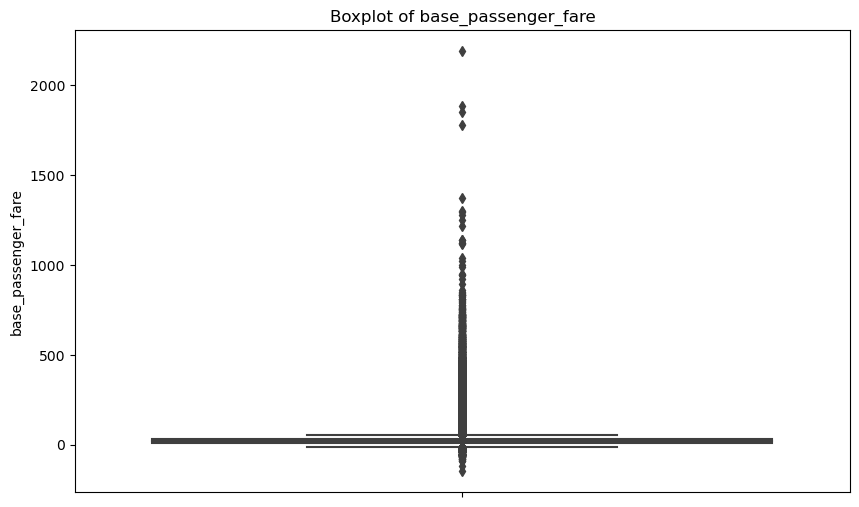

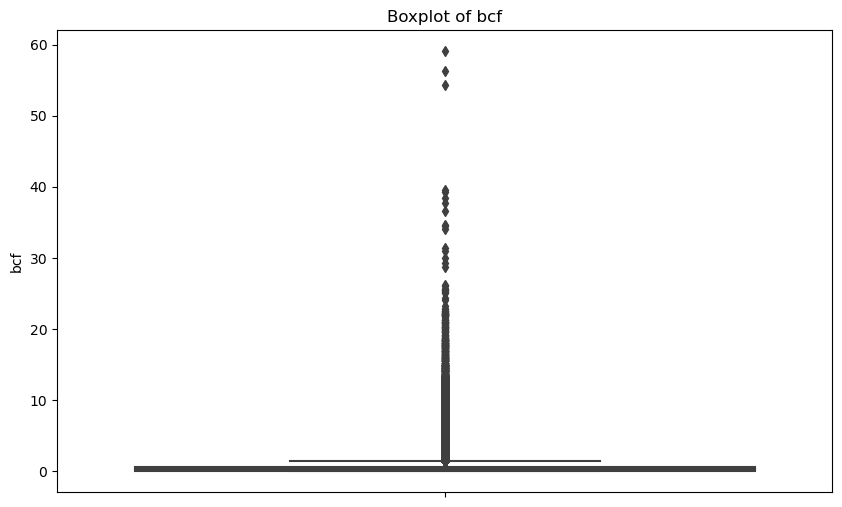

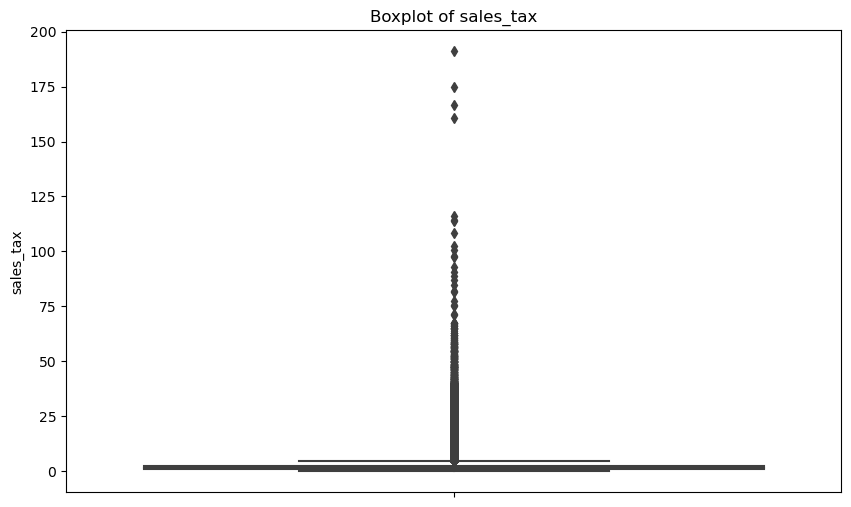

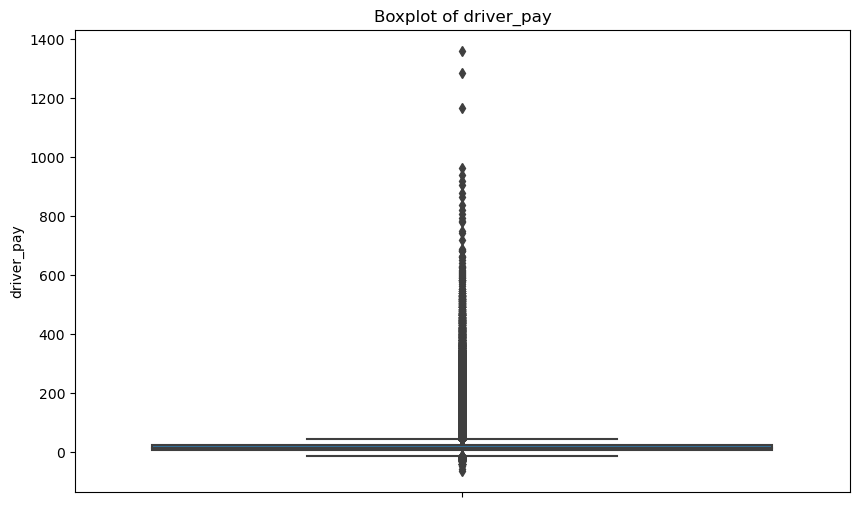

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


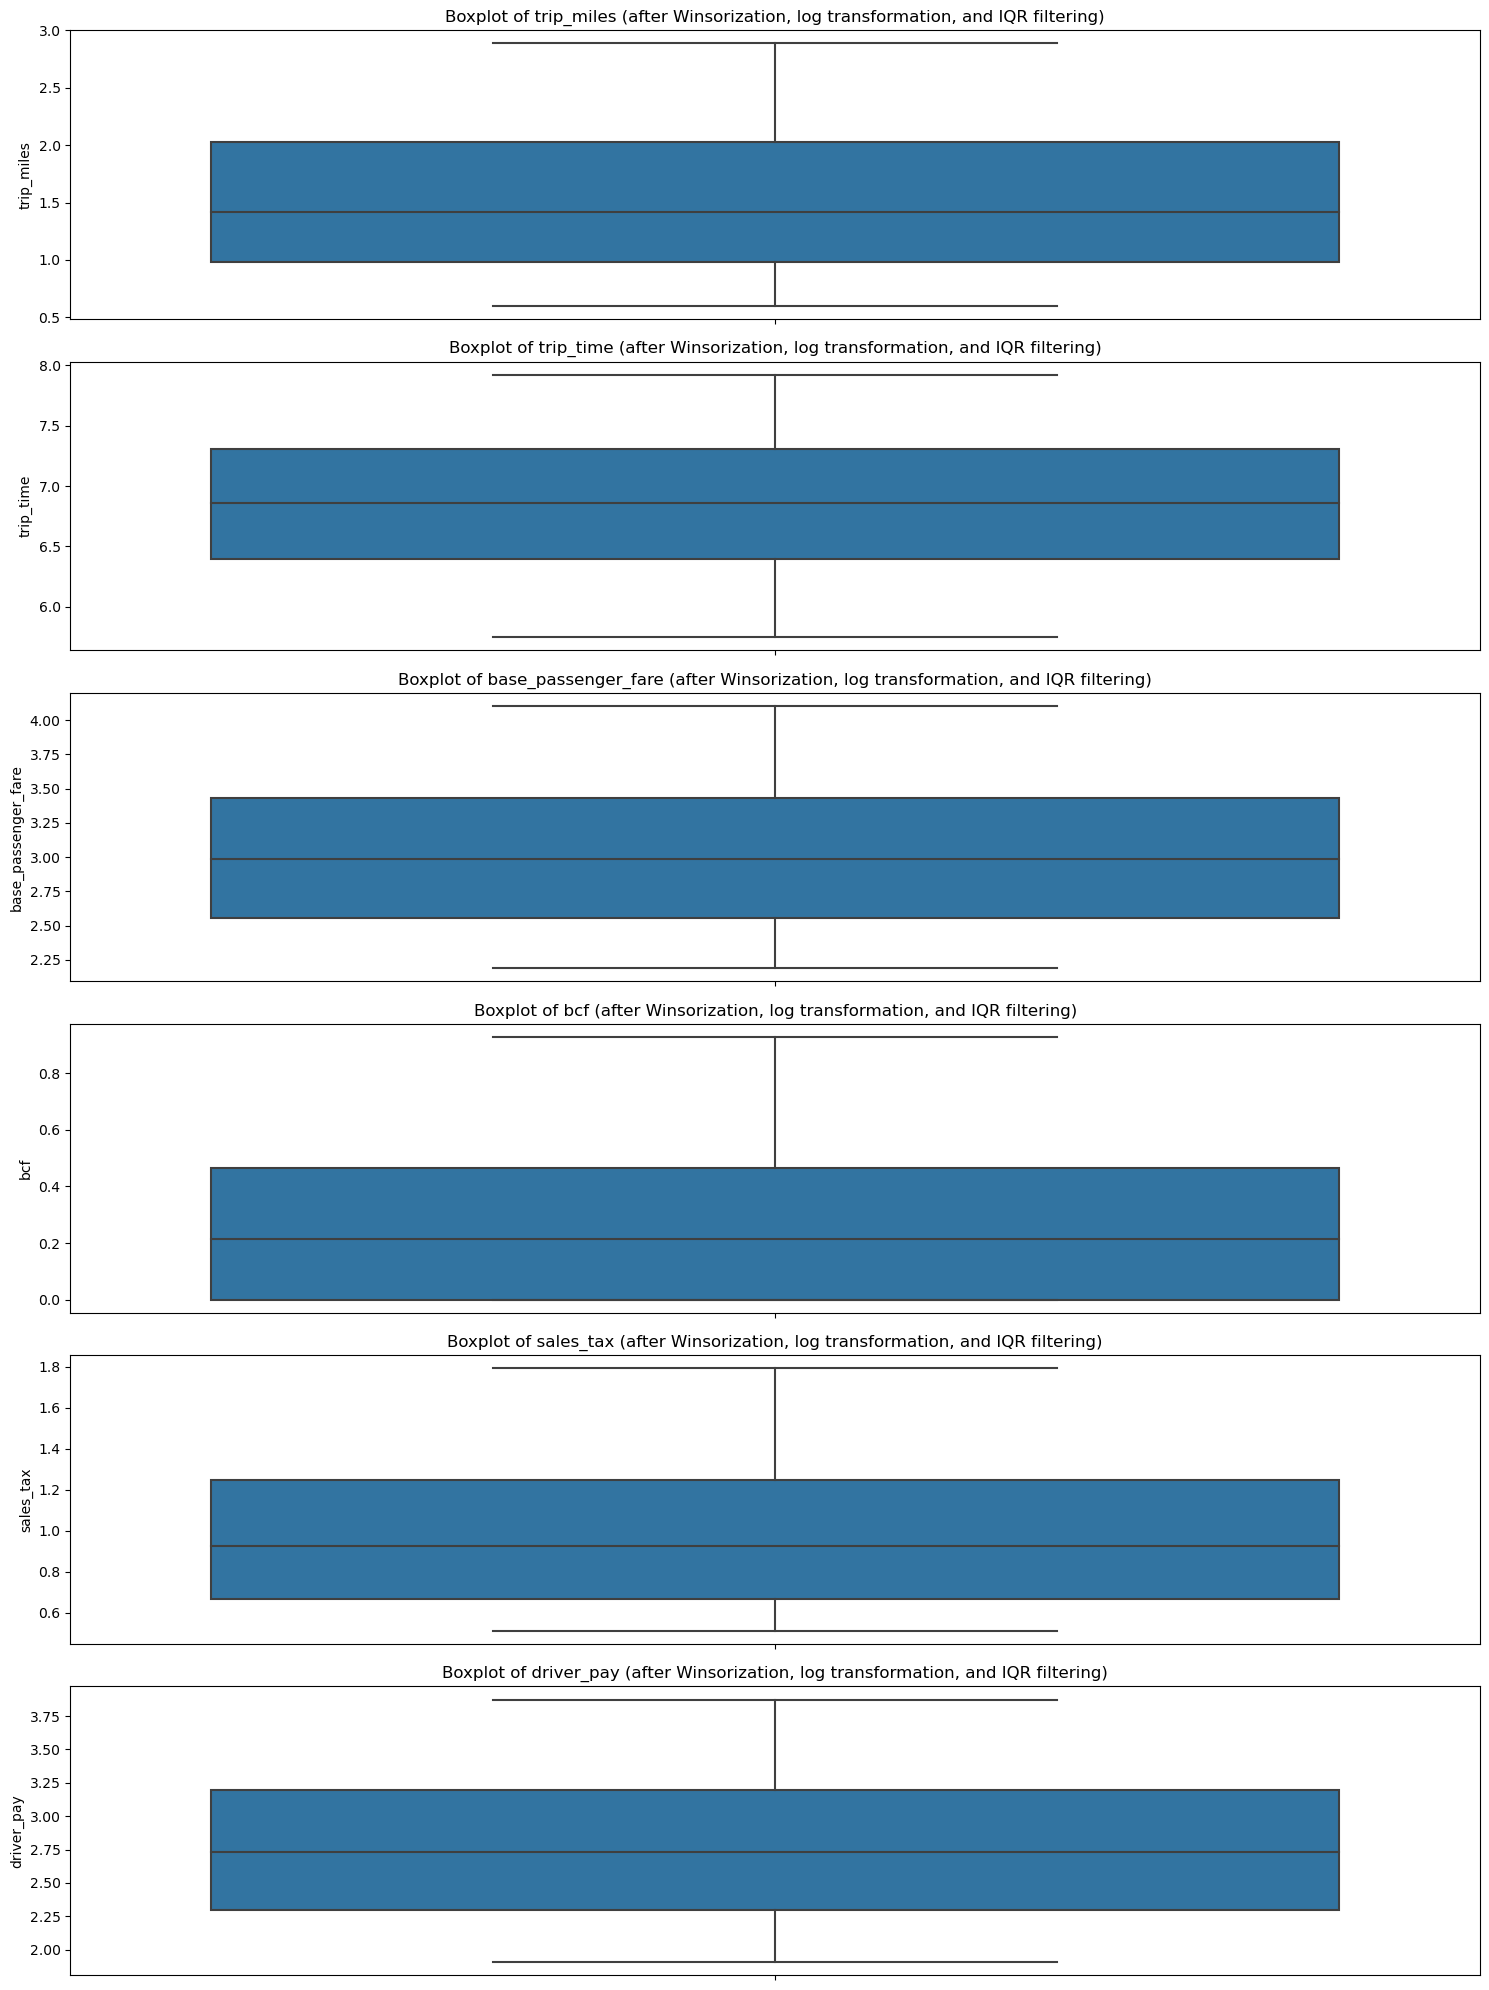

   trip_miles  estimated_emissions  emission_levels
0    1.278152           516.373490                0
1    2.150599           868.841889                0
2    1.249902           504.960301                0
3    2.323368           938.640523                0
4    1.413423           571.022904                0


/tmp/ipykernel_14909/724040039.py:137: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = aug_new.corr()


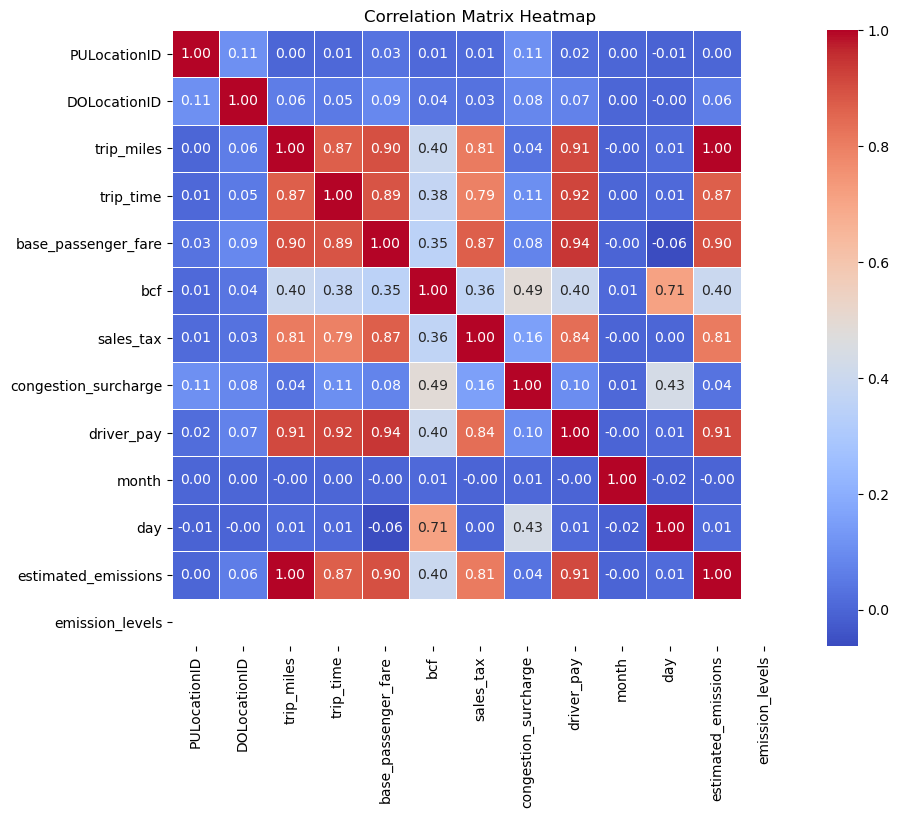

Shape of aug_df: (12499476, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:00:01   
1               B03404               B03404         00:26:27   
2               B03404               B03404         00:23:48   
3               B03404               B03404         23:57:53   
4               B03404               B03404         00:36:45   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:02:53        00:03:30         00:14:08            35   
1          00:29:37        00:31:21         01:08:01            65   
2          00:25:46        00:26:14         00:39:20           188   
3          00:01:46        00:02:24         00:23:37           237   
4          00:38:58        00:41:52         00:55:53           239   

   DOLocationID  trip_miles  trip_time  base_passenger_fare  bcf  sales_tax  \
0            61    1.278152   6.459904             2.649715  0.0   0.756122   
1   

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

aug = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-08.parquet")
aug.head()
null_counts = aug.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = aug['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)
aug_filtered = aug[~aug['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
aug_filtered = aug_filtered.drop(columns=['airport_fee'])
aug_filtered = aug_filtered.dropna(subset=['originating_base_num'])
null_counts = aug_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
aug_filtered.shape
aug_filtered.info()
aug_filtered = aug_filtered.drop(columns=['hvfhs_license_num'])
aug_filtered['date'] = aug_filtered['request_datetime'].dt.date
aug_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
aug_filtered['date'] = pd.to_datetime(aug_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
aug_filtered['request_datetime'] = pd.to_datetime(aug_filtered['request_datetime']).dt.time
aug_filtered['on_scene_datetime'] = pd.to_datetime(aug_filtered['on_scene_datetime']).dt.time
aug_filtered['pickup_datetime'] = pd.to_datetime(aug_filtered['pickup_datetime']).dt.time
aug_filtered['dropoff_datetime'] = pd.to_datetime(aug_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
aug_filtered['month'] = pd.to_datetime(aug_filtered['date']).dt.month
aug_filtered['day'] = pd.to_datetime(aug_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(aug_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(aug_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = aug_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", aug_filtered['month'].unique())

aug_filtered = aug_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = aug_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
aug_filtered = aug_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = aug_filtered[aug_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

aug_filtered = aug_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(aug_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = aug_filtered[aug_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

aug_filtered = aug_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(aug_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=aug_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
aug_new = aug_filtered.copy()

for column in columns_to_process:
    aug_new[column] = winsorize(aug_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    aug_new[column] = np.log1p(aug_new[column])

for column in columns_to_process:
    Q1 = aug_new[column].quantile(0.25)
    Q3 = aug_new[column].quantile(0.75)
    IQR = Q3 - Q1
    aug_new = aug_new[(aug_new[column] >= (Q1 - 1.5 * IQR)) & (aug_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=aug_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
aug_new['estimated_emissions'] = aug_new['trip_miles'] * emission_factor
emission_threshold = 3000
aug_new['emission_levels'] = aug_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(aug_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = aug_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = aug_new['dispatching_base_num'].value_counts()
top_10_bases = aug_new['dispatching_base_num'].value_counts().head(10).index
aug_new = aug_new[aug_new['dispatching_base_num'].isin(top_10_bases)]
aug_new.shape
aug_new.head()

# Save aug_new to a new DataFrame called aug_df
aug_df = aug_new.copy()

# Display the shape and first few rows of aug_df to verify
print("Shape of aug_df:", aug_df.shape)
print(aug_df.head())


In [4]:
aug_df.to_parquet("Users/bchheda/aug2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 155, 9, Finished, Available, Finished)

# SEP EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 157, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4885287
request_datetime              0
on_scene_datetime       4884546
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

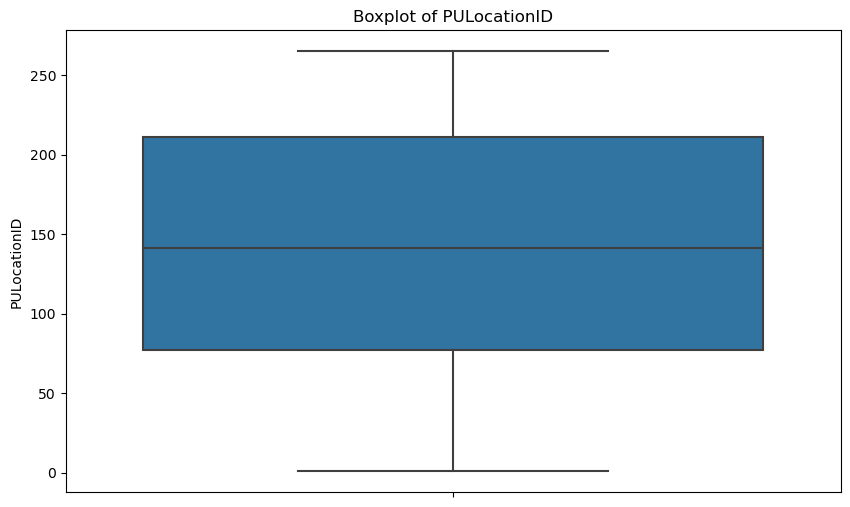

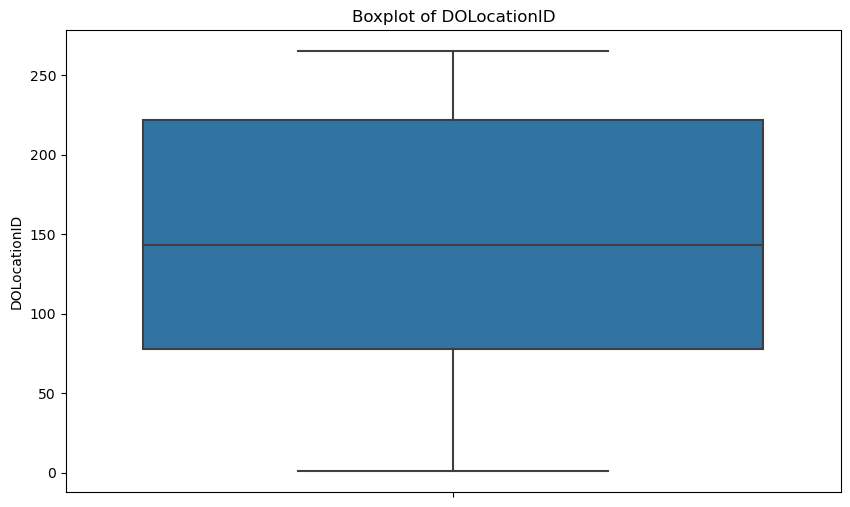

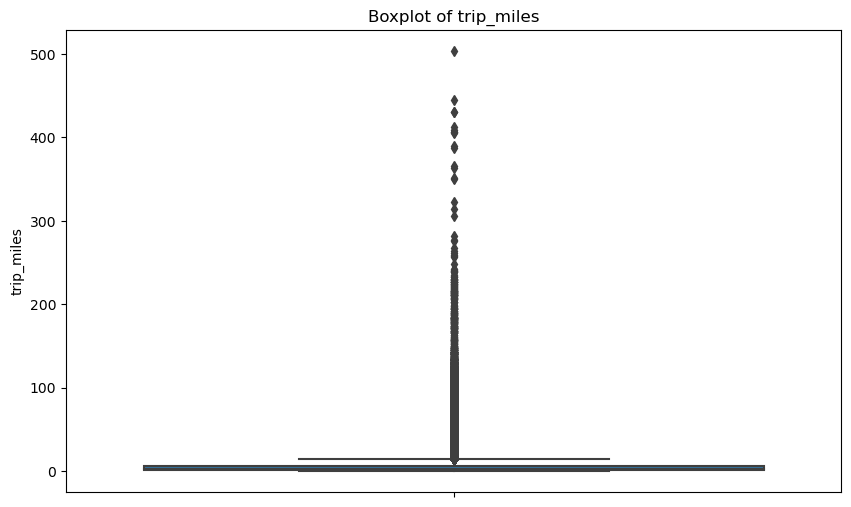

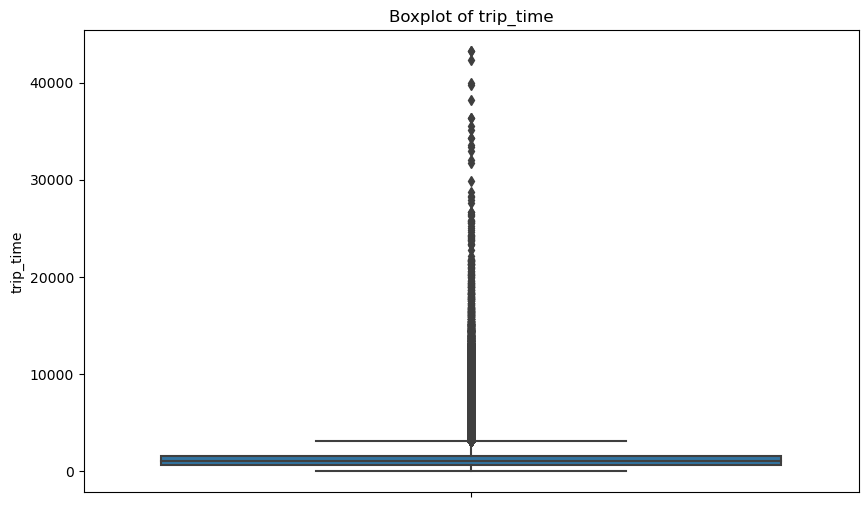

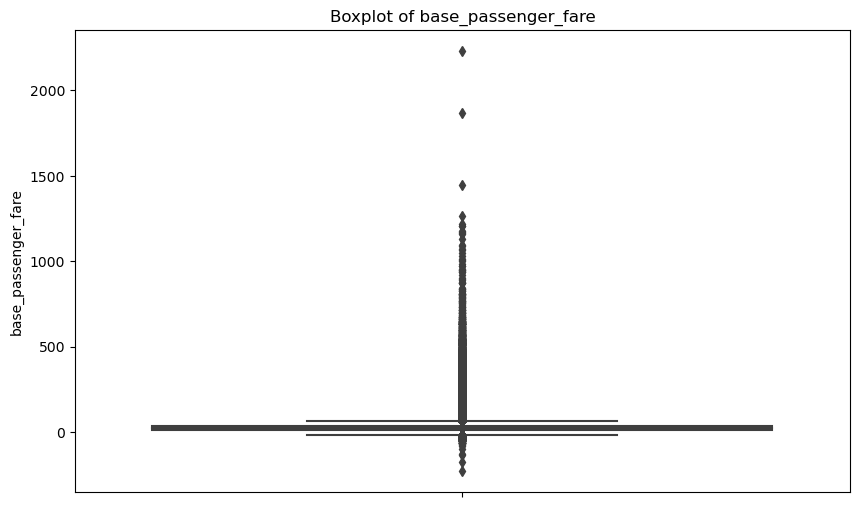

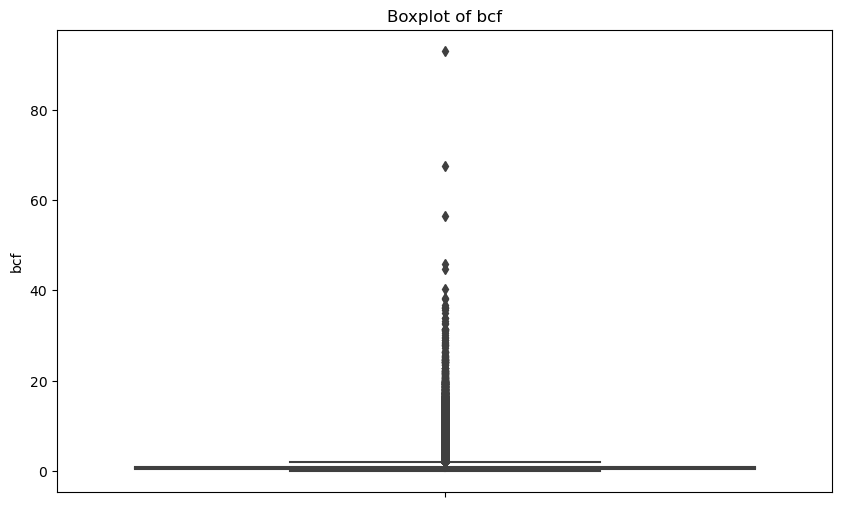

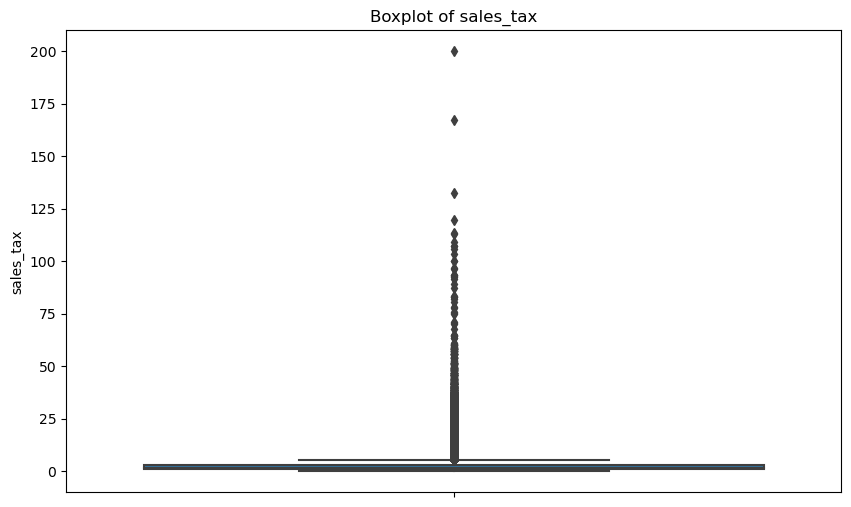

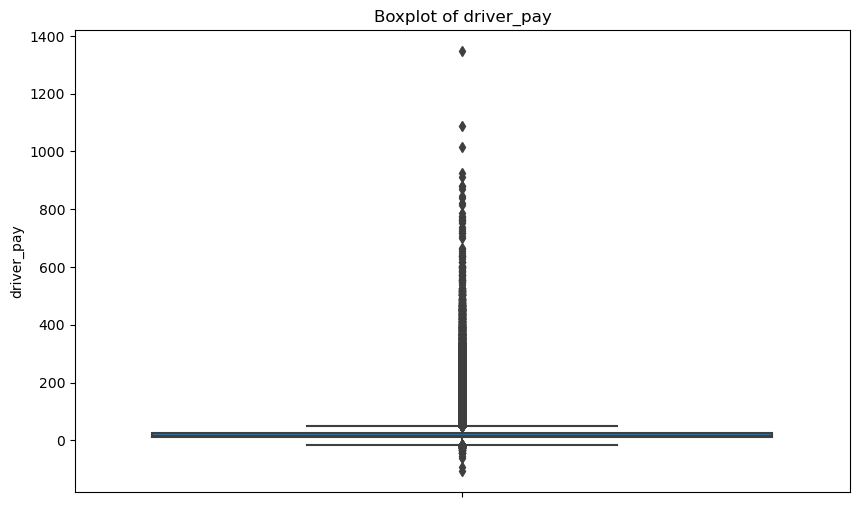

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


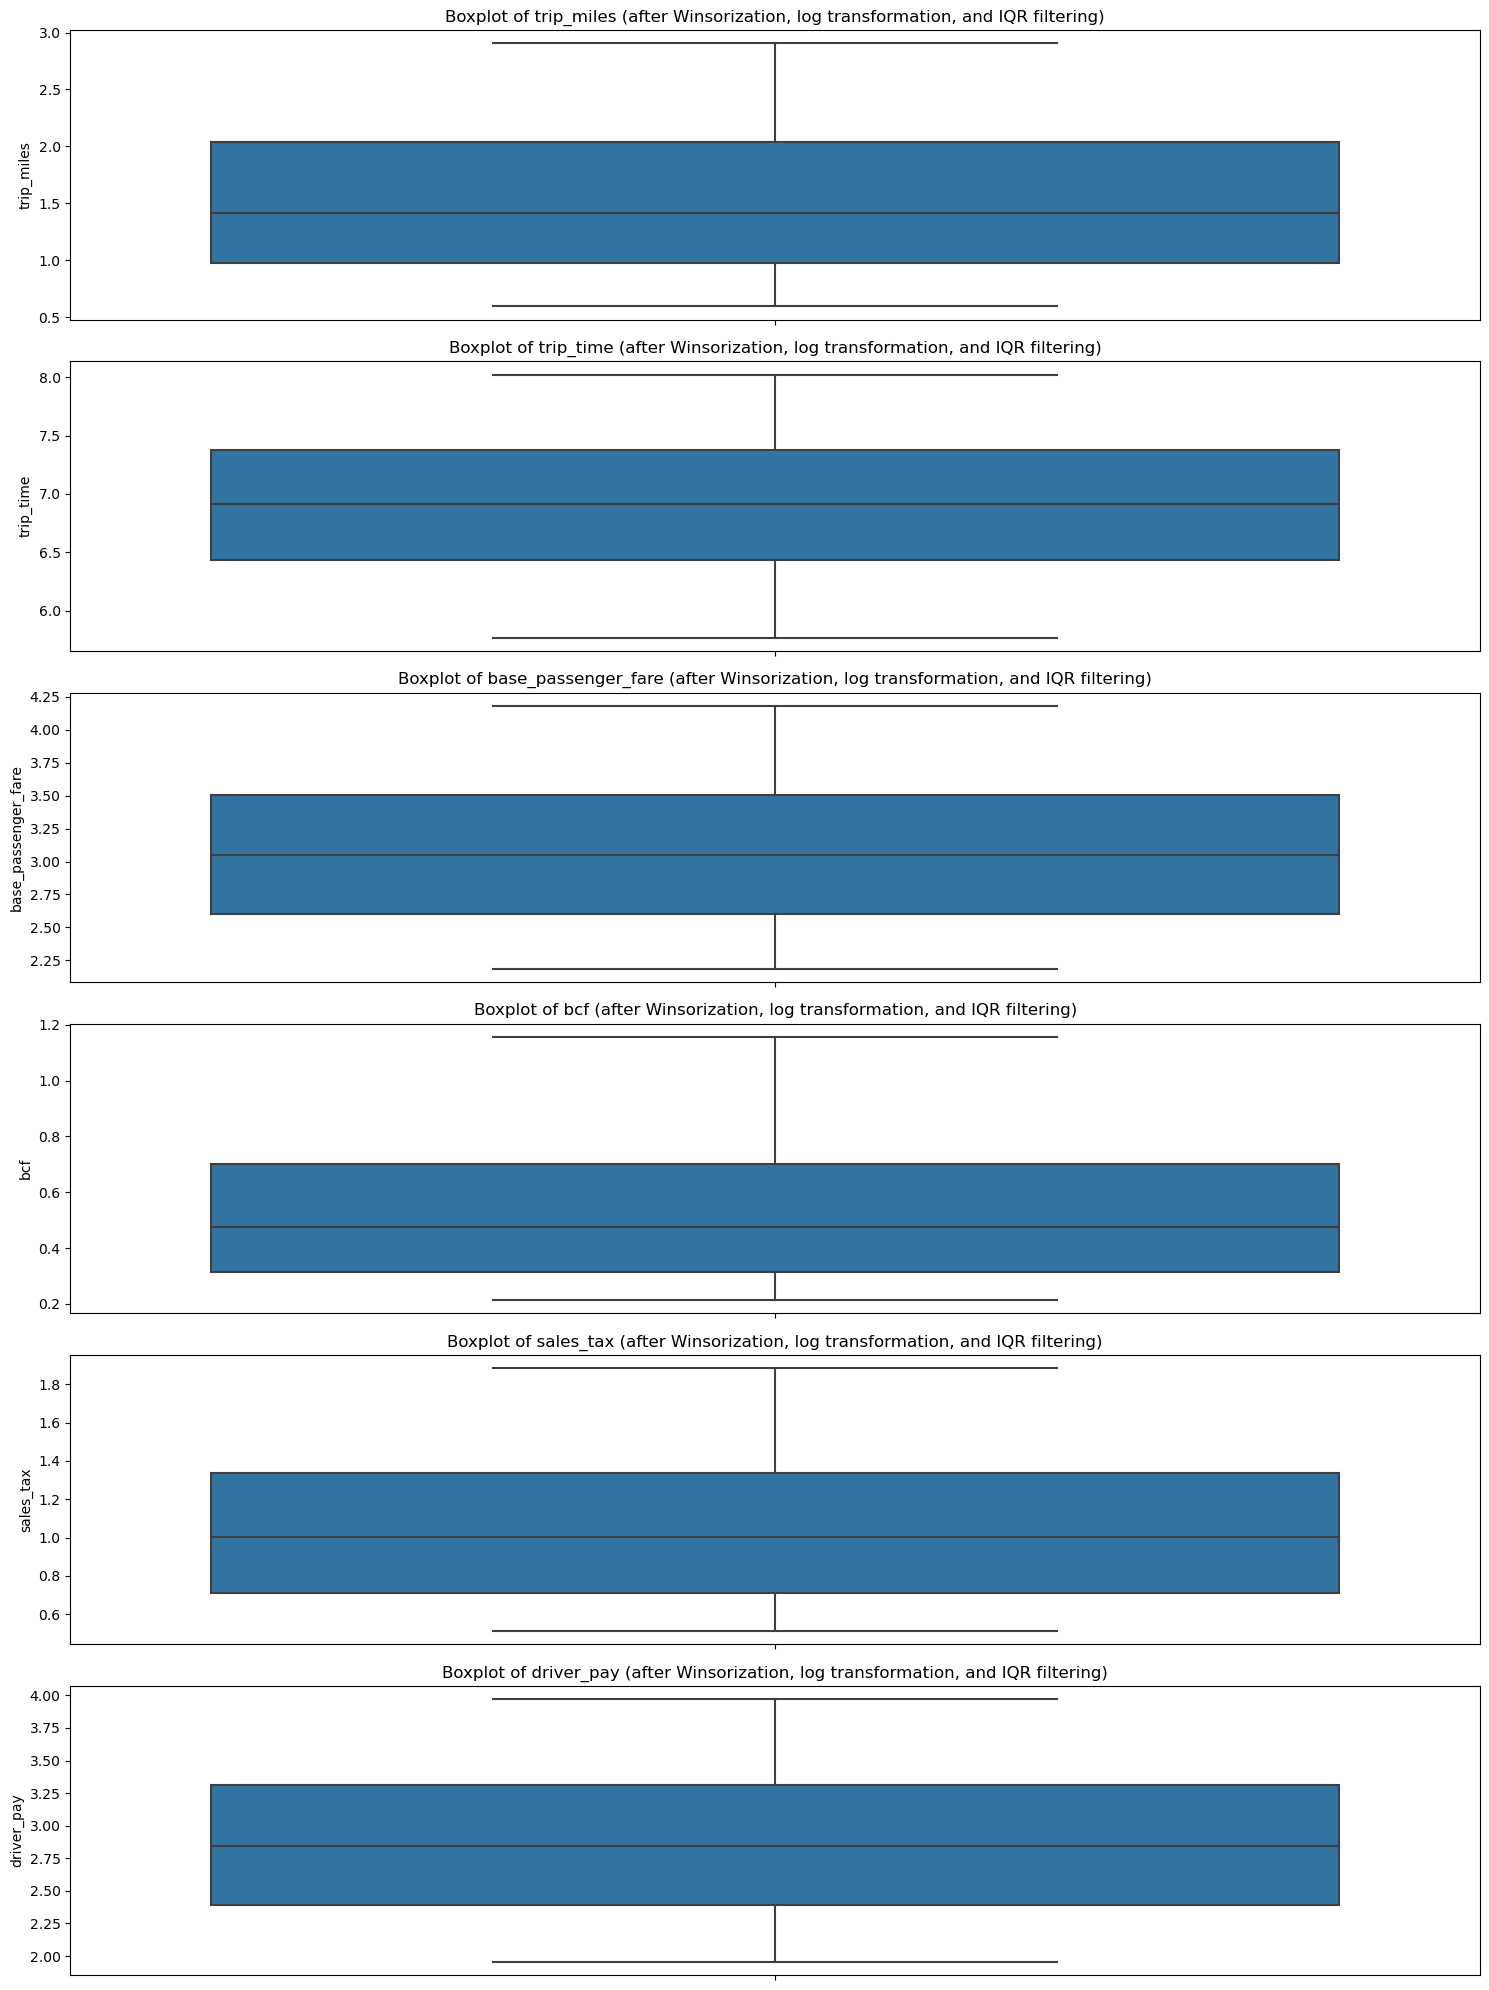

   trip_miles  estimated_emissions  emission_levels
0    2.280339           921.257152                0
1    0.593327           239.704045                0
2    1.247032           503.801047                0
3    2.463002           995.052733                0
4    0.593327           239.704045                0


/tmp/ipykernel_18897/3472567871.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sep_new.corr()


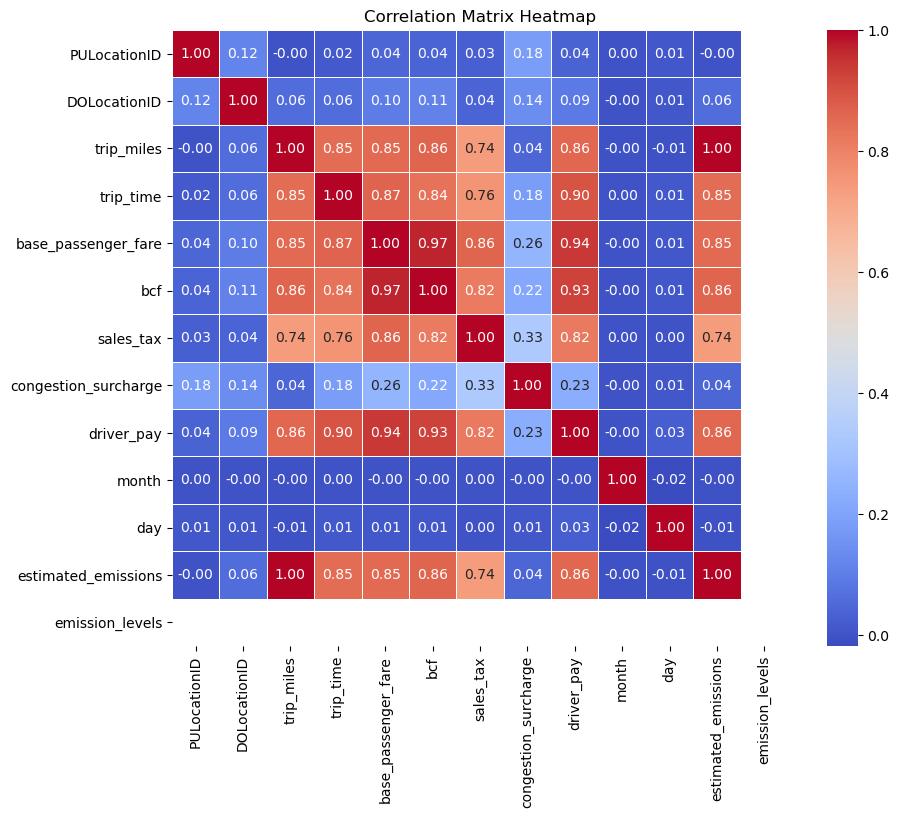

Shape of sep_df: (12900584, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         23:55:54   
1               B03404               B03404         00:01:51   
2               B03404               B03404         00:10:17   
3               B03404               B03404         00:12:20   
4               B03404               B03404         00:54:24   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:02:28        00:03:50         00:38:49           114   
1          00:04:31        00:06:31         00:11:35           208   
2          00:14:05        00:14:17         00:27:12           247   
3          00:20:14        00:20:14         00:43:33            93   
4          00:55:32        00:56:06         01:01:19           161   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           265    2.280339   7.649693             4.118387  1.156881   
1           208 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

sep = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-09.parquet")
sep.head()
null_counts = sep.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = sep['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

sep_filtered = sep[~sep['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
sep_filtered = sep_filtered.drop(columns=['airport_fee'])
sep_filtered = sep_filtered.dropna(subset=['originating_base_num'])
null_counts = sep_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
sep_filtered.shape
sep_filtered.info()
sep_filtered = sep_filtered.drop(columns=['hvfhs_license_num'])
sep_filtered['date'] = sep_filtered['request_datetime'].dt.date
sep_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
sep_filtered['date'] = pd.to_datetime(sep_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
sep_filtered['request_datetime'] = pd.to_datetime(sep_filtered['request_datetime']).dt.time
sep_filtered['on_scene_datetime'] = pd.to_datetime(sep_filtered['on_scene_datetime']).dt.time
sep_filtered['pickup_datetime'] = pd.to_datetime(sep_filtered['pickup_datetime']).dt.time
sep_filtered['dropoff_datetime'] = pd.to_datetime(sep_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
sep_filtered['month'] = pd.to_datetime(sep_filtered['date']).dt.month
sep_filtered['day'] = pd.to_datetime(sep_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(sep_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(sep_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = sep_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", sep_filtered['month'].unique())

sep_filtered = sep_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = sep_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
sep_filtered = sep_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = sep_filtered[sep_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

sep_filtered = sep_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(sep_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = sep_filtered[sep_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

sep_filtered = sep_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(sep_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=sep_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
sep_new = sep_filtered.copy()

for column in columns_to_process:
    sep_new[column] = winsorize(sep_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    sep_new[column] = np.log1p(sep_new[column])

for column in columns_to_process:
    Q1 = sep_new[column].quantile(0.25)
    Q3 = sep_new[column].quantile(0.75)
    IQR = Q3 - Q1
    sep_new = sep_new[(sep_new[column] >= (Q1 - 1.5 * IQR)) & (sep_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=sep_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
sep_new['estimated_emissions'] = sep_new['trip_miles'] * emission_factor
emission_threshold = 3000
sep_new['emission_levels'] = sep_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(sep_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = sep_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = sep_new['dispatching_base_num'].value_counts()
top_10_bases = sep_new['dispatching_base_num'].value_counts().head(10).index
sep_new = sep_new[sep_new['dispatching_base_num'].isin(top_10_bases)]
sep_new.shape
sep_new.head()

# Save sep_new to a new DataFrame called sep_df
sep_df = sep_new.copy()

# Display the shape and first few rows of sep_df to verify
print("Shape of sep_df:", sep_df.shape)
print(sep_df.head())


In [2]:
sep_df.to_parquet("Users/bchheda/sep2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 157, 7, Finished, Available, Finished)

# OCT EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 157, 8, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5196317
request_datetime              0
on_scene_datetime       5196317
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

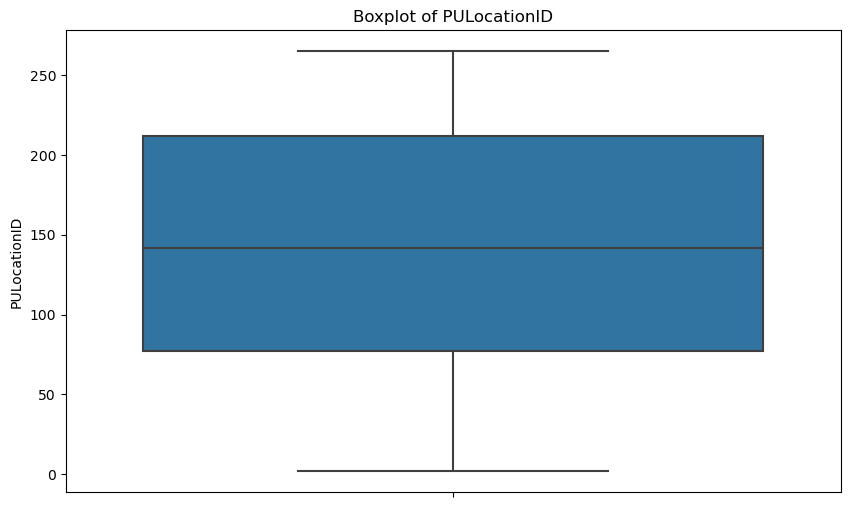

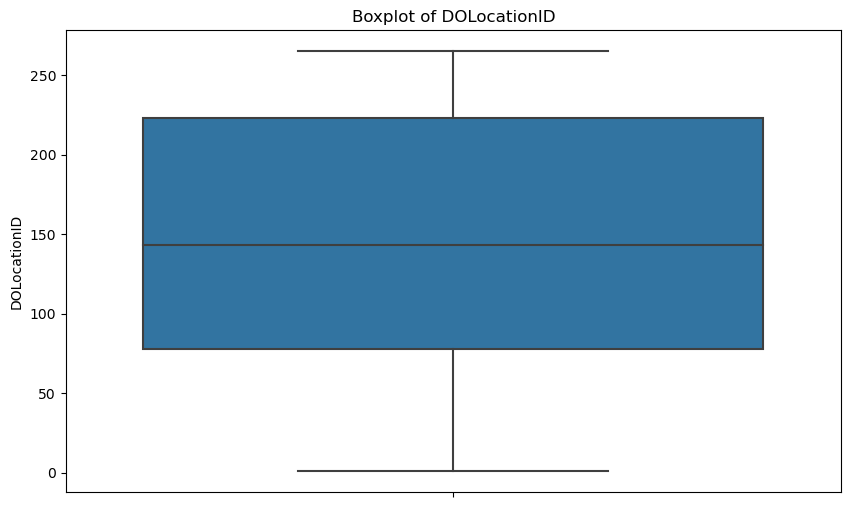

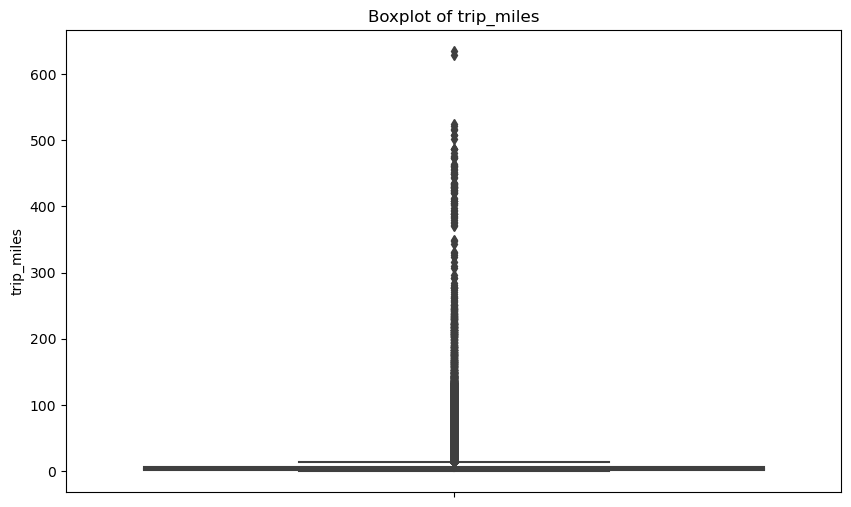

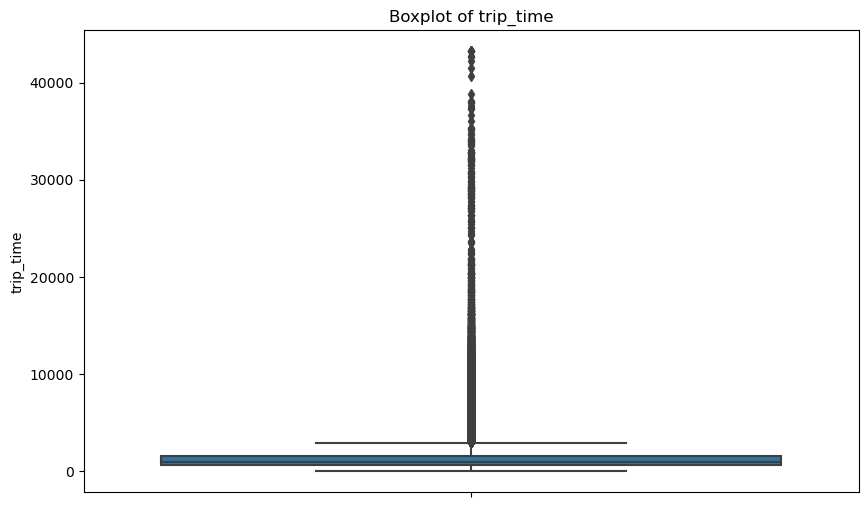

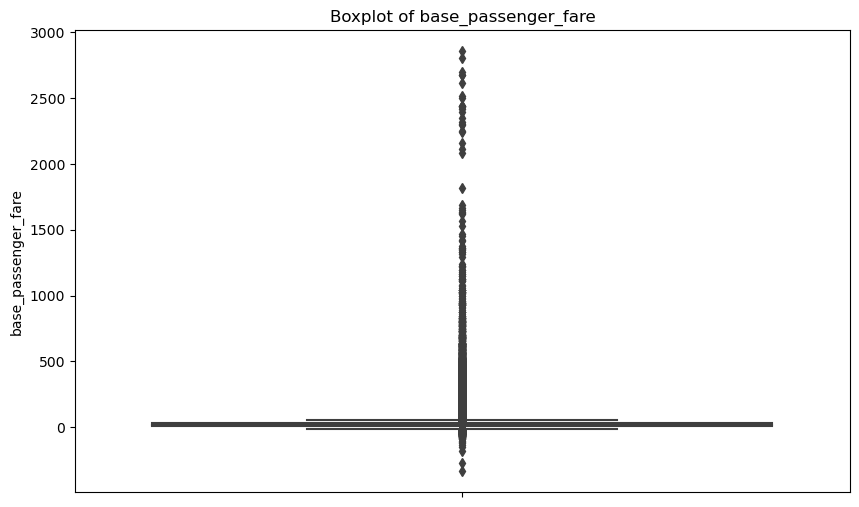

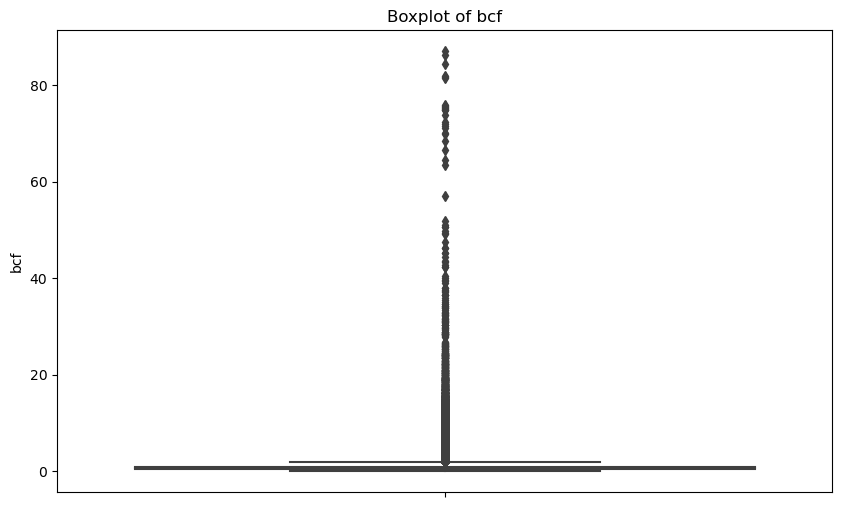

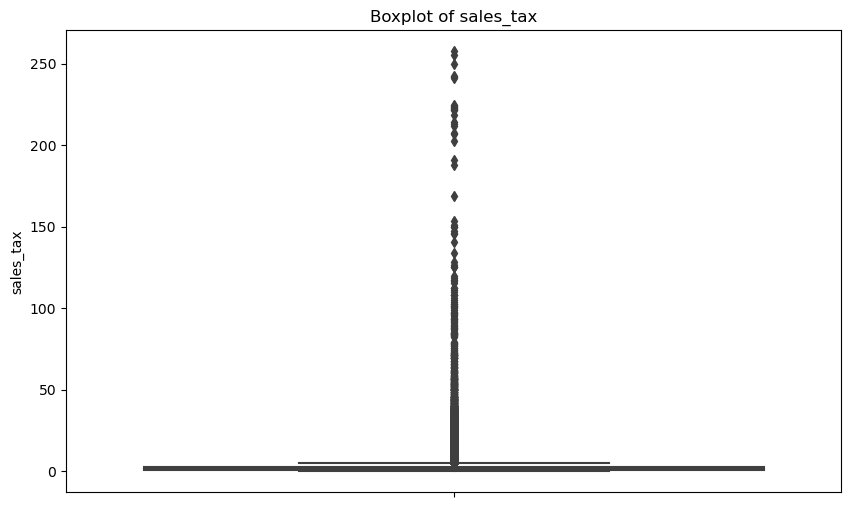

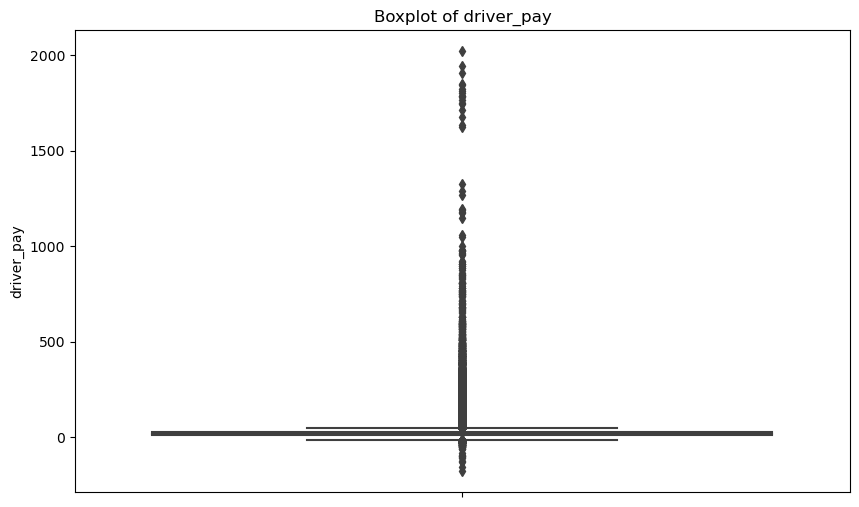

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


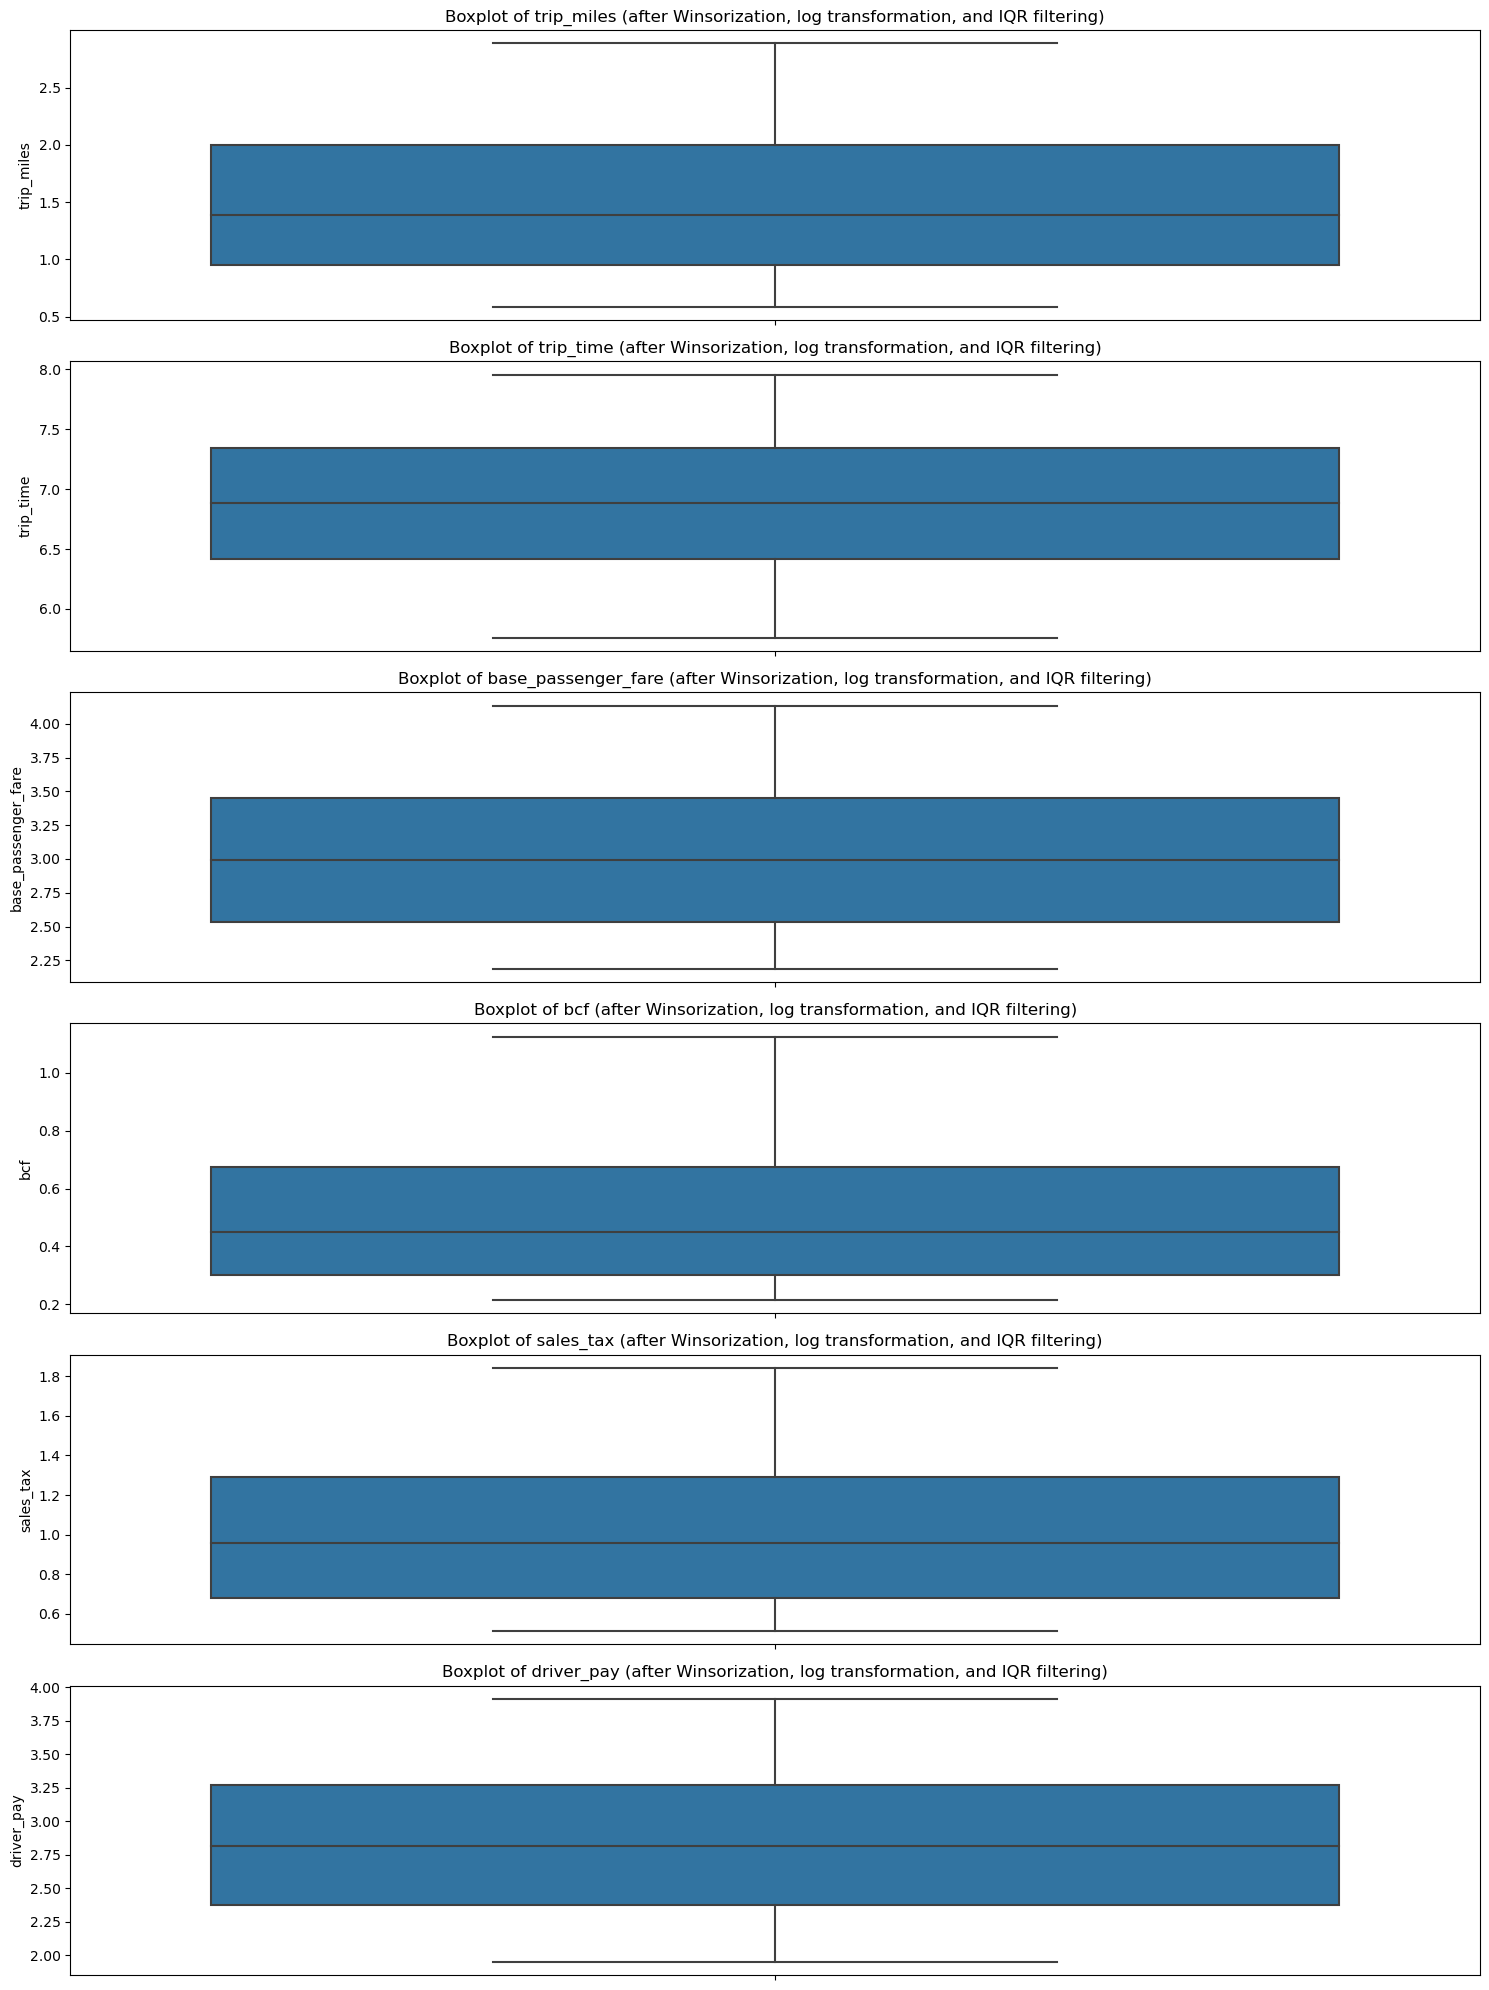

   trip_miles  estimated_emissions  emission_levels
0    1.536867           620.894357                0
1    1.202972           486.000811                0
2    1.900614           767.848005                0
3    1.953028           789.023157                0
4    0.940007           379.762932                0


/tmp/ipykernel_18897/2122804806.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = oct_new.corr()


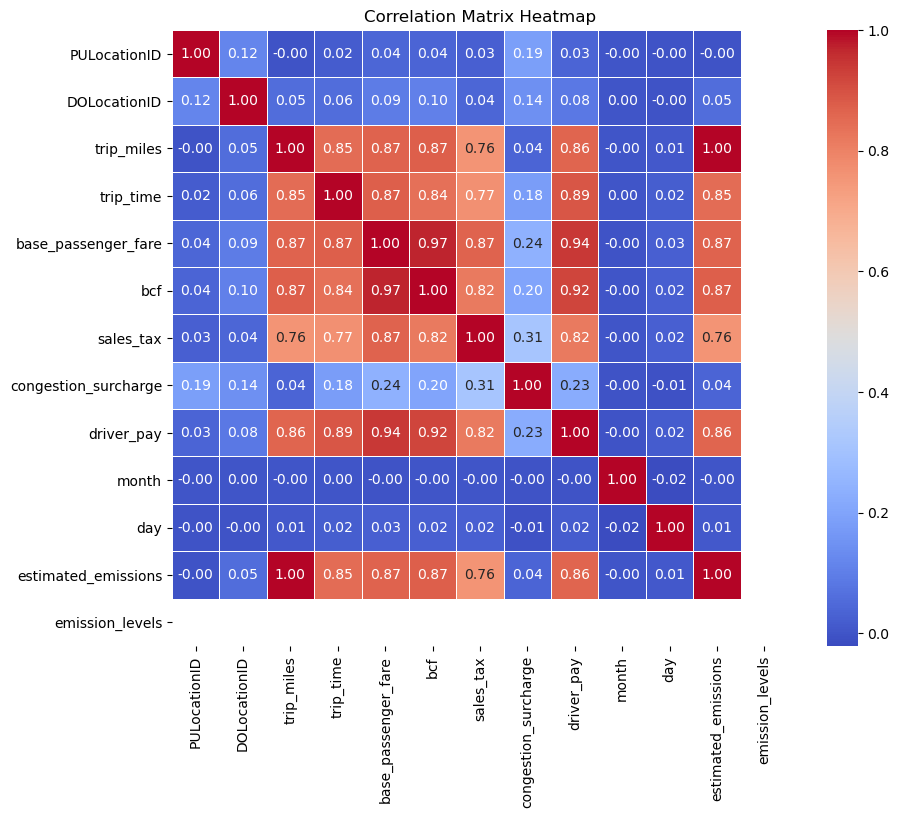

Shape of oct_df: (14101951, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:07:49   
1               B03404               B03404         00:30:24   
2               B03404               B03404         00:49:44   
3               B03404               B03404         00:47:46   
4               B03404               B03404         00:06:17   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:10:31        00:10:31         00:21:47           235   
1          00:33:54        00:35:23         00:47:21           241   
2          00:52:50        00:54:01         01:08:20           174   
3          00:48:48        00:52:08         01:14:31           211   
4          00:06:38        00:07:06         00:13:54            44   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           174    1.536867   6.517671             2.708717  0.350657   
1           254 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

oct = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-10.parquet")
oct.head()
null_counts = oct.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = oct['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

oct_filtered = oct[~oct['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
oct_filtered = oct_filtered.drop(columns=['airport_fee'])
oct_filtered = oct_filtered.dropna(subset=['originating_base_num'])
null_counts = oct_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
oct_filtered.shape
oct_filtered.info()
oct_filtered = oct_filtered.drop(columns=['hvfhs_license_num'])
oct_filtered['date'] = oct_filtered['request_datetime'].dt.date
oct_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
oct_filtered['date'] = pd.to_datetime(oct_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
oct_filtered['request_datetime'] = pd.to_datetime(oct_filtered['request_datetime']).dt.time
oct_filtered['on_scene_datetime'] = pd.to_datetime(oct_filtered['on_scene_datetime']).dt.time
oct_filtered['pickup_datetime'] = pd.to_datetime(oct_filtered['pickup_datetime']).dt.time
oct_filtered['dropoff_datetime'] = pd.to_datetime(oct_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
oct_filtered['month'] = pd.to_datetime(oct_filtered['date']).dt.month
oct_filtered['day'] = pd.to_datetime(oct_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(oct_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(oct_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = oct_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", oct_filtered['month'].unique())

oct_filtered = oct_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = oct_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
oct_filtered = oct_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = oct_filtered[oct_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

oct_filtered = oct_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(oct_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = oct_filtered[oct_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

oct_filtered = oct_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(oct_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=oct_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
oct_new = oct_filtered.copy()

for column in columns_to_process:
    oct_new[column] = winsorize(oct_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    oct_new[column] = np.log1p(oct_new[column])

for column in columns_to_process:
    Q1 = oct_new[column].quantile(0.25)
    Q3 = oct_new[column].quantile(0.75)
    IQR = Q3 - Q1
    oct_new = oct_new[(oct_new[column] >= (Q1 - 1.5 * IQR)) & (oct_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=oct_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
oct_new['estimated_emissions'] = oct_new['trip_miles'] * emission_factor
emission_threshold = 3000
oct_new['emission_levels'] = oct_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(oct_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = oct_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = oct_new['dispatching_base_num'].value_counts()
top_10_bases = oct_new['dispatching_base_num'].value_counts().head(10).index
oct_new = oct_new[oct_new['dispatching_base_num'].isin(top_10_bases)]
oct_new.shape
oct_new.head()

# Save oct_new to a new DataFrame called oct_df
oct_df = oct_new.copy()

# Display the shape and first few rows of oct_df to verify
print("Shape of oct_df:", oct_df.shape)
print(oct_df.head())


In [4]:
oct_df.to_parquet("Users/bchheda/oct2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 157, 9, Finished, Available, Finished)

# Nov EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 160, 6, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5111093
request_datetime              0
on_scene_datetime       5111094
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

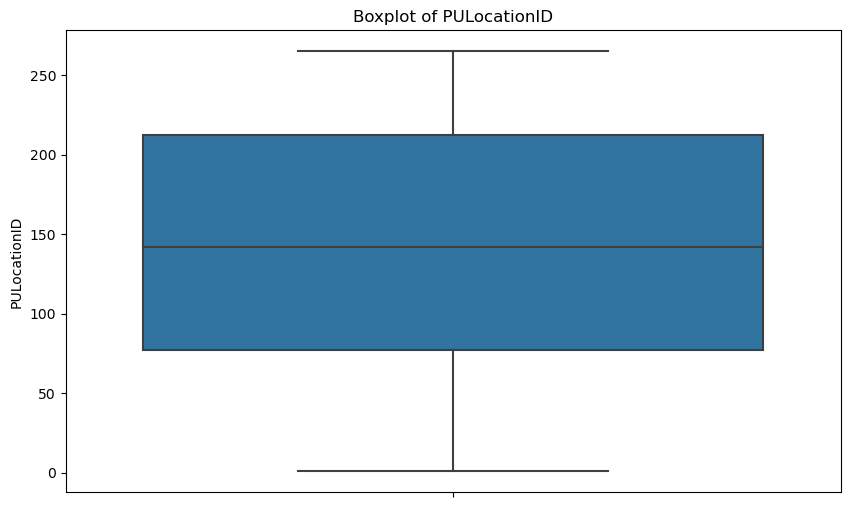

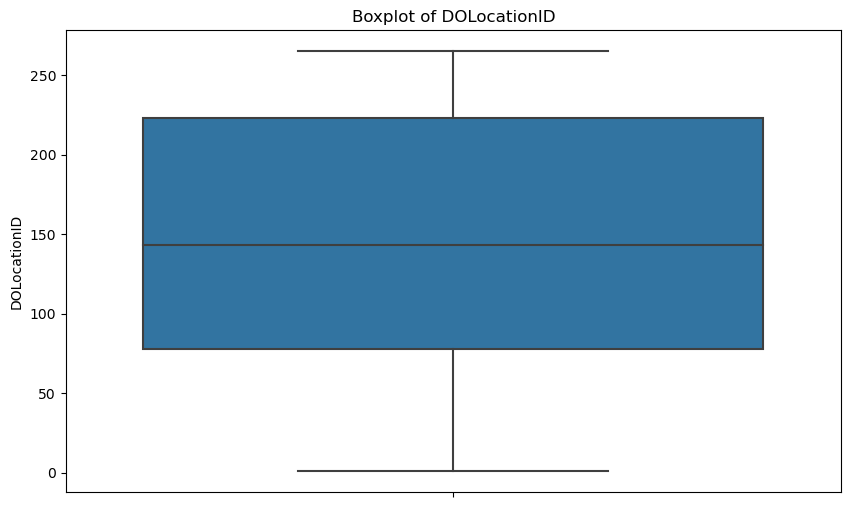

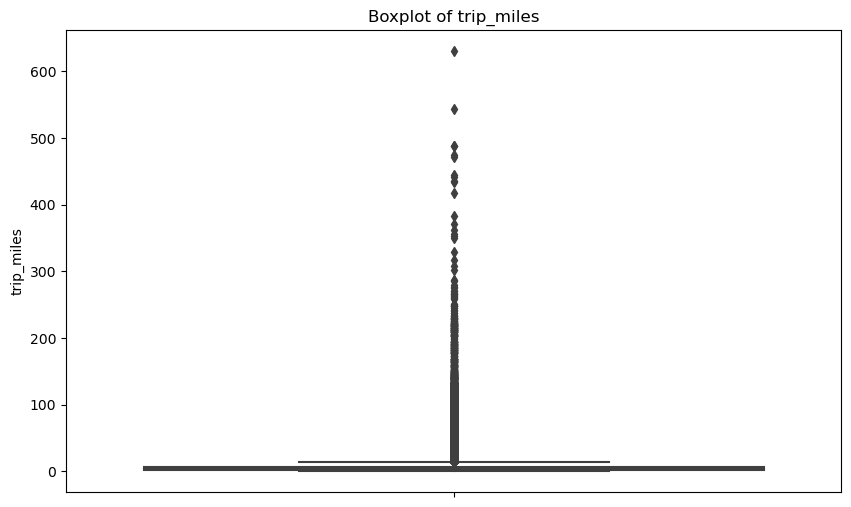

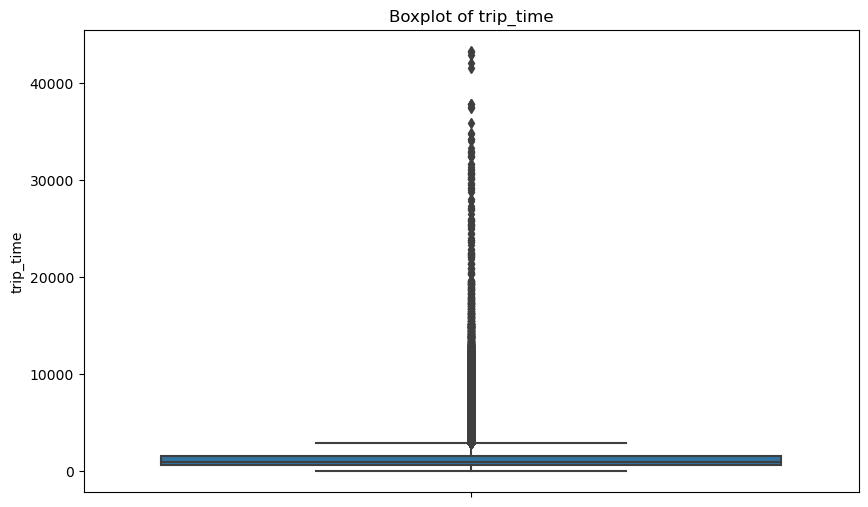

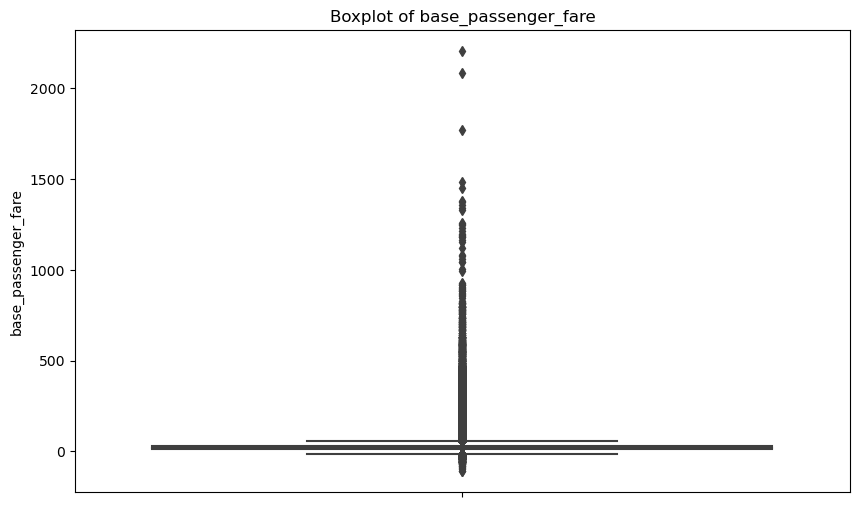

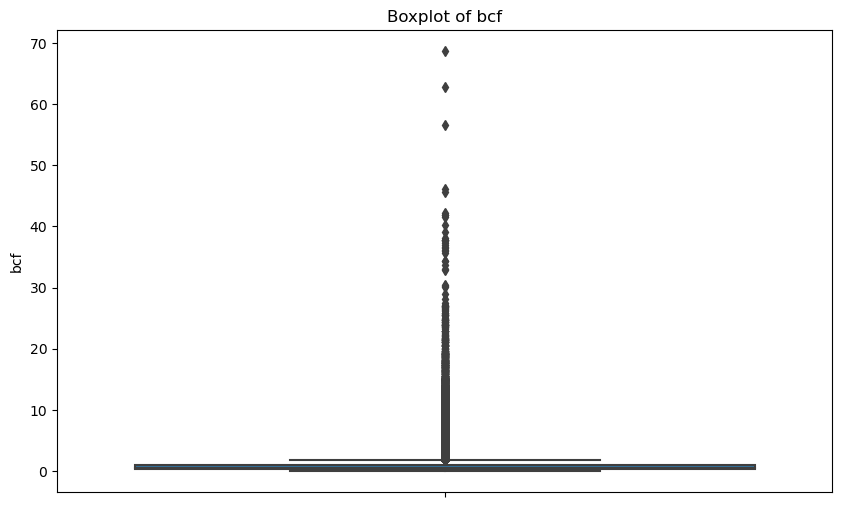

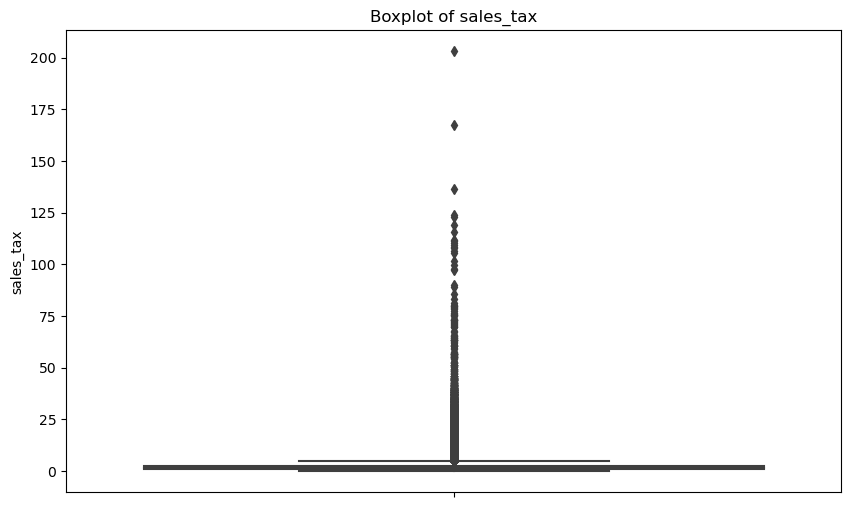

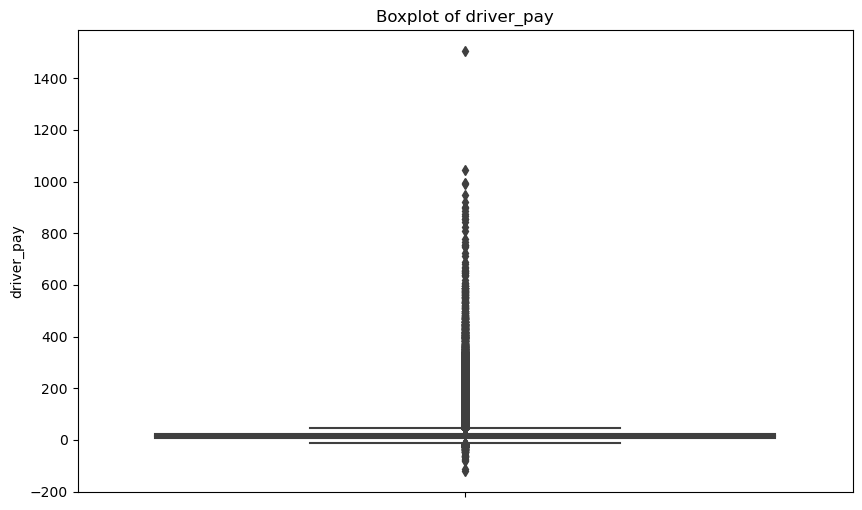

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


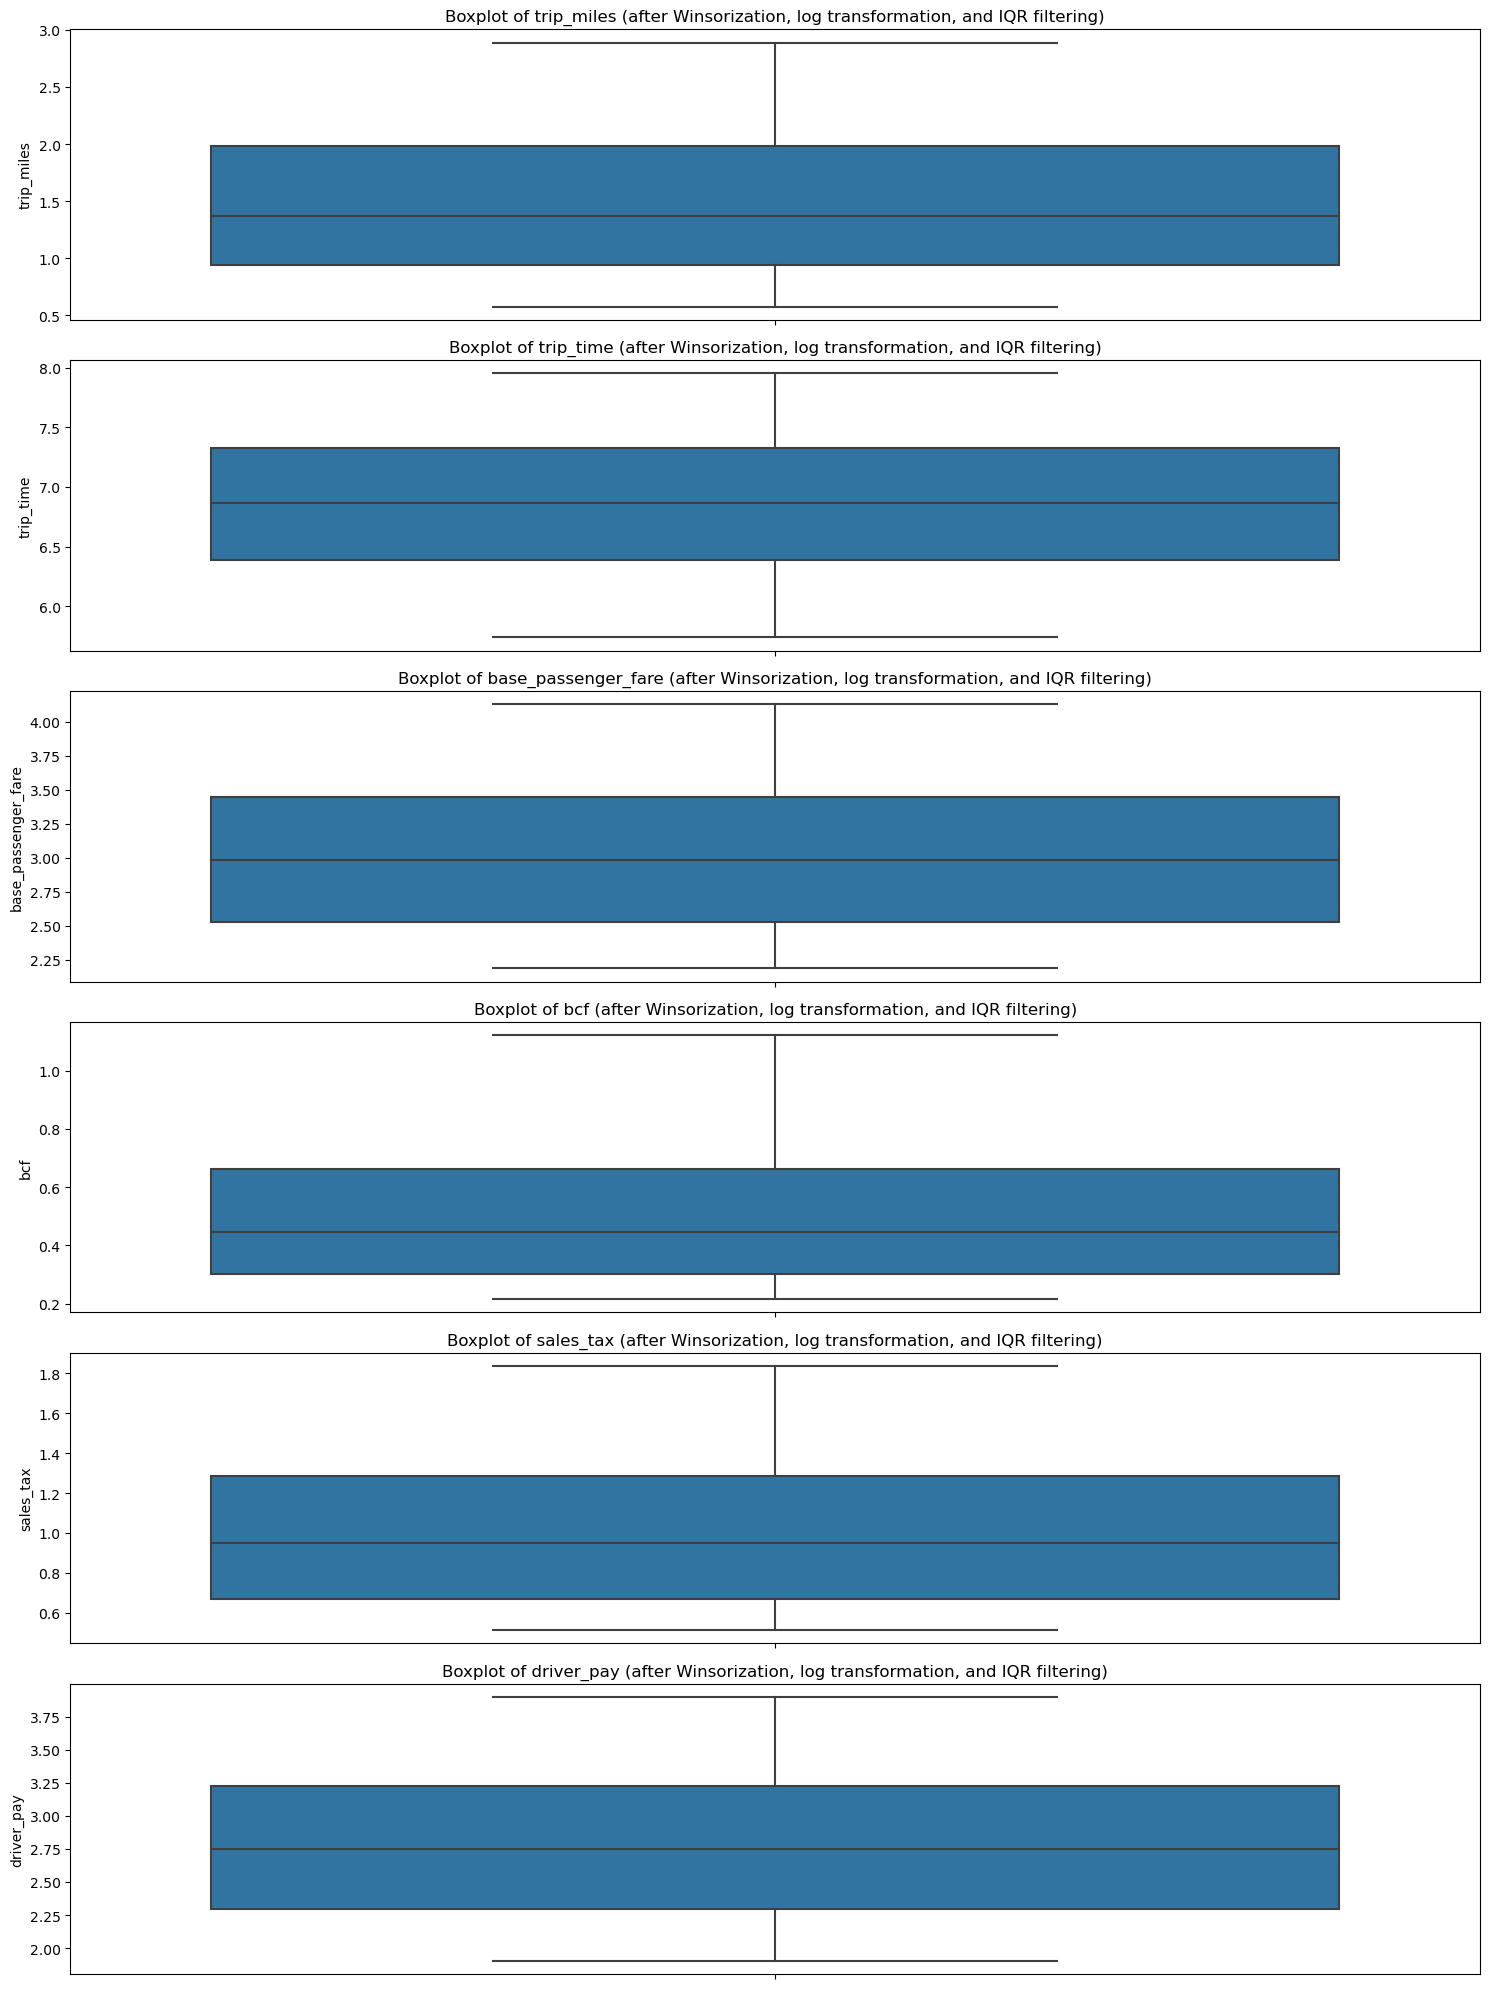

   trip_miles  estimated_emissions  emission_levels
0    0.712950           288.031722                0
1    1.121678           453.157735                0
2    2.226783           899.620485                0
3    1.795087           725.215253                0
9    1.971299           796.404951                0


/tmp/ipykernel_23588/3131211106.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nov_new.corr()


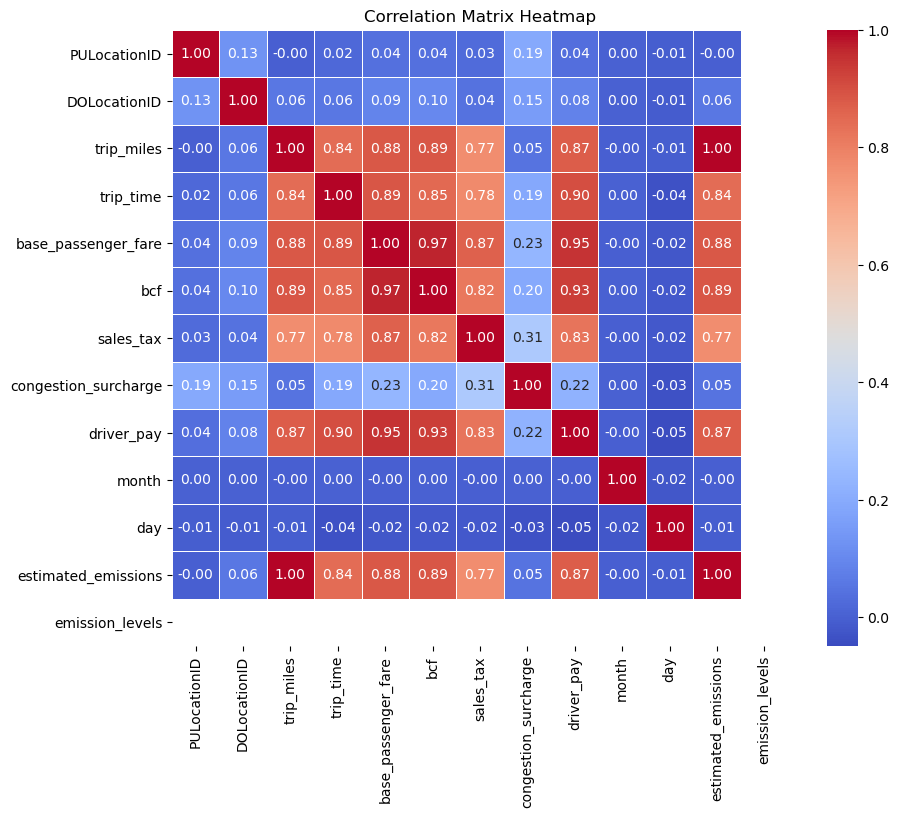

Shape of nov_df: (12967370, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         00:04:09   
1               B03404               B03404         00:42:26   
2               B03404               B03404         00:11:53   
3               B03404               B03404         00:45:30   
9               B03404               B03404         23:53:25   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:10:11        00:10:31         00:17:28            61   
1          00:45:33        00:46:33         00:58:18           209   
2          00:17:15        00:19:16         00:46:19           181   
3          00:49:39        00:50:18         01:08:10           107   
9          00:00:55        00:01:23         00:24:15            79   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            61    0.712950   6.035481             2.187174  0.215111   
1            79 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

nov = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-11.parquet")
nov.head()
null_counts = nov.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = nov['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

nov_filtered = nov[~nov['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
nov_filtered = nov_filtered.drop(columns=['airport_fee'])
nov_filtered = nov_filtered.dropna(subset=['originating_base_num'])
null_counts = nov_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
nov_filtered.shape
nov_filtered.info()
nov_filtered = nov_filtered.drop(columns=['hvfhs_license_num'])
nov_filtered['date'] = nov_filtered['request_datetime'].dt.date
nov_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
nov_filtered['date'] = pd.to_datetime(nov_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
nov_filtered['request_datetime'] = pd.to_datetime(nov_filtered['request_datetime']).dt.time
nov_filtered['on_scene_datetime'] = pd.to_datetime(nov_filtered['on_scene_datetime']).dt.time
nov_filtered['pickup_datetime'] = pd.to_datetime(nov_filtered['pickup_datetime']).dt.time
nov_filtered['dropoff_datetime'] = pd.to_datetime(nov_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
nov_filtered['month'] = pd.to_datetime(nov_filtered['date']).dt.month
nov_filtered['day'] = pd.to_datetime(nov_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(nov_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(nov_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = nov_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", nov_filtered['month'].unique())

nov_filtered = nov_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = nov_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
nov_filtered = nov_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = nov_filtered[nov_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

nov_filtered = nov_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(nov_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = nov_filtered[nov_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

nov_filtered = nov_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(nov_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=nov_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
nov_new = nov_filtered.copy()

for column in columns_to_process:
    nov_new[column] = winsorize(nov_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    nov_new[column] = np.log1p(nov_new[column])

for column in columns_to_process:
    Q1 = nov_new[column].quantile(0.25)
    Q3 = nov_new[column].quantile(0.75)
    IQR = Q3 - Q1
    nov_new = nov_new[(nov_new[column] >= (Q1 - 1.5 * IQR)) & (nov_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=nov_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
nov_new['estimated_emissions'] = nov_new['trip_miles'] * emission_factor
emission_threshold = 3000
nov_new['emission_levels'] = nov_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(nov_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = nov_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = nov_new['dispatching_base_num'].value_counts()
top_10_bases = nov_new['dispatching_base_num'].value_counts().head(10).index
nov_new = nov_new[nov_new['dispatching_base_num'].isin(top_10_bases)]
nov_new.shape
nov_new.head()

# Save nov_new to a new DataFrame called nov_df
nov_df = nov_new.copy()

# Display the shape and first few rows of nov_df to verify
print("Shape of nov_df:", nov_df.shape)
print(nov_df.head())


In [8]:
nov_df.to_parquet("Users/bchheda/nov2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 160, 7, Finished, Available, Finished)

# Dec EDA

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 160, 8, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5650590
request_datetime              0
on_scene_datetime       5650590
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64
Unique values in 'hvfhs_license_num':
['HV0005' 'HV0003']
Null values in each column:
hvfhs_license_num       0
dispatching_base_num    0
originating_base_num    0
request_datetime        0
o

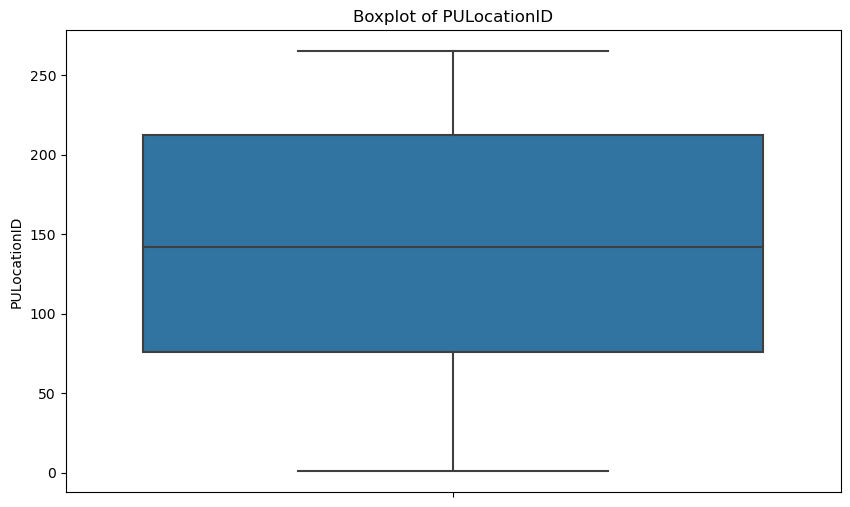

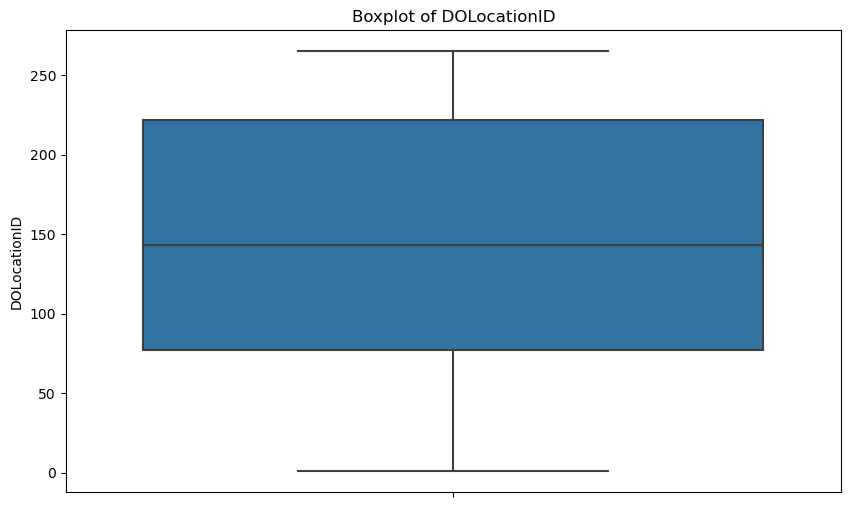

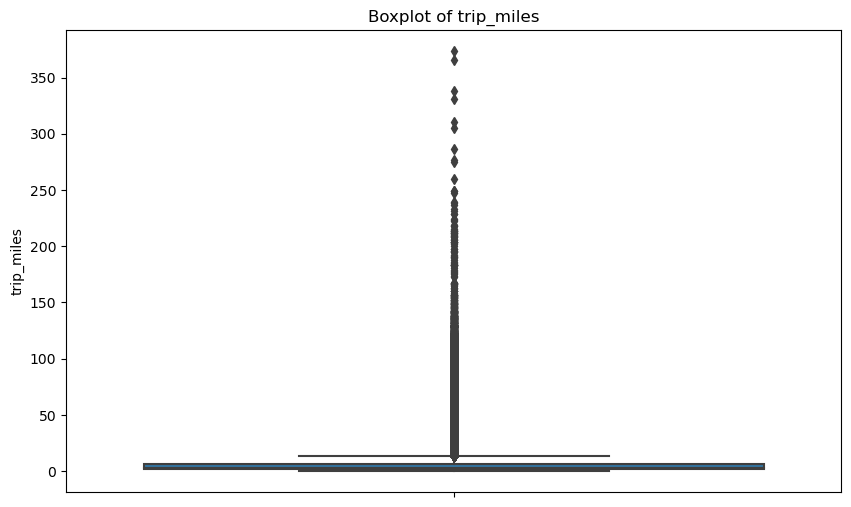

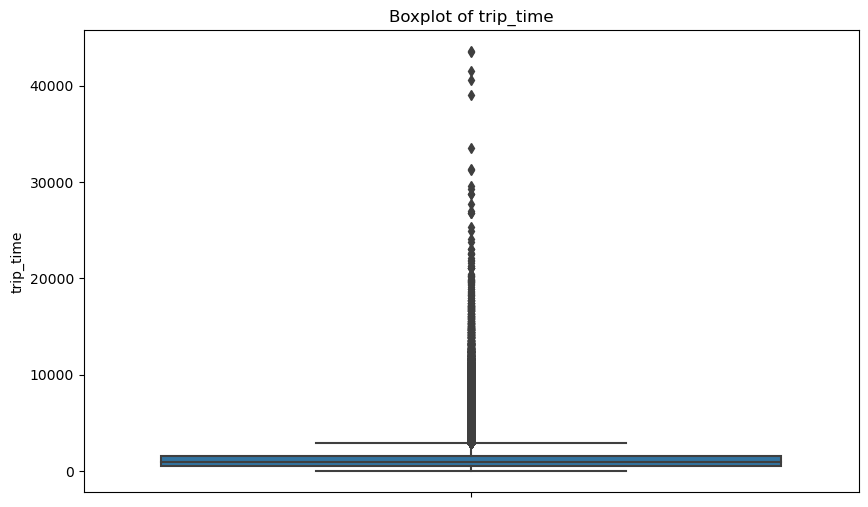

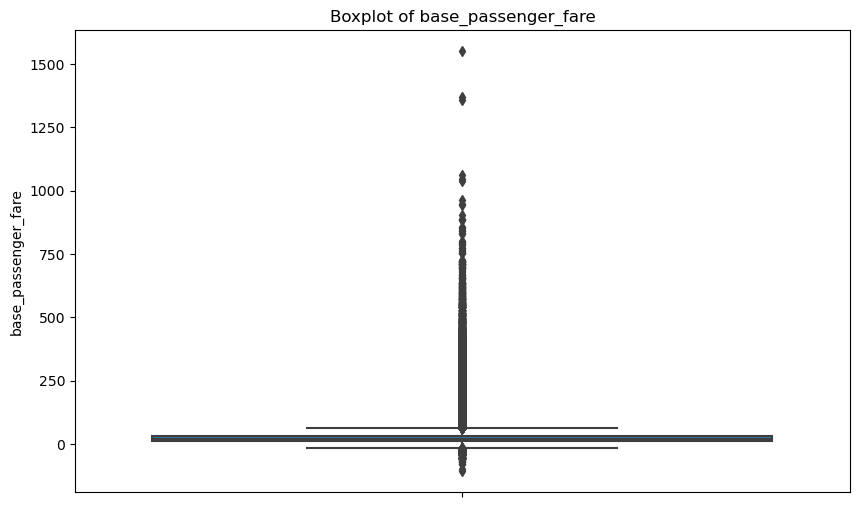

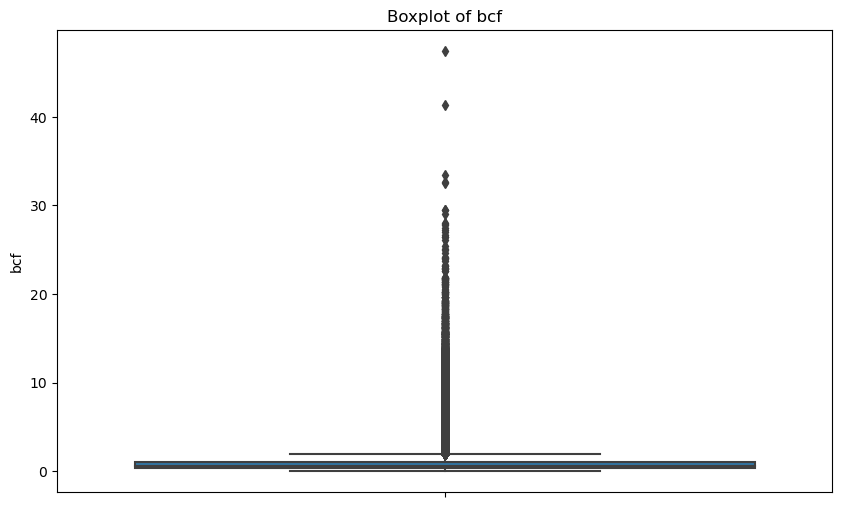

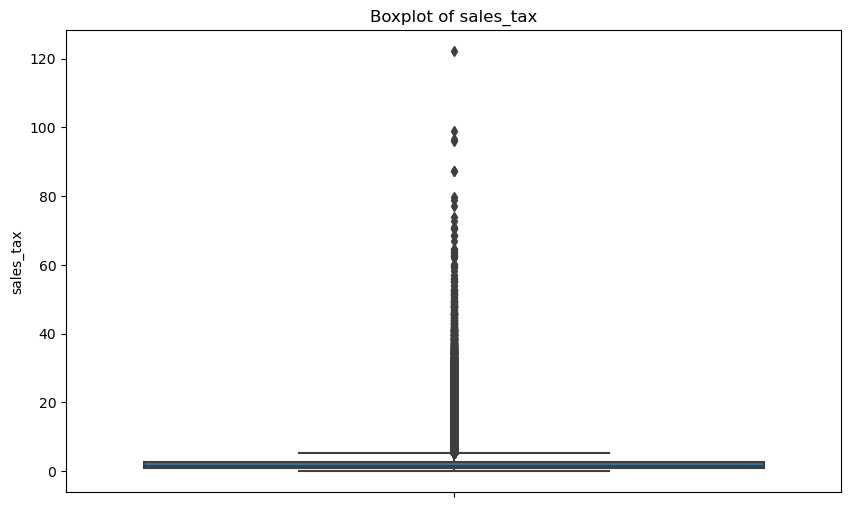

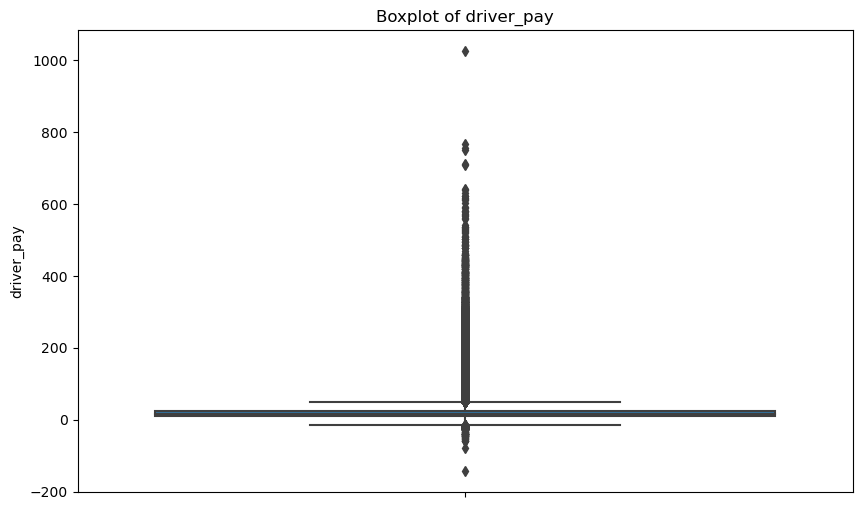

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


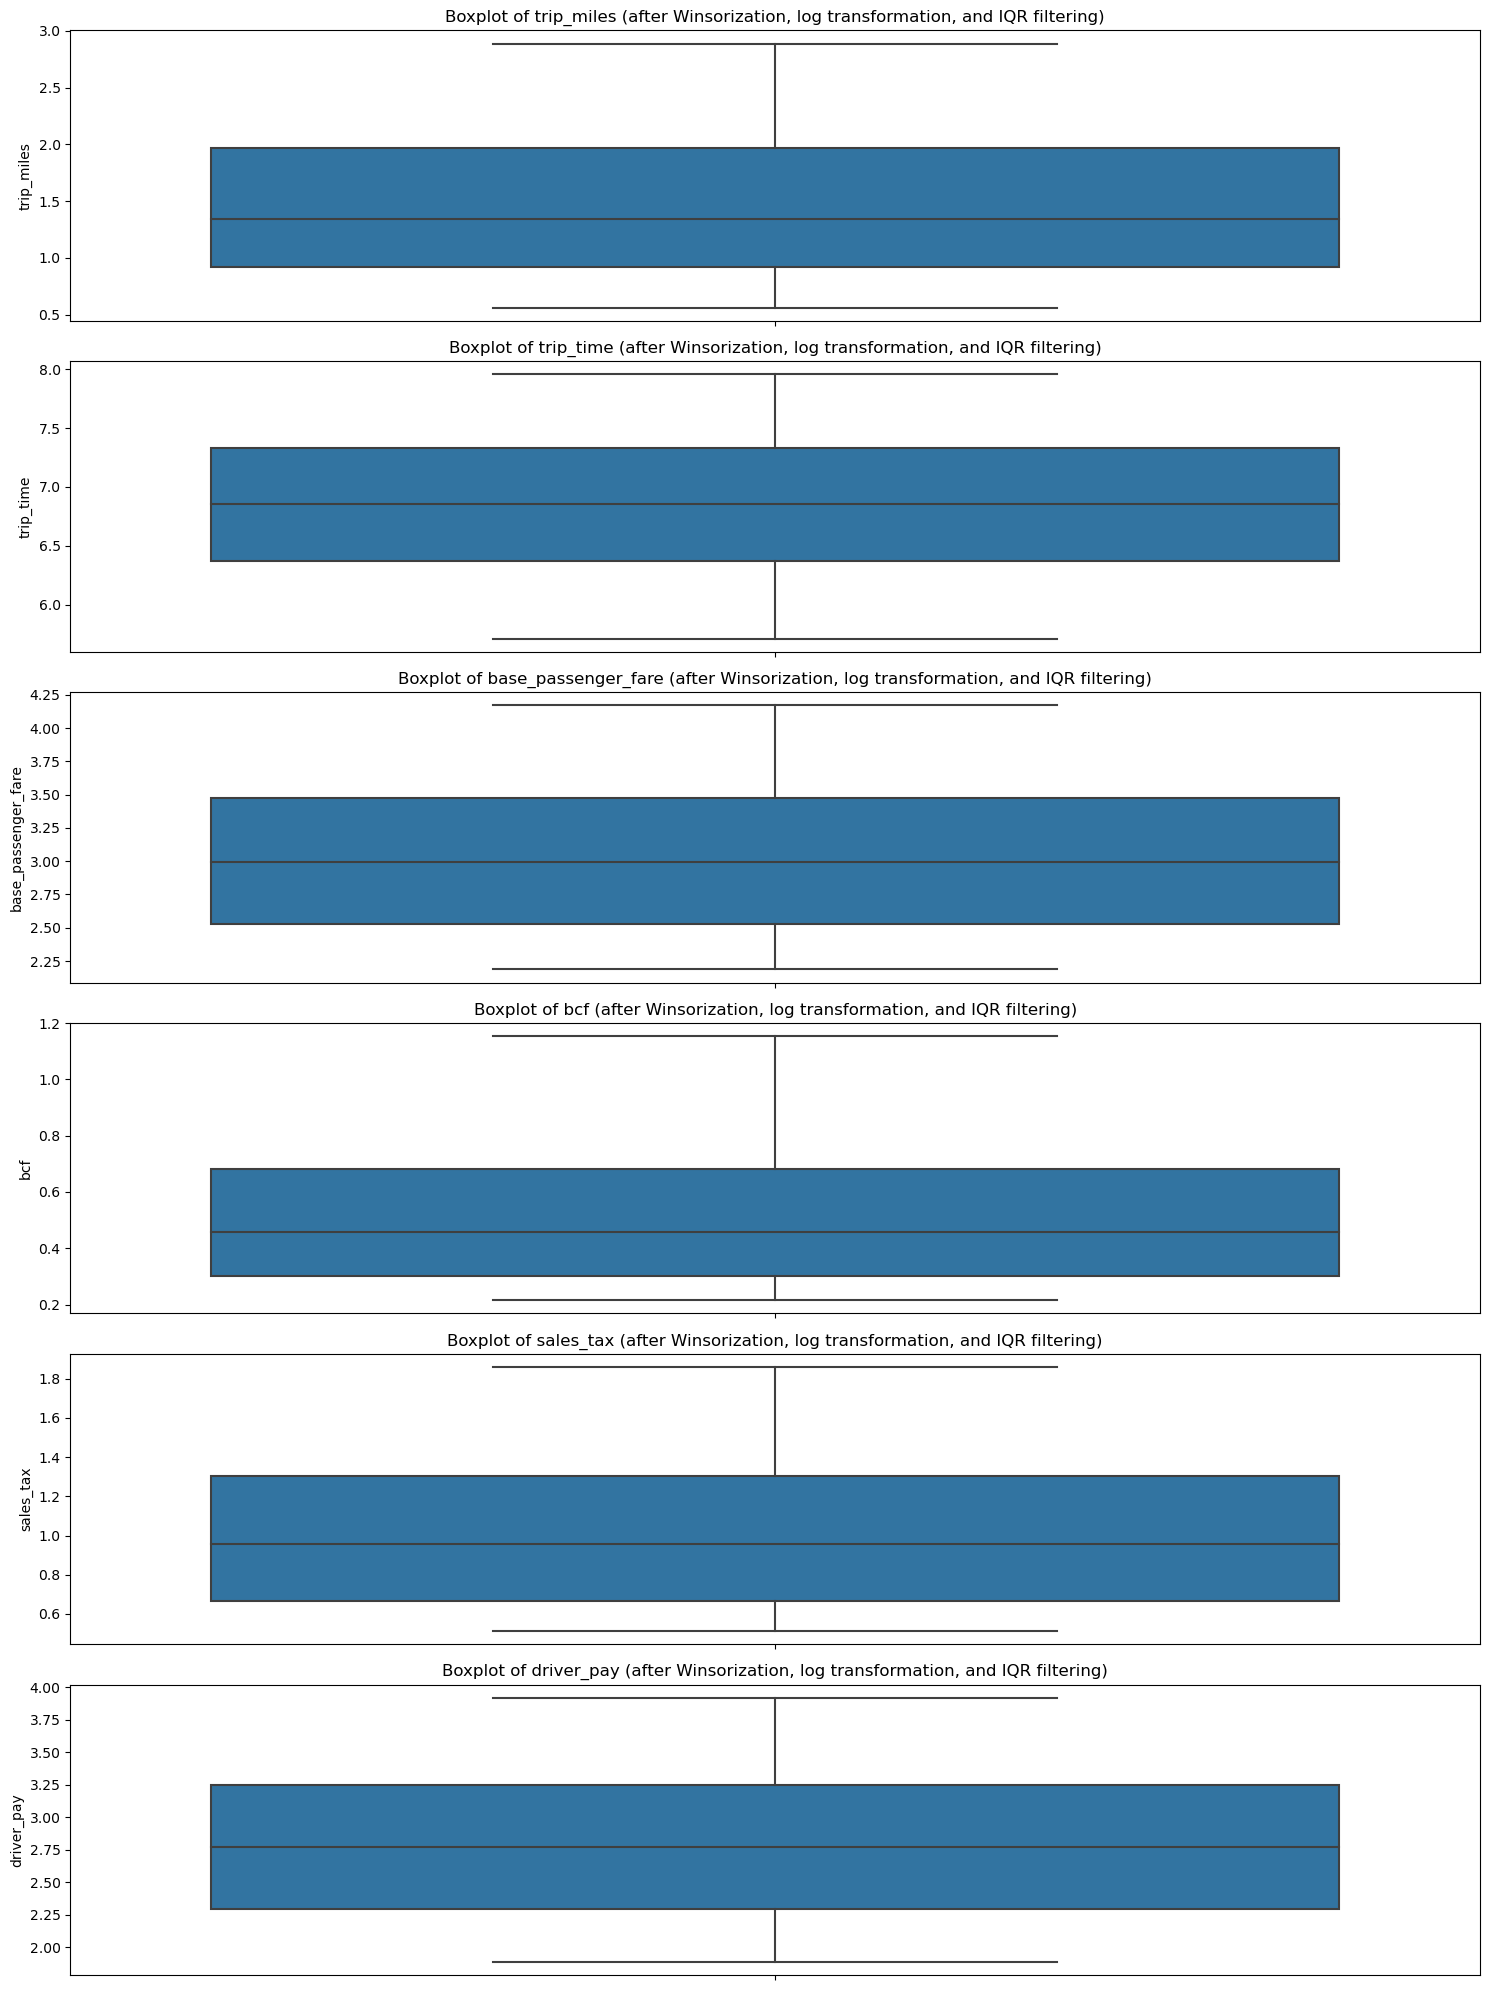

   trip_miles  estimated_emissions  emission_levels
1    0.737164           297.814283                0
2    1.208960           488.419980                0
3    1.004302           405.737850                0
4    1.061257           428.747627                0
6    0.896088           362.019562                0


/tmp/ipykernel_23588/1710364594.py:138: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dec_new.corr()


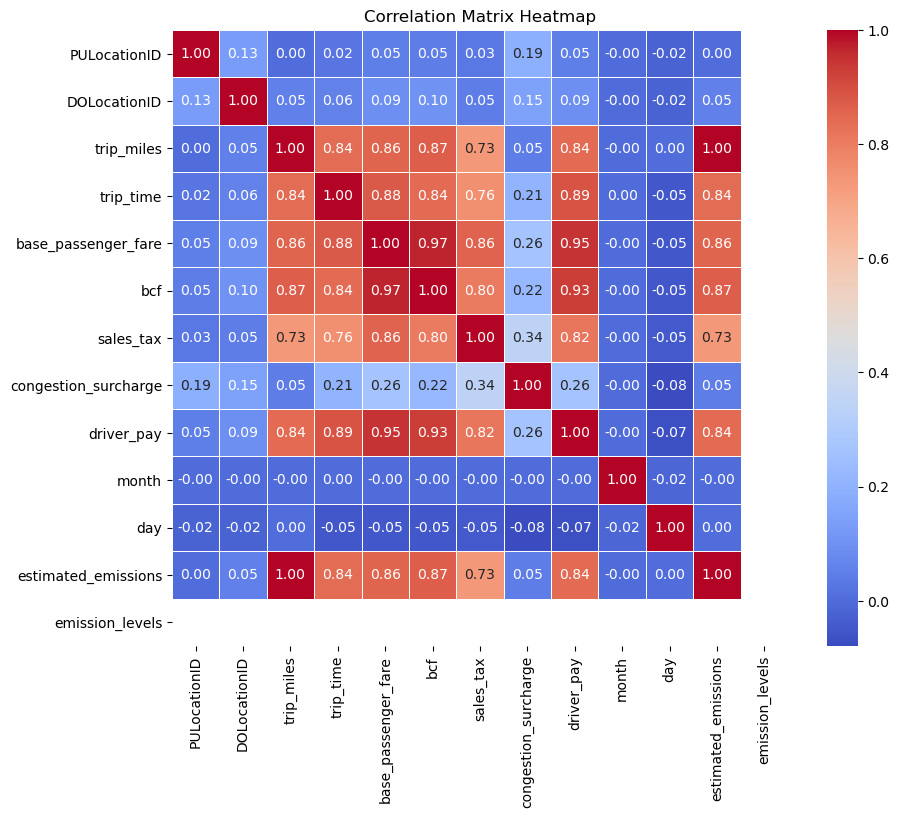

Shape of dec_df: (14007335, 20)
  dispatching_base_num originating_base_num request_datetime  \
1               B03404               B03404         00:20:21   
2               B03404               B03404         00:32:31   
3               B03404               B03404         00:53:57   
4               B03404               B03404         00:20:18   
6               B03404               B03404         00:16:50   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
1          00:21:43        00:22:08         00:30:59           125   
2          00:34:39        00:35:24         00:46:38           148   
3          00:54:23        00:58:45         01:17:43           144   
4          00:21:58        00:22:42         00:33:41           181   
6          00:20:58        00:21:48         00:28:10             7   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
1           148    0.737164   6.276643             2.836737  0.392042   
2           249 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

dec = pd.read_parquet("Users/bchheda/fhvhv_tripdata_2022-12.parquet")
dec.head()
null_counts = dec.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Display unique values in the 'hvfhs_license_num' column
unique_license_nums = dec['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

dec_filtered = dec[~dec['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]
dec_filtered = dec_filtered.drop(columns=['airport_fee'])
dec_filtered = dec_filtered.dropna(subset=['originating_base_num'])
null_counts = dec_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)
dec_filtered.shape
dec_filtered.info()
dec_filtered = dec_filtered.drop(columns=['hvfhs_license_num'])
dec_filtered['date'] = dec_filtered['request_datetime'].dt.date
dec_filtered['date'].tail(15)

# Extract the date part from 'request_datetime' in mm-dd-yyyy format
dec_filtered['date'] = pd.to_datetime(dec_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Remove the date part from the original datetime columns, leaving only the time
dec_filtered['request_datetime'] = pd.to_datetime(dec_filtered['request_datetime']).dt.time
dec_filtered['on_scene_datetime'] = pd.to_datetime(dec_filtered['on_scene_datetime']).dt.time
dec_filtered['pickup_datetime'] = pd.to_datetime(dec_filtered['pickup_datetime']).dt.time
dec_filtered['dropoff_datetime'] = pd.to_datetime(dec_filtered['dropoff_datetime']).dt.time

# Extract month and day from the 'date' column
dec_filtered['month'] = pd.to_datetime(dec_filtered['date']).dt.month
dec_filtered['day'] = pd.to_datetime(dec_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(dec_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(dec_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

# Get unique values in the 'month' column and count them
unique_months = dec_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", dec_filtered['month'].unique())

dec_filtered = dec_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag', 'tips', 'tolls'])
duplicate_count = dec_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
dec_filtered = dec_filtered.drop_duplicates()

# Check for duplicates based on specific columns
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = dec_filtered[dec_filtered.duplicated(subset=duplicate_columns, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

dec_filtered = dec_filtered.drop_duplicates(subset=duplicate_columns)
print("Data after dropping duplicates based on specified columns:")
print(dec_filtered.shape)

# Define a reduced set of columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']
duplicate_rows = dec_filtered[dec_filtered.duplicated(subset=duplicate_column, keep=False)]
duplicate_count = duplicate_rows.shape[0]

print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

dec_filtered = dec_filtered.drop_duplicates(subset=duplicate_column)
print("Data after dropping duplicates based on specified columns:")
print(dec_filtered.shape)

# Plot boxplots for each numeric column
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare', 'bcf', 'sales_tax', 
    'driver_pay'
]

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dec_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Winsorization, log transformation, and IQR filtering
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']
dec_new = dec_filtered.copy()

for column in columns_to_process:
    dec_new[column] = winsorize(dec_new[column], limits=[0.05, 0.05])

for column in columns_to_process:
    dec_new[column] = np.log1p(dec_new[column])

for column in columns_to_process:
    Q1 = dec_new[column].quantile(0.25)
    Q3 = dec_new[column].quantile(0.75)
    IQR = Q3 - Q1
    dec_new = dec_new[(dec_new[column] >= (Q1 - 1.5 * IQR)) & (dec_new[column] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=dec_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

# Calculate CO₂ emissions
emission_factor = 404
dec_new['estimated_emissions'] = dec_new['trip_miles'] * emission_factor
emission_threshold = 3000
dec_new['emission_levels'] = dec_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(dec_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

# Correlation matrix heatmap
correlation_matrix = dec_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Filter to include only the top 10 bases
base_counts = dec_new['dispatching_base_num'].value_counts()
top_10_bases = dec_new['dispatching_base_num'].value_counts().head(10).index
dec_new = dec_new[dec_new['dispatching_base_num'].isin(top_10_bases)]
dec_new.shape
dec_new.head()

# Save dec_new to a new DataFrame called dec_df
dec_df = dec_new.copy()

# Display the shape and first few rows of dec_df to verify
print("Shape of dec_df:", dec_df.shape)
print(dec_df.head())


In [10]:
dec_df.to_parquet("Users/bchheda/dec2022_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 160, 9, Submitted, Running, Running)

In [ ]:
import pandas as pd

# Assuming jab_df, feb_df, ..., dec_df are already defined
merged_2022 = pd.concat([jan_df, feb_df, mar_df, april_df, may_df, june_df, july_df, aug_df, sep_df, oct_df, nov_df, dec_df], ignore_index=True)


StatementMeta(, , , Cancelled, , Cancelled)